In [6]:
# splitting caltech 256 into training and testing data we save filenames in text files
import os
import fnmatch
import shutil
import random
import math

# tarining data 80 % of caltech256
training_ratio=0.8


training_flie=open("training_file.txt",'w')
testing_file=open("testing_file.txt",'w')
classes=open("classes.txt",'w')
folders=os.listdir("./256_ObjectCategories/")
for i in folders:
    path="./256_ObjectCategories/"+i+"/"
    images=[f for f in os.listdir(path) if f.endswith('.jpg')]
    classes.writelines(i[0:3]+" "+i+" "+str(len(images))+'\n')
    index = random.sample(range(0, len(images)), int(math.floor(training_ratio*len(images))))	
    #index = random.sample(range(0, len(file1)), int(math.floor(0.8*len(file1))))

    training=[]
    testing=[]
    for im in range(len(images)):
        if im in index:
            # write in training
            #print("train")
            training_flie.writelines(images[im]+"\n")
        else:
            testing_file.writelines(images[im]+"\n")
            # write in testing
            #print("test")
    print("done with folder"+i)

training_flie.close()
testing_file.close()
classes.close()





done with folder001.ak47
done with folder002.american-flag
done with folder003.backpack
done with folder004.baseball-bat
done with folder005.baseball-glove
done with folder006.basketball-hoop
done with folder007.bat
done with folder008.bathtub
done with folder009.bear
done with folder010.beer-mug
done with folder011.billiards
done with folder012.binoculars
done with folder013.birdbath
done with folder014.blimp
done with folder015.bonsai-101
done with folder016.boom-box
done with folder017.bowling-ball
done with folder018.bowling-pin
done with folder019.boxing-glove
done with folder020.brain-101
done with folder021.breadmaker
done with folder022.buddha-101
done with folder023.bulldozer
done with folder024.butterfly
done with folder025.cactus
done with folder026.cake
done with folder027.calculator
done with folder028.camel
done with folder029.cannon
done with folder030.canoe
done with folder031.car-tire
done with folder032.cartman
done with folder033.cd
done with folder034.centipede
done

In [7]:
#now we are done with the splitting of data now we need to get image list with the path
#in order to extract features

training_img_list=[]
tf = open("training_file.txt",'r')
training_img_list = tf.readlines()
tf.close()
print(len(training_img_list))
print(training_img_list[len(training_img_list)-1])
print(type(training_img_list[75]))


24385
257_0827.jpg

<class 'str'>


In [8]:
# now before giving it to CNN model, we need to find out each files path with the help of classes.txt file..


f=open("classes.txt","r")
lines=f.readlines()
f.close()
Dict={}
for i in lines:
    l1=i.split(' ')
    Dict[l1[0]] = l1[1]
    
print(Dict)


{'001': '001.ak47', '002': '002.american-flag', '003': '003.backpack', '004': '004.baseball-bat', '005': '005.baseball-glove', '006': '006.basketball-hoop', '007': '007.bat', '008': '008.bathtub', '009': '009.bear', '010': '010.beer-mug', '011': '011.billiards', '012': '012.binoculars', '013': '013.birdbath', '014': '014.blimp', '015': '015.bonsai-101', '016': '016.boom-box', '017': '017.bowling-ball', '018': '018.bowling-pin', '019': '019.boxing-glove', '020': '020.brain-101', '021': '021.breadmaker', '022': '022.buddha-101', '023': '023.bulldozer', '024': '024.butterfly', '025': '025.cactus', '026': '026.cake', '027': '027.calculator', '028': '028.camel', '029': '029.cannon', '030': '030.canoe', '031': '031.car-tire', '032': '032.cartman', '033': '033.cd', '034': '034.centipede', '035': '035.cereal-box', '036': '036.chandelier-101', '037': '037.chess-board', '038': '038.chimp', '039': '039.chopsticks', '040': '040.cockroach', '041': '041.coffee-mug', '042': '042.coffin', '043': '043.

In [9]:
# lets import all pkgs for CNN feature extraction

import os
import h5py
import numpy as np
import argparse

from extract_cnn_vgg16_keras import VGGNet
print("import done")

Using TensorFlow backend.


import done


In [10]:
print("./256_ObjectCategories/"+Dict[training_img_list[0][0:3]]+training_img_list[0])

./256_ObjectCategories/001.ak47001_0001.jpg



In [13]:
model=VGGNet()
feats=model.extract_feat("./256_ObjectCategories/"+Dict[training_img_list[0][0:3]]+"/"+training_img_list[0].rstrip('\n'))
print("done")

done


In [17]:
feats = []
names = []
model = VGGNet()
#loop to iterate through entire database
for i, img in enumerate(training_img_list):
    newpath="./256_ObjectCategories/"+Dict[img[0:3]]+"/"+img.rstrip('\n')
    
    norm_feat = model.extract_feat(newpath)
    img_name = img.rstrip('\n')
    #print(newpath+" "+str(i)+"imgnm:"+ img_name +" len: "+str(len(img_name)))
    feats.append(norm_feat)
    names.append(img_name)
    print("extracting feature from image No. %d , %d images in total" %((i+1), len(training_img_list)))

extracting feature from image No. 1 , 24385 images in total
extracting feature from image No. 2 , 24385 images in total
extracting feature from image No. 3 , 24385 images in total
extracting feature from image No. 4 , 24385 images in total
extracting feature from image No. 5 , 24385 images in total
extracting feature from image No. 6 , 24385 images in total
extracting feature from image No. 7 , 24385 images in total
extracting feature from image No. 8 , 24385 images in total
extracting feature from image No. 9 , 24385 images in total
extracting feature from image No. 10 , 24385 images in total
extracting feature from image No. 11 , 24385 images in total
extracting feature from image No. 12 , 24385 images in total
extracting feature from image No. 13 , 24385 images in total
extracting feature from image No. 14 , 24385 images in total
extracting feature from image No. 15 , 24385 images in total
extracting feature from image No. 16 , 24385 images in total
extracting feature from image No.

extracting feature from image No. 135 , 24385 images in total
extracting feature from image No. 136 , 24385 images in total
extracting feature from image No. 137 , 24385 images in total
extracting feature from image No. 138 , 24385 images in total
extracting feature from image No. 139 , 24385 images in total
extracting feature from image No. 140 , 24385 images in total
extracting feature from image No. 141 , 24385 images in total
extracting feature from image No. 142 , 24385 images in total
extracting feature from image No. 143 , 24385 images in total
extracting feature from image No. 144 , 24385 images in total
extracting feature from image No. 145 , 24385 images in total
extracting feature from image No. 146 , 24385 images in total
extracting feature from image No. 147 , 24385 images in total
extracting feature from image No. 148 , 24385 images in total
extracting feature from image No. 149 , 24385 images in total
extracting feature from image No. 150 , 24385 images in total
extracti

extracting feature from image No. 268 , 24385 images in total
extracting feature from image No. 269 , 24385 images in total
extracting feature from image No. 270 , 24385 images in total
extracting feature from image No. 271 , 24385 images in total
extracting feature from image No. 272 , 24385 images in total
extracting feature from image No. 273 , 24385 images in total
extracting feature from image No. 274 , 24385 images in total
extracting feature from image No. 275 , 24385 images in total
extracting feature from image No. 276 , 24385 images in total
extracting feature from image No. 277 , 24385 images in total
extracting feature from image No. 278 , 24385 images in total
extracting feature from image No. 279 , 24385 images in total
extracting feature from image No. 280 , 24385 images in total
extracting feature from image No. 281 , 24385 images in total
extracting feature from image No. 282 , 24385 images in total
extracting feature from image No. 283 , 24385 images in total
extracti

extracting feature from image No. 401 , 24385 images in total
extracting feature from image No. 402 , 24385 images in total
extracting feature from image No. 403 , 24385 images in total
extracting feature from image No. 404 , 24385 images in total
extracting feature from image No. 405 , 24385 images in total
extracting feature from image No. 406 , 24385 images in total
extracting feature from image No. 407 , 24385 images in total
extracting feature from image No. 408 , 24385 images in total
extracting feature from image No. 409 , 24385 images in total
extracting feature from image No. 410 , 24385 images in total
extracting feature from image No. 411 , 24385 images in total
extracting feature from image No. 412 , 24385 images in total
extracting feature from image No. 413 , 24385 images in total
extracting feature from image No. 414 , 24385 images in total
extracting feature from image No. 415 , 24385 images in total
extracting feature from image No. 416 , 24385 images in total
extracti

extracting feature from image No. 534 , 24385 images in total
extracting feature from image No. 535 , 24385 images in total
extracting feature from image No. 536 , 24385 images in total
extracting feature from image No. 537 , 24385 images in total
extracting feature from image No. 538 , 24385 images in total
extracting feature from image No. 539 , 24385 images in total
extracting feature from image No. 540 , 24385 images in total
extracting feature from image No. 541 , 24385 images in total
extracting feature from image No. 542 , 24385 images in total
extracting feature from image No. 543 , 24385 images in total
extracting feature from image No. 544 , 24385 images in total
extracting feature from image No. 545 , 24385 images in total
extracting feature from image No. 546 , 24385 images in total
extracting feature from image No. 547 , 24385 images in total
extracting feature from image No. 548 , 24385 images in total
extracting feature from image No. 549 , 24385 images in total
extracti

extracting feature from image No. 667 , 24385 images in total
extracting feature from image No. 668 , 24385 images in total
extracting feature from image No. 669 , 24385 images in total
extracting feature from image No. 670 , 24385 images in total
extracting feature from image No. 671 , 24385 images in total
extracting feature from image No. 672 , 24385 images in total
extracting feature from image No. 673 , 24385 images in total
extracting feature from image No. 674 , 24385 images in total
extracting feature from image No. 675 , 24385 images in total
extracting feature from image No. 676 , 24385 images in total
extracting feature from image No. 677 , 24385 images in total
extracting feature from image No. 678 , 24385 images in total
extracting feature from image No. 679 , 24385 images in total
extracting feature from image No. 680 , 24385 images in total
extracting feature from image No. 681 , 24385 images in total
extracting feature from image No. 682 , 24385 images in total
extracti

extracting feature from image No. 800 , 24385 images in total
extracting feature from image No. 801 , 24385 images in total
extracting feature from image No. 802 , 24385 images in total
extracting feature from image No. 803 , 24385 images in total
extracting feature from image No. 804 , 24385 images in total
extracting feature from image No. 805 , 24385 images in total
extracting feature from image No. 806 , 24385 images in total
extracting feature from image No. 807 , 24385 images in total
extracting feature from image No. 808 , 24385 images in total
extracting feature from image No. 809 , 24385 images in total
extracting feature from image No. 810 , 24385 images in total
extracting feature from image No. 811 , 24385 images in total
extracting feature from image No. 812 , 24385 images in total
extracting feature from image No. 813 , 24385 images in total
extracting feature from image No. 814 , 24385 images in total
extracting feature from image No. 815 , 24385 images in total
extracti

extracting feature from image No. 933 , 24385 images in total
extracting feature from image No. 934 , 24385 images in total
extracting feature from image No. 935 , 24385 images in total
extracting feature from image No. 936 , 24385 images in total
extracting feature from image No. 937 , 24385 images in total
extracting feature from image No. 938 , 24385 images in total
extracting feature from image No. 939 , 24385 images in total
extracting feature from image No. 940 , 24385 images in total
extracting feature from image No. 941 , 24385 images in total
extracting feature from image No. 942 , 24385 images in total
extracting feature from image No. 943 , 24385 images in total
extracting feature from image No. 944 , 24385 images in total
extracting feature from image No. 945 , 24385 images in total
extracting feature from image No. 946 , 24385 images in total
extracting feature from image No. 947 , 24385 images in total
extracting feature from image No. 948 , 24385 images in total
extracti

extracting feature from image No. 1065 , 24385 images in total
extracting feature from image No. 1066 , 24385 images in total
extracting feature from image No. 1067 , 24385 images in total
extracting feature from image No. 1068 , 24385 images in total
extracting feature from image No. 1069 , 24385 images in total
extracting feature from image No. 1070 , 24385 images in total
extracting feature from image No. 1071 , 24385 images in total
extracting feature from image No. 1072 , 24385 images in total
extracting feature from image No. 1073 , 24385 images in total
extracting feature from image No. 1074 , 24385 images in total
extracting feature from image No. 1075 , 24385 images in total
extracting feature from image No. 1076 , 24385 images in total
extracting feature from image No. 1077 , 24385 images in total
extracting feature from image No. 1078 , 24385 images in total
extracting feature from image No. 1079 , 24385 images in total
extracting feature from image No. 1080 , 24385 images i

extracting feature from image No. 1196 , 24385 images in total
extracting feature from image No. 1197 , 24385 images in total
extracting feature from image No. 1198 , 24385 images in total
extracting feature from image No. 1199 , 24385 images in total
extracting feature from image No. 1200 , 24385 images in total
extracting feature from image No. 1201 , 24385 images in total
extracting feature from image No. 1202 , 24385 images in total
extracting feature from image No. 1203 , 24385 images in total
extracting feature from image No. 1204 , 24385 images in total
extracting feature from image No. 1205 , 24385 images in total
extracting feature from image No. 1206 , 24385 images in total
extracting feature from image No. 1207 , 24385 images in total
extracting feature from image No. 1208 , 24385 images in total
extracting feature from image No. 1209 , 24385 images in total
extracting feature from image No. 1210 , 24385 images in total
extracting feature from image No. 1211 , 24385 images i

extracting feature from image No. 1327 , 24385 images in total
extracting feature from image No. 1328 , 24385 images in total
extracting feature from image No. 1329 , 24385 images in total
extracting feature from image No. 1330 , 24385 images in total
extracting feature from image No. 1331 , 24385 images in total
extracting feature from image No. 1332 , 24385 images in total
extracting feature from image No. 1333 , 24385 images in total
extracting feature from image No. 1334 , 24385 images in total
extracting feature from image No. 1335 , 24385 images in total
extracting feature from image No. 1336 , 24385 images in total
extracting feature from image No. 1337 , 24385 images in total
extracting feature from image No. 1338 , 24385 images in total
extracting feature from image No. 1339 , 24385 images in total
extracting feature from image No. 1340 , 24385 images in total
extracting feature from image No. 1341 , 24385 images in total
extracting feature from image No. 1342 , 24385 images i

extracting feature from image No. 1458 , 24385 images in total
extracting feature from image No. 1459 , 24385 images in total
extracting feature from image No. 1460 , 24385 images in total
extracting feature from image No. 1461 , 24385 images in total
extracting feature from image No. 1462 , 24385 images in total
extracting feature from image No. 1463 , 24385 images in total
extracting feature from image No. 1464 , 24385 images in total
extracting feature from image No. 1465 , 24385 images in total
extracting feature from image No. 1466 , 24385 images in total
extracting feature from image No. 1467 , 24385 images in total
extracting feature from image No. 1468 , 24385 images in total
extracting feature from image No. 1469 , 24385 images in total
extracting feature from image No. 1470 , 24385 images in total
extracting feature from image No. 1471 , 24385 images in total
extracting feature from image No. 1472 , 24385 images in total
extracting feature from image No. 1473 , 24385 images i

extracting feature from image No. 1589 , 24385 images in total
extracting feature from image No. 1590 , 24385 images in total
extracting feature from image No. 1591 , 24385 images in total
extracting feature from image No. 1592 , 24385 images in total
extracting feature from image No. 1593 , 24385 images in total
extracting feature from image No. 1594 , 24385 images in total
extracting feature from image No. 1595 , 24385 images in total
extracting feature from image No. 1596 , 24385 images in total
extracting feature from image No. 1597 , 24385 images in total
extracting feature from image No. 1598 , 24385 images in total
extracting feature from image No. 1599 , 24385 images in total
extracting feature from image No. 1600 , 24385 images in total
extracting feature from image No. 1601 , 24385 images in total
extracting feature from image No. 1602 , 24385 images in total
extracting feature from image No. 1603 , 24385 images in total
extracting feature from image No. 1604 , 24385 images i

extracting feature from image No. 1720 , 24385 images in total
extracting feature from image No. 1721 , 24385 images in total
extracting feature from image No. 1722 , 24385 images in total
extracting feature from image No. 1723 , 24385 images in total
extracting feature from image No. 1724 , 24385 images in total
extracting feature from image No. 1725 , 24385 images in total
extracting feature from image No. 1726 , 24385 images in total
extracting feature from image No. 1727 , 24385 images in total
extracting feature from image No. 1728 , 24385 images in total
extracting feature from image No. 1729 , 24385 images in total
extracting feature from image No. 1730 , 24385 images in total
extracting feature from image No. 1731 , 24385 images in total
extracting feature from image No. 1732 , 24385 images in total
extracting feature from image No. 1733 , 24385 images in total
extracting feature from image No. 1734 , 24385 images in total
extracting feature from image No. 1735 , 24385 images i

extracting feature from image No. 1851 , 24385 images in total
extracting feature from image No. 1852 , 24385 images in total
extracting feature from image No. 1853 , 24385 images in total
extracting feature from image No. 1854 , 24385 images in total
extracting feature from image No. 1855 , 24385 images in total
extracting feature from image No. 1856 , 24385 images in total
extracting feature from image No. 1857 , 24385 images in total
extracting feature from image No. 1858 , 24385 images in total
extracting feature from image No. 1859 , 24385 images in total
extracting feature from image No. 1860 , 24385 images in total
extracting feature from image No. 1861 , 24385 images in total
extracting feature from image No. 1862 , 24385 images in total
extracting feature from image No. 1863 , 24385 images in total
extracting feature from image No. 1864 , 24385 images in total
extracting feature from image No. 1865 , 24385 images in total
extracting feature from image No. 1866 , 24385 images i

extracting feature from image No. 1982 , 24385 images in total
extracting feature from image No. 1983 , 24385 images in total
extracting feature from image No. 1984 , 24385 images in total
extracting feature from image No. 1985 , 24385 images in total
extracting feature from image No. 1986 , 24385 images in total
extracting feature from image No. 1987 , 24385 images in total
extracting feature from image No. 1988 , 24385 images in total
extracting feature from image No. 1989 , 24385 images in total
extracting feature from image No. 1990 , 24385 images in total
extracting feature from image No. 1991 , 24385 images in total
extracting feature from image No. 1992 , 24385 images in total
extracting feature from image No. 1993 , 24385 images in total
extracting feature from image No. 1994 , 24385 images in total
extracting feature from image No. 1995 , 24385 images in total
extracting feature from image No. 1996 , 24385 images in total
extracting feature from image No. 1997 , 24385 images i

extracting feature from image No. 2113 , 24385 images in total
extracting feature from image No. 2114 , 24385 images in total
extracting feature from image No. 2115 , 24385 images in total
extracting feature from image No. 2116 , 24385 images in total
extracting feature from image No. 2117 , 24385 images in total
extracting feature from image No. 2118 , 24385 images in total
extracting feature from image No. 2119 , 24385 images in total
extracting feature from image No. 2120 , 24385 images in total
extracting feature from image No. 2121 , 24385 images in total
extracting feature from image No. 2122 , 24385 images in total
extracting feature from image No. 2123 , 24385 images in total
extracting feature from image No. 2124 , 24385 images in total
extracting feature from image No. 2125 , 24385 images in total
extracting feature from image No. 2126 , 24385 images in total
extracting feature from image No. 2127 , 24385 images in total
extracting feature from image No. 2128 , 24385 images i

extracting feature from image No. 2244 , 24385 images in total
extracting feature from image No. 2245 , 24385 images in total
extracting feature from image No. 2246 , 24385 images in total
extracting feature from image No. 2247 , 24385 images in total
extracting feature from image No. 2248 , 24385 images in total
extracting feature from image No. 2249 , 24385 images in total
extracting feature from image No. 2250 , 24385 images in total
extracting feature from image No. 2251 , 24385 images in total
extracting feature from image No. 2252 , 24385 images in total
extracting feature from image No. 2253 , 24385 images in total
extracting feature from image No. 2254 , 24385 images in total
extracting feature from image No. 2255 , 24385 images in total
extracting feature from image No. 2256 , 24385 images in total
extracting feature from image No. 2257 , 24385 images in total
extracting feature from image No. 2258 , 24385 images in total
extracting feature from image No. 2259 , 24385 images i

extracting feature from image No. 2375 , 24385 images in total
extracting feature from image No. 2376 , 24385 images in total
extracting feature from image No. 2377 , 24385 images in total
extracting feature from image No. 2378 , 24385 images in total
extracting feature from image No. 2379 , 24385 images in total
extracting feature from image No. 2380 , 24385 images in total
extracting feature from image No. 2381 , 24385 images in total
extracting feature from image No. 2382 , 24385 images in total
extracting feature from image No. 2383 , 24385 images in total
extracting feature from image No. 2384 , 24385 images in total
extracting feature from image No. 2385 , 24385 images in total
extracting feature from image No. 2386 , 24385 images in total
extracting feature from image No. 2387 , 24385 images in total
extracting feature from image No. 2388 , 24385 images in total
extracting feature from image No. 2389 , 24385 images in total
extracting feature from image No. 2390 , 24385 images i

extracting feature from image No. 2506 , 24385 images in total
extracting feature from image No. 2507 , 24385 images in total
extracting feature from image No. 2508 , 24385 images in total
extracting feature from image No. 2509 , 24385 images in total
extracting feature from image No. 2510 , 24385 images in total
extracting feature from image No. 2511 , 24385 images in total
extracting feature from image No. 2512 , 24385 images in total
extracting feature from image No. 2513 , 24385 images in total
extracting feature from image No. 2514 , 24385 images in total
extracting feature from image No. 2515 , 24385 images in total
extracting feature from image No. 2516 , 24385 images in total
extracting feature from image No. 2517 , 24385 images in total
extracting feature from image No. 2518 , 24385 images in total
extracting feature from image No. 2519 , 24385 images in total
extracting feature from image No. 2520 , 24385 images in total
extracting feature from image No. 2521 , 24385 images i

extracting feature from image No. 2637 , 24385 images in total
extracting feature from image No. 2638 , 24385 images in total
extracting feature from image No. 2639 , 24385 images in total
extracting feature from image No. 2640 , 24385 images in total
extracting feature from image No. 2641 , 24385 images in total
extracting feature from image No. 2642 , 24385 images in total
extracting feature from image No. 2643 , 24385 images in total
extracting feature from image No. 2644 , 24385 images in total
extracting feature from image No. 2645 , 24385 images in total
extracting feature from image No. 2646 , 24385 images in total
extracting feature from image No. 2647 , 24385 images in total
extracting feature from image No. 2648 , 24385 images in total
extracting feature from image No. 2649 , 24385 images in total
extracting feature from image No. 2650 , 24385 images in total
extracting feature from image No. 2651 , 24385 images in total
extracting feature from image No. 2652 , 24385 images i

extracting feature from image No. 2768 , 24385 images in total
extracting feature from image No. 2769 , 24385 images in total
extracting feature from image No. 2770 , 24385 images in total
extracting feature from image No. 2771 , 24385 images in total
extracting feature from image No. 2772 , 24385 images in total
extracting feature from image No. 2773 , 24385 images in total
extracting feature from image No. 2774 , 24385 images in total
extracting feature from image No. 2775 , 24385 images in total
extracting feature from image No. 2776 , 24385 images in total
extracting feature from image No. 2777 , 24385 images in total
extracting feature from image No. 2778 , 24385 images in total
extracting feature from image No. 2779 , 24385 images in total
extracting feature from image No. 2780 , 24385 images in total
extracting feature from image No. 2781 , 24385 images in total
extracting feature from image No. 2782 , 24385 images in total
extracting feature from image No. 2783 , 24385 images i

extracting feature from image No. 2899 , 24385 images in total
extracting feature from image No. 2900 , 24385 images in total
extracting feature from image No. 2901 , 24385 images in total
extracting feature from image No. 2902 , 24385 images in total
extracting feature from image No. 2903 , 24385 images in total
extracting feature from image No. 2904 , 24385 images in total
extracting feature from image No. 2905 , 24385 images in total
extracting feature from image No. 2906 , 24385 images in total
extracting feature from image No. 2907 , 24385 images in total
extracting feature from image No. 2908 , 24385 images in total
extracting feature from image No. 2909 , 24385 images in total
extracting feature from image No. 2910 , 24385 images in total
extracting feature from image No. 2911 , 24385 images in total
extracting feature from image No. 2912 , 24385 images in total
extracting feature from image No. 2913 , 24385 images in total
extracting feature from image No. 2914 , 24385 images i

extracting feature from image No. 3030 , 24385 images in total
extracting feature from image No. 3031 , 24385 images in total
extracting feature from image No. 3032 , 24385 images in total
extracting feature from image No. 3033 , 24385 images in total
extracting feature from image No. 3034 , 24385 images in total
extracting feature from image No. 3035 , 24385 images in total
extracting feature from image No. 3036 , 24385 images in total
extracting feature from image No. 3037 , 24385 images in total
extracting feature from image No. 3038 , 24385 images in total
extracting feature from image No. 3039 , 24385 images in total
extracting feature from image No. 3040 , 24385 images in total
extracting feature from image No. 3041 , 24385 images in total
extracting feature from image No. 3042 , 24385 images in total
extracting feature from image No. 3043 , 24385 images in total
extracting feature from image No. 3044 , 24385 images in total
extracting feature from image No. 3045 , 24385 images i

extracting feature from image No. 3161 , 24385 images in total
extracting feature from image No. 3162 , 24385 images in total
extracting feature from image No. 3163 , 24385 images in total
extracting feature from image No. 3164 , 24385 images in total
extracting feature from image No. 3165 , 24385 images in total
extracting feature from image No. 3166 , 24385 images in total
extracting feature from image No. 3167 , 24385 images in total
extracting feature from image No. 3168 , 24385 images in total
extracting feature from image No. 3169 , 24385 images in total
extracting feature from image No. 3170 , 24385 images in total
extracting feature from image No. 3171 , 24385 images in total
extracting feature from image No. 3172 , 24385 images in total
extracting feature from image No. 3173 , 24385 images in total
extracting feature from image No. 3174 , 24385 images in total
extracting feature from image No. 3175 , 24385 images in total
extracting feature from image No. 3176 , 24385 images i

extracting feature from image No. 3292 , 24385 images in total
extracting feature from image No. 3293 , 24385 images in total
extracting feature from image No. 3294 , 24385 images in total
extracting feature from image No. 3295 , 24385 images in total
extracting feature from image No. 3296 , 24385 images in total
extracting feature from image No. 3297 , 24385 images in total
extracting feature from image No. 3298 , 24385 images in total
extracting feature from image No. 3299 , 24385 images in total
extracting feature from image No. 3300 , 24385 images in total
extracting feature from image No. 3301 , 24385 images in total
extracting feature from image No. 3302 , 24385 images in total
extracting feature from image No. 3303 , 24385 images in total
extracting feature from image No. 3304 , 24385 images in total
extracting feature from image No. 3305 , 24385 images in total
extracting feature from image No. 3306 , 24385 images in total
extracting feature from image No. 3307 , 24385 images i

extracting feature from image No. 3423 , 24385 images in total
extracting feature from image No. 3424 , 24385 images in total
extracting feature from image No. 3425 , 24385 images in total
extracting feature from image No. 3426 , 24385 images in total
extracting feature from image No. 3427 , 24385 images in total
extracting feature from image No. 3428 , 24385 images in total
extracting feature from image No. 3429 , 24385 images in total
extracting feature from image No. 3430 , 24385 images in total
extracting feature from image No. 3431 , 24385 images in total
extracting feature from image No. 3432 , 24385 images in total
extracting feature from image No. 3433 , 24385 images in total
extracting feature from image No. 3434 , 24385 images in total
extracting feature from image No. 3435 , 24385 images in total
extracting feature from image No. 3436 , 24385 images in total
extracting feature from image No. 3437 , 24385 images in total
extracting feature from image No. 3438 , 24385 images i

extracting feature from image No. 3554 , 24385 images in total
extracting feature from image No. 3555 , 24385 images in total
extracting feature from image No. 3556 , 24385 images in total
extracting feature from image No. 3557 , 24385 images in total
extracting feature from image No. 3558 , 24385 images in total
extracting feature from image No. 3559 , 24385 images in total
extracting feature from image No. 3560 , 24385 images in total
extracting feature from image No. 3561 , 24385 images in total
extracting feature from image No. 3562 , 24385 images in total
extracting feature from image No. 3563 , 24385 images in total
extracting feature from image No. 3564 , 24385 images in total
extracting feature from image No. 3565 , 24385 images in total
extracting feature from image No. 3566 , 24385 images in total
extracting feature from image No. 3567 , 24385 images in total
extracting feature from image No. 3568 , 24385 images in total
extracting feature from image No. 3569 , 24385 images i

extracting feature from image No. 3685 , 24385 images in total
extracting feature from image No. 3686 , 24385 images in total
extracting feature from image No. 3687 , 24385 images in total
extracting feature from image No. 3688 , 24385 images in total
extracting feature from image No. 3689 , 24385 images in total
extracting feature from image No. 3690 , 24385 images in total
extracting feature from image No. 3691 , 24385 images in total
extracting feature from image No. 3692 , 24385 images in total
extracting feature from image No. 3693 , 24385 images in total
extracting feature from image No. 3694 , 24385 images in total
extracting feature from image No. 3695 , 24385 images in total
extracting feature from image No. 3696 , 24385 images in total
extracting feature from image No. 3697 , 24385 images in total
extracting feature from image No. 3698 , 24385 images in total
extracting feature from image No. 3699 , 24385 images in total
extracting feature from image No. 3700 , 24385 images i

extracting feature from image No. 3816 , 24385 images in total
extracting feature from image No. 3817 , 24385 images in total
extracting feature from image No. 3818 , 24385 images in total
extracting feature from image No. 3819 , 24385 images in total
extracting feature from image No. 3820 , 24385 images in total
extracting feature from image No. 3821 , 24385 images in total
extracting feature from image No. 3822 , 24385 images in total
extracting feature from image No. 3823 , 24385 images in total
extracting feature from image No. 3824 , 24385 images in total
extracting feature from image No. 3825 , 24385 images in total
extracting feature from image No. 3826 , 24385 images in total
extracting feature from image No. 3827 , 24385 images in total
extracting feature from image No. 3828 , 24385 images in total
extracting feature from image No. 3829 , 24385 images in total
extracting feature from image No. 3830 , 24385 images in total
extracting feature from image No. 3831 , 24385 images i

extracting feature from image No. 3947 , 24385 images in total
extracting feature from image No. 3948 , 24385 images in total
extracting feature from image No. 3949 , 24385 images in total
extracting feature from image No. 3950 , 24385 images in total
extracting feature from image No. 3951 , 24385 images in total
extracting feature from image No. 3952 , 24385 images in total
extracting feature from image No. 3953 , 24385 images in total
extracting feature from image No. 3954 , 24385 images in total
extracting feature from image No. 3955 , 24385 images in total
extracting feature from image No. 3956 , 24385 images in total
extracting feature from image No. 3957 , 24385 images in total
extracting feature from image No. 3958 , 24385 images in total
extracting feature from image No. 3959 , 24385 images in total
extracting feature from image No. 3960 , 24385 images in total
extracting feature from image No. 3961 , 24385 images in total
extracting feature from image No. 3962 , 24385 images i

extracting feature from image No. 4078 , 24385 images in total
extracting feature from image No. 4079 , 24385 images in total
extracting feature from image No. 4080 , 24385 images in total
extracting feature from image No. 4081 , 24385 images in total
extracting feature from image No. 4082 , 24385 images in total
extracting feature from image No. 4083 , 24385 images in total
extracting feature from image No. 4084 , 24385 images in total
extracting feature from image No. 4085 , 24385 images in total
extracting feature from image No. 4086 , 24385 images in total
extracting feature from image No. 4087 , 24385 images in total
extracting feature from image No. 4088 , 24385 images in total
extracting feature from image No. 4089 , 24385 images in total
extracting feature from image No. 4090 , 24385 images in total
extracting feature from image No. 4091 , 24385 images in total
extracting feature from image No. 4092 , 24385 images in total
extracting feature from image No. 4093 , 24385 images i

extracting feature from image No. 4209 , 24385 images in total
extracting feature from image No. 4210 , 24385 images in total
extracting feature from image No. 4211 , 24385 images in total
extracting feature from image No. 4212 , 24385 images in total
extracting feature from image No. 4213 , 24385 images in total
extracting feature from image No. 4214 , 24385 images in total
extracting feature from image No. 4215 , 24385 images in total
extracting feature from image No. 4216 , 24385 images in total
extracting feature from image No. 4217 , 24385 images in total
extracting feature from image No. 4218 , 24385 images in total
extracting feature from image No. 4219 , 24385 images in total
extracting feature from image No. 4220 , 24385 images in total
extracting feature from image No. 4221 , 24385 images in total
extracting feature from image No. 4222 , 24385 images in total
extracting feature from image No. 4223 , 24385 images in total
extracting feature from image No. 4224 , 24385 images i

extracting feature from image No. 4340 , 24385 images in total
extracting feature from image No. 4341 , 24385 images in total
extracting feature from image No. 4342 , 24385 images in total
extracting feature from image No. 4343 , 24385 images in total
extracting feature from image No. 4344 , 24385 images in total
extracting feature from image No. 4345 , 24385 images in total
extracting feature from image No. 4346 , 24385 images in total
extracting feature from image No. 4347 , 24385 images in total
extracting feature from image No. 4348 , 24385 images in total
extracting feature from image No. 4349 , 24385 images in total
extracting feature from image No. 4350 , 24385 images in total
extracting feature from image No. 4351 , 24385 images in total
extracting feature from image No. 4352 , 24385 images in total
extracting feature from image No. 4353 , 24385 images in total
extracting feature from image No. 4354 , 24385 images in total
extracting feature from image No. 4355 , 24385 images i

extracting feature from image No. 4471 , 24385 images in total
extracting feature from image No. 4472 , 24385 images in total
extracting feature from image No. 4473 , 24385 images in total
extracting feature from image No. 4474 , 24385 images in total
extracting feature from image No. 4475 , 24385 images in total
extracting feature from image No. 4476 , 24385 images in total
extracting feature from image No. 4477 , 24385 images in total
extracting feature from image No. 4478 , 24385 images in total
extracting feature from image No. 4479 , 24385 images in total
extracting feature from image No. 4480 , 24385 images in total
extracting feature from image No. 4481 , 24385 images in total
extracting feature from image No. 4482 , 24385 images in total
extracting feature from image No. 4483 , 24385 images in total
extracting feature from image No. 4484 , 24385 images in total
extracting feature from image No. 4485 , 24385 images in total
extracting feature from image No. 4486 , 24385 images i

extracting feature from image No. 4602 , 24385 images in total
extracting feature from image No. 4603 , 24385 images in total
extracting feature from image No. 4604 , 24385 images in total
extracting feature from image No. 4605 , 24385 images in total
extracting feature from image No. 4606 , 24385 images in total
extracting feature from image No. 4607 , 24385 images in total
extracting feature from image No. 4608 , 24385 images in total
extracting feature from image No. 4609 , 24385 images in total
extracting feature from image No. 4610 , 24385 images in total
extracting feature from image No. 4611 , 24385 images in total
extracting feature from image No. 4612 , 24385 images in total
extracting feature from image No. 4613 , 24385 images in total
extracting feature from image No. 4614 , 24385 images in total
extracting feature from image No. 4615 , 24385 images in total
extracting feature from image No. 4616 , 24385 images in total
extracting feature from image No. 4617 , 24385 images i

extracting feature from image No. 4733 , 24385 images in total
extracting feature from image No. 4734 , 24385 images in total
extracting feature from image No. 4735 , 24385 images in total
extracting feature from image No. 4736 , 24385 images in total
extracting feature from image No. 4737 , 24385 images in total
extracting feature from image No. 4738 , 24385 images in total
extracting feature from image No. 4739 , 24385 images in total
extracting feature from image No. 4740 , 24385 images in total
extracting feature from image No. 4741 , 24385 images in total
extracting feature from image No. 4742 , 24385 images in total
extracting feature from image No. 4743 , 24385 images in total
extracting feature from image No. 4744 , 24385 images in total
extracting feature from image No. 4745 , 24385 images in total
extracting feature from image No. 4746 , 24385 images in total
extracting feature from image No. 4747 , 24385 images in total
extracting feature from image No. 4748 , 24385 images i

extracting feature from image No. 4864 , 24385 images in total
extracting feature from image No. 4865 , 24385 images in total
extracting feature from image No. 4866 , 24385 images in total
extracting feature from image No. 4867 , 24385 images in total
extracting feature from image No. 4868 , 24385 images in total
extracting feature from image No. 4869 , 24385 images in total
extracting feature from image No. 4870 , 24385 images in total
extracting feature from image No. 4871 , 24385 images in total
extracting feature from image No. 4872 , 24385 images in total
extracting feature from image No. 4873 , 24385 images in total
extracting feature from image No. 4874 , 24385 images in total
extracting feature from image No. 4875 , 24385 images in total
extracting feature from image No. 4876 , 24385 images in total
extracting feature from image No. 4877 , 24385 images in total
extracting feature from image No. 4878 , 24385 images in total
extracting feature from image No. 4879 , 24385 images i

extracting feature from image No. 4995 , 24385 images in total
extracting feature from image No. 4996 , 24385 images in total
extracting feature from image No. 4997 , 24385 images in total
extracting feature from image No. 4998 , 24385 images in total
extracting feature from image No. 4999 , 24385 images in total
extracting feature from image No. 5000 , 24385 images in total
extracting feature from image No. 5001 , 24385 images in total
extracting feature from image No. 5002 , 24385 images in total
extracting feature from image No. 5003 , 24385 images in total
extracting feature from image No. 5004 , 24385 images in total
extracting feature from image No. 5005 , 24385 images in total
extracting feature from image No. 5006 , 24385 images in total
extracting feature from image No. 5007 , 24385 images in total
extracting feature from image No. 5008 , 24385 images in total
extracting feature from image No. 5009 , 24385 images in total
extracting feature from image No. 5010 , 24385 images i

extracting feature from image No. 5126 , 24385 images in total
extracting feature from image No. 5127 , 24385 images in total
extracting feature from image No. 5128 , 24385 images in total
extracting feature from image No. 5129 , 24385 images in total
extracting feature from image No. 5130 , 24385 images in total
extracting feature from image No. 5131 , 24385 images in total
extracting feature from image No. 5132 , 24385 images in total
extracting feature from image No. 5133 , 24385 images in total
extracting feature from image No. 5134 , 24385 images in total
extracting feature from image No. 5135 , 24385 images in total
extracting feature from image No. 5136 , 24385 images in total
extracting feature from image No. 5137 , 24385 images in total
extracting feature from image No. 5138 , 24385 images in total
extracting feature from image No. 5139 , 24385 images in total
extracting feature from image No. 5140 , 24385 images in total
extracting feature from image No. 5141 , 24385 images i

extracting feature from image No. 5257 , 24385 images in total
extracting feature from image No. 5258 , 24385 images in total
extracting feature from image No. 5259 , 24385 images in total
extracting feature from image No. 5260 , 24385 images in total
extracting feature from image No. 5261 , 24385 images in total
extracting feature from image No. 5262 , 24385 images in total
extracting feature from image No. 5263 , 24385 images in total
extracting feature from image No. 5264 , 24385 images in total
extracting feature from image No. 5265 , 24385 images in total
extracting feature from image No. 5266 , 24385 images in total
extracting feature from image No. 5267 , 24385 images in total
extracting feature from image No. 5268 , 24385 images in total
extracting feature from image No. 5269 , 24385 images in total
extracting feature from image No. 5270 , 24385 images in total
extracting feature from image No. 5271 , 24385 images in total
extracting feature from image No. 5272 , 24385 images i

extracting feature from image No. 5388 , 24385 images in total
extracting feature from image No. 5389 , 24385 images in total
extracting feature from image No. 5390 , 24385 images in total
extracting feature from image No. 5391 , 24385 images in total
extracting feature from image No. 5392 , 24385 images in total
extracting feature from image No. 5393 , 24385 images in total
extracting feature from image No. 5394 , 24385 images in total
extracting feature from image No. 5395 , 24385 images in total
extracting feature from image No. 5396 , 24385 images in total
extracting feature from image No. 5397 , 24385 images in total
extracting feature from image No. 5398 , 24385 images in total
extracting feature from image No. 5399 , 24385 images in total
extracting feature from image No. 5400 , 24385 images in total
extracting feature from image No. 5401 , 24385 images in total
extracting feature from image No. 5402 , 24385 images in total
extracting feature from image No. 5403 , 24385 images i

extracting feature from image No. 5519 , 24385 images in total
extracting feature from image No. 5520 , 24385 images in total
extracting feature from image No. 5521 , 24385 images in total
extracting feature from image No. 5522 , 24385 images in total
extracting feature from image No. 5523 , 24385 images in total
extracting feature from image No. 5524 , 24385 images in total
extracting feature from image No. 5525 , 24385 images in total
extracting feature from image No. 5526 , 24385 images in total
extracting feature from image No. 5527 , 24385 images in total
extracting feature from image No. 5528 , 24385 images in total
extracting feature from image No. 5529 , 24385 images in total
extracting feature from image No. 5530 , 24385 images in total
extracting feature from image No. 5531 , 24385 images in total
extracting feature from image No. 5532 , 24385 images in total
extracting feature from image No. 5533 , 24385 images in total
extracting feature from image No. 5534 , 24385 images i

extracting feature from image No. 5650 , 24385 images in total
extracting feature from image No. 5651 , 24385 images in total
extracting feature from image No. 5652 , 24385 images in total
extracting feature from image No. 5653 , 24385 images in total
extracting feature from image No. 5654 , 24385 images in total
extracting feature from image No. 5655 , 24385 images in total
extracting feature from image No. 5656 , 24385 images in total
extracting feature from image No. 5657 , 24385 images in total
extracting feature from image No. 5658 , 24385 images in total
extracting feature from image No. 5659 , 24385 images in total
extracting feature from image No. 5660 , 24385 images in total
extracting feature from image No. 5661 , 24385 images in total
extracting feature from image No. 5662 , 24385 images in total
extracting feature from image No. 5663 , 24385 images in total
extracting feature from image No. 5664 , 24385 images in total
extracting feature from image No. 5665 , 24385 images i

extracting feature from image No. 5781 , 24385 images in total
extracting feature from image No. 5782 , 24385 images in total
extracting feature from image No. 5783 , 24385 images in total
extracting feature from image No. 5784 , 24385 images in total
extracting feature from image No. 5785 , 24385 images in total
extracting feature from image No. 5786 , 24385 images in total
extracting feature from image No. 5787 , 24385 images in total
extracting feature from image No. 5788 , 24385 images in total
extracting feature from image No. 5789 , 24385 images in total
extracting feature from image No. 5790 , 24385 images in total
extracting feature from image No. 5791 , 24385 images in total
extracting feature from image No. 5792 , 24385 images in total
extracting feature from image No. 5793 , 24385 images in total
extracting feature from image No. 5794 , 24385 images in total
extracting feature from image No. 5795 , 24385 images in total
extracting feature from image No. 5796 , 24385 images i

extracting feature from image No. 5912 , 24385 images in total
extracting feature from image No. 5913 , 24385 images in total
extracting feature from image No. 5914 , 24385 images in total
extracting feature from image No. 5915 , 24385 images in total
extracting feature from image No. 5916 , 24385 images in total
extracting feature from image No. 5917 , 24385 images in total
extracting feature from image No. 5918 , 24385 images in total
extracting feature from image No. 5919 , 24385 images in total
extracting feature from image No. 5920 , 24385 images in total
extracting feature from image No. 5921 , 24385 images in total
extracting feature from image No. 5922 , 24385 images in total
extracting feature from image No. 5923 , 24385 images in total
extracting feature from image No. 5924 , 24385 images in total
extracting feature from image No. 5925 , 24385 images in total
extracting feature from image No. 5926 , 24385 images in total
extracting feature from image No. 5927 , 24385 images i

extracting feature from image No. 6043 , 24385 images in total
extracting feature from image No. 6044 , 24385 images in total
extracting feature from image No. 6045 , 24385 images in total
extracting feature from image No. 6046 , 24385 images in total
extracting feature from image No. 6047 , 24385 images in total
extracting feature from image No. 6048 , 24385 images in total
extracting feature from image No. 6049 , 24385 images in total
extracting feature from image No. 6050 , 24385 images in total
extracting feature from image No. 6051 , 24385 images in total
extracting feature from image No. 6052 , 24385 images in total
extracting feature from image No. 6053 , 24385 images in total
extracting feature from image No. 6054 , 24385 images in total
extracting feature from image No. 6055 , 24385 images in total
extracting feature from image No. 6056 , 24385 images in total
extracting feature from image No. 6057 , 24385 images in total
extracting feature from image No. 6058 , 24385 images i

extracting feature from image No. 6174 , 24385 images in total
extracting feature from image No. 6175 , 24385 images in total
extracting feature from image No. 6176 , 24385 images in total
extracting feature from image No. 6177 , 24385 images in total
extracting feature from image No. 6178 , 24385 images in total
extracting feature from image No. 6179 , 24385 images in total
extracting feature from image No. 6180 , 24385 images in total
extracting feature from image No. 6181 , 24385 images in total
extracting feature from image No. 6182 , 24385 images in total
extracting feature from image No. 6183 , 24385 images in total
extracting feature from image No. 6184 , 24385 images in total
extracting feature from image No. 6185 , 24385 images in total
extracting feature from image No. 6186 , 24385 images in total
extracting feature from image No. 6187 , 24385 images in total
extracting feature from image No. 6188 , 24385 images in total
extracting feature from image No. 6189 , 24385 images i

extracting feature from image No. 6305 , 24385 images in total
extracting feature from image No. 6306 , 24385 images in total
extracting feature from image No. 6307 , 24385 images in total
extracting feature from image No. 6308 , 24385 images in total
extracting feature from image No. 6309 , 24385 images in total
extracting feature from image No. 6310 , 24385 images in total
extracting feature from image No. 6311 , 24385 images in total
extracting feature from image No. 6312 , 24385 images in total
extracting feature from image No. 6313 , 24385 images in total
extracting feature from image No. 6314 , 24385 images in total
extracting feature from image No. 6315 , 24385 images in total
extracting feature from image No. 6316 , 24385 images in total
extracting feature from image No. 6317 , 24385 images in total
extracting feature from image No. 6318 , 24385 images in total
extracting feature from image No. 6319 , 24385 images in total
extracting feature from image No. 6320 , 24385 images i

extracting feature from image No. 6436 , 24385 images in total
extracting feature from image No. 6437 , 24385 images in total
extracting feature from image No. 6438 , 24385 images in total
extracting feature from image No. 6439 , 24385 images in total
extracting feature from image No. 6440 , 24385 images in total
extracting feature from image No. 6441 , 24385 images in total
extracting feature from image No. 6442 , 24385 images in total
extracting feature from image No. 6443 , 24385 images in total
extracting feature from image No. 6444 , 24385 images in total
extracting feature from image No. 6445 , 24385 images in total
extracting feature from image No. 6446 , 24385 images in total
extracting feature from image No. 6447 , 24385 images in total
extracting feature from image No. 6448 , 24385 images in total
extracting feature from image No. 6449 , 24385 images in total
extracting feature from image No. 6450 , 24385 images in total
extracting feature from image No. 6451 , 24385 images i

extracting feature from image No. 6567 , 24385 images in total
extracting feature from image No. 6568 , 24385 images in total
extracting feature from image No. 6569 , 24385 images in total
extracting feature from image No. 6570 , 24385 images in total
extracting feature from image No. 6571 , 24385 images in total
extracting feature from image No. 6572 , 24385 images in total
extracting feature from image No. 6573 , 24385 images in total
extracting feature from image No. 6574 , 24385 images in total
extracting feature from image No. 6575 , 24385 images in total
extracting feature from image No. 6576 , 24385 images in total
extracting feature from image No. 6577 , 24385 images in total
extracting feature from image No. 6578 , 24385 images in total
extracting feature from image No. 6579 , 24385 images in total
extracting feature from image No. 6580 , 24385 images in total
extracting feature from image No. 6581 , 24385 images in total
extracting feature from image No. 6582 , 24385 images i

extracting feature from image No. 6698 , 24385 images in total
extracting feature from image No. 6699 , 24385 images in total
extracting feature from image No. 6700 , 24385 images in total
extracting feature from image No. 6701 , 24385 images in total
extracting feature from image No. 6702 , 24385 images in total
extracting feature from image No. 6703 , 24385 images in total
extracting feature from image No. 6704 , 24385 images in total
extracting feature from image No. 6705 , 24385 images in total
extracting feature from image No. 6706 , 24385 images in total
extracting feature from image No. 6707 , 24385 images in total
extracting feature from image No. 6708 , 24385 images in total
extracting feature from image No. 6709 , 24385 images in total
extracting feature from image No. 6710 , 24385 images in total
extracting feature from image No. 6711 , 24385 images in total
extracting feature from image No. 6712 , 24385 images in total
extracting feature from image No. 6713 , 24385 images i

extracting feature from image No. 6829 , 24385 images in total
extracting feature from image No. 6830 , 24385 images in total
extracting feature from image No. 6831 , 24385 images in total
extracting feature from image No. 6832 , 24385 images in total
extracting feature from image No. 6833 , 24385 images in total
extracting feature from image No. 6834 , 24385 images in total
extracting feature from image No. 6835 , 24385 images in total
extracting feature from image No. 6836 , 24385 images in total
extracting feature from image No. 6837 , 24385 images in total
extracting feature from image No. 6838 , 24385 images in total
extracting feature from image No. 6839 , 24385 images in total
extracting feature from image No. 6840 , 24385 images in total
extracting feature from image No. 6841 , 24385 images in total
extracting feature from image No. 6842 , 24385 images in total
extracting feature from image No. 6843 , 24385 images in total
extracting feature from image No. 6844 , 24385 images i

extracting feature from image No. 6960 , 24385 images in total
extracting feature from image No. 6961 , 24385 images in total
extracting feature from image No. 6962 , 24385 images in total
extracting feature from image No. 6963 , 24385 images in total
extracting feature from image No. 6964 , 24385 images in total
extracting feature from image No. 6965 , 24385 images in total
extracting feature from image No. 6966 , 24385 images in total
extracting feature from image No. 6967 , 24385 images in total
extracting feature from image No. 6968 , 24385 images in total
extracting feature from image No. 6969 , 24385 images in total
extracting feature from image No. 6970 , 24385 images in total
extracting feature from image No. 6971 , 24385 images in total
extracting feature from image No. 6972 , 24385 images in total
extracting feature from image No. 6973 , 24385 images in total
extracting feature from image No. 6974 , 24385 images in total
extracting feature from image No. 6975 , 24385 images i

extracting feature from image No. 7091 , 24385 images in total
extracting feature from image No. 7092 , 24385 images in total
extracting feature from image No. 7093 , 24385 images in total
extracting feature from image No. 7094 , 24385 images in total
extracting feature from image No. 7095 , 24385 images in total
extracting feature from image No. 7096 , 24385 images in total
extracting feature from image No. 7097 , 24385 images in total
extracting feature from image No. 7098 , 24385 images in total
extracting feature from image No. 7099 , 24385 images in total
extracting feature from image No. 7100 , 24385 images in total
extracting feature from image No. 7101 , 24385 images in total
extracting feature from image No. 7102 , 24385 images in total
extracting feature from image No. 7103 , 24385 images in total
extracting feature from image No. 7104 , 24385 images in total
extracting feature from image No. 7105 , 24385 images in total
extracting feature from image No. 7106 , 24385 images i

extracting feature from image No. 7222 , 24385 images in total
extracting feature from image No. 7223 , 24385 images in total
extracting feature from image No. 7224 , 24385 images in total
extracting feature from image No. 7225 , 24385 images in total
extracting feature from image No. 7226 , 24385 images in total
extracting feature from image No. 7227 , 24385 images in total
extracting feature from image No. 7228 , 24385 images in total
extracting feature from image No. 7229 , 24385 images in total
extracting feature from image No. 7230 , 24385 images in total
extracting feature from image No. 7231 , 24385 images in total
extracting feature from image No. 7232 , 24385 images in total
extracting feature from image No. 7233 , 24385 images in total
extracting feature from image No. 7234 , 24385 images in total
extracting feature from image No. 7235 , 24385 images in total
extracting feature from image No. 7236 , 24385 images in total
extracting feature from image No. 7237 , 24385 images i

extracting feature from image No. 7353 , 24385 images in total
extracting feature from image No. 7354 , 24385 images in total
extracting feature from image No. 7355 , 24385 images in total
extracting feature from image No. 7356 , 24385 images in total
extracting feature from image No. 7357 , 24385 images in total
extracting feature from image No. 7358 , 24385 images in total
extracting feature from image No. 7359 , 24385 images in total
extracting feature from image No. 7360 , 24385 images in total
extracting feature from image No. 7361 , 24385 images in total
extracting feature from image No. 7362 , 24385 images in total
extracting feature from image No. 7363 , 24385 images in total
extracting feature from image No. 7364 , 24385 images in total
extracting feature from image No. 7365 , 24385 images in total
extracting feature from image No. 7366 , 24385 images in total
extracting feature from image No. 7367 , 24385 images in total
extracting feature from image No. 7368 , 24385 images i

extracting feature from image No. 7484 , 24385 images in total
extracting feature from image No. 7485 , 24385 images in total
extracting feature from image No. 7486 , 24385 images in total
extracting feature from image No. 7487 , 24385 images in total
extracting feature from image No. 7488 , 24385 images in total
extracting feature from image No. 7489 , 24385 images in total
extracting feature from image No. 7490 , 24385 images in total
extracting feature from image No. 7491 , 24385 images in total
extracting feature from image No. 7492 , 24385 images in total
extracting feature from image No. 7493 , 24385 images in total
extracting feature from image No. 7494 , 24385 images in total
extracting feature from image No. 7495 , 24385 images in total
extracting feature from image No. 7496 , 24385 images in total
extracting feature from image No. 7497 , 24385 images in total
extracting feature from image No. 7498 , 24385 images in total
extracting feature from image No. 7499 , 24385 images i

extracting feature from image No. 7615 , 24385 images in total
extracting feature from image No. 7616 , 24385 images in total
extracting feature from image No. 7617 , 24385 images in total
extracting feature from image No. 7618 , 24385 images in total
extracting feature from image No. 7619 , 24385 images in total
extracting feature from image No. 7620 , 24385 images in total
extracting feature from image No. 7621 , 24385 images in total
extracting feature from image No. 7622 , 24385 images in total
extracting feature from image No. 7623 , 24385 images in total
extracting feature from image No. 7624 , 24385 images in total
extracting feature from image No. 7625 , 24385 images in total
extracting feature from image No. 7626 , 24385 images in total
extracting feature from image No. 7627 , 24385 images in total
extracting feature from image No. 7628 , 24385 images in total
extracting feature from image No. 7629 , 24385 images in total
extracting feature from image No. 7630 , 24385 images i

extracting feature from image No. 7746 , 24385 images in total
extracting feature from image No. 7747 , 24385 images in total
extracting feature from image No. 7748 , 24385 images in total
extracting feature from image No. 7749 , 24385 images in total
extracting feature from image No. 7750 , 24385 images in total
extracting feature from image No. 7751 , 24385 images in total
extracting feature from image No. 7752 , 24385 images in total
extracting feature from image No. 7753 , 24385 images in total
extracting feature from image No. 7754 , 24385 images in total
extracting feature from image No. 7755 , 24385 images in total
extracting feature from image No. 7756 , 24385 images in total
extracting feature from image No. 7757 , 24385 images in total
extracting feature from image No. 7758 , 24385 images in total
extracting feature from image No. 7759 , 24385 images in total
extracting feature from image No. 7760 , 24385 images in total
extracting feature from image No. 7761 , 24385 images i

extracting feature from image No. 7877 , 24385 images in total
extracting feature from image No. 7878 , 24385 images in total
extracting feature from image No. 7879 , 24385 images in total
extracting feature from image No. 7880 , 24385 images in total
extracting feature from image No. 7881 , 24385 images in total
extracting feature from image No. 7882 , 24385 images in total
extracting feature from image No. 7883 , 24385 images in total
extracting feature from image No. 7884 , 24385 images in total
extracting feature from image No. 7885 , 24385 images in total
extracting feature from image No. 7886 , 24385 images in total
extracting feature from image No. 7887 , 24385 images in total
extracting feature from image No. 7888 , 24385 images in total
extracting feature from image No. 7889 , 24385 images in total
extracting feature from image No. 7890 , 24385 images in total
extracting feature from image No. 7891 , 24385 images in total
extracting feature from image No. 7892 , 24385 images i

extracting feature from image No. 8008 , 24385 images in total
extracting feature from image No. 8009 , 24385 images in total
extracting feature from image No. 8010 , 24385 images in total
extracting feature from image No. 8011 , 24385 images in total
extracting feature from image No. 8012 , 24385 images in total
extracting feature from image No. 8013 , 24385 images in total
extracting feature from image No. 8014 , 24385 images in total
extracting feature from image No. 8015 , 24385 images in total
extracting feature from image No. 8016 , 24385 images in total
extracting feature from image No. 8017 , 24385 images in total
extracting feature from image No. 8018 , 24385 images in total
extracting feature from image No. 8019 , 24385 images in total
extracting feature from image No. 8020 , 24385 images in total
extracting feature from image No. 8021 , 24385 images in total
extracting feature from image No. 8022 , 24385 images in total
extracting feature from image No. 8023 , 24385 images i

extracting feature from image No. 8139 , 24385 images in total
extracting feature from image No. 8140 , 24385 images in total
extracting feature from image No. 8141 , 24385 images in total
extracting feature from image No. 8142 , 24385 images in total
extracting feature from image No. 8143 , 24385 images in total
extracting feature from image No. 8144 , 24385 images in total
extracting feature from image No. 8145 , 24385 images in total
extracting feature from image No. 8146 , 24385 images in total
extracting feature from image No. 8147 , 24385 images in total
extracting feature from image No. 8148 , 24385 images in total
extracting feature from image No. 8149 , 24385 images in total
extracting feature from image No. 8150 , 24385 images in total
extracting feature from image No. 8151 , 24385 images in total
extracting feature from image No. 8152 , 24385 images in total
extracting feature from image No. 8153 , 24385 images in total
extracting feature from image No. 8154 , 24385 images i

extracting feature from image No. 8270 , 24385 images in total
extracting feature from image No. 8271 , 24385 images in total
extracting feature from image No. 8272 , 24385 images in total
extracting feature from image No. 8273 , 24385 images in total
extracting feature from image No. 8274 , 24385 images in total
extracting feature from image No. 8275 , 24385 images in total
extracting feature from image No. 8276 , 24385 images in total
extracting feature from image No. 8277 , 24385 images in total
extracting feature from image No. 8278 , 24385 images in total
extracting feature from image No. 8279 , 24385 images in total
extracting feature from image No. 8280 , 24385 images in total
extracting feature from image No. 8281 , 24385 images in total
extracting feature from image No. 8282 , 24385 images in total
extracting feature from image No. 8283 , 24385 images in total
extracting feature from image No. 8284 , 24385 images in total
extracting feature from image No. 8285 , 24385 images i

extracting feature from image No. 8401 , 24385 images in total
extracting feature from image No. 8402 , 24385 images in total
extracting feature from image No. 8403 , 24385 images in total
extracting feature from image No. 8404 , 24385 images in total
extracting feature from image No. 8405 , 24385 images in total
extracting feature from image No. 8406 , 24385 images in total
extracting feature from image No. 8407 , 24385 images in total
extracting feature from image No. 8408 , 24385 images in total
extracting feature from image No. 8409 , 24385 images in total
extracting feature from image No. 8410 , 24385 images in total
extracting feature from image No. 8411 , 24385 images in total
extracting feature from image No. 8412 , 24385 images in total
extracting feature from image No. 8413 , 24385 images in total
extracting feature from image No. 8414 , 24385 images in total
extracting feature from image No. 8415 , 24385 images in total
extracting feature from image No. 8416 , 24385 images i

extracting feature from image No. 8532 , 24385 images in total
extracting feature from image No. 8533 , 24385 images in total
extracting feature from image No. 8534 , 24385 images in total
extracting feature from image No. 8535 , 24385 images in total
extracting feature from image No. 8536 , 24385 images in total
extracting feature from image No. 8537 , 24385 images in total
extracting feature from image No. 8538 , 24385 images in total
extracting feature from image No. 8539 , 24385 images in total
extracting feature from image No. 8540 , 24385 images in total
extracting feature from image No. 8541 , 24385 images in total
extracting feature from image No. 8542 , 24385 images in total
extracting feature from image No. 8543 , 24385 images in total
extracting feature from image No. 8544 , 24385 images in total
extracting feature from image No. 8545 , 24385 images in total
extracting feature from image No. 8546 , 24385 images in total
extracting feature from image No. 8547 , 24385 images i

extracting feature from image No. 8663 , 24385 images in total
extracting feature from image No. 8664 , 24385 images in total
extracting feature from image No. 8665 , 24385 images in total
extracting feature from image No. 8666 , 24385 images in total
extracting feature from image No. 8667 , 24385 images in total
extracting feature from image No. 8668 , 24385 images in total
extracting feature from image No. 8669 , 24385 images in total
extracting feature from image No. 8670 , 24385 images in total
extracting feature from image No. 8671 , 24385 images in total
extracting feature from image No. 8672 , 24385 images in total
extracting feature from image No. 8673 , 24385 images in total
extracting feature from image No. 8674 , 24385 images in total
extracting feature from image No. 8675 , 24385 images in total
extracting feature from image No. 8676 , 24385 images in total
extracting feature from image No. 8677 , 24385 images in total
extracting feature from image No. 8678 , 24385 images i

extracting feature from image No. 8794 , 24385 images in total
extracting feature from image No. 8795 , 24385 images in total
extracting feature from image No. 8796 , 24385 images in total
extracting feature from image No. 8797 , 24385 images in total
extracting feature from image No. 8798 , 24385 images in total
extracting feature from image No. 8799 , 24385 images in total
extracting feature from image No. 8800 , 24385 images in total
extracting feature from image No. 8801 , 24385 images in total
extracting feature from image No. 8802 , 24385 images in total
extracting feature from image No. 8803 , 24385 images in total
extracting feature from image No. 8804 , 24385 images in total
extracting feature from image No. 8805 , 24385 images in total
extracting feature from image No. 8806 , 24385 images in total
extracting feature from image No. 8807 , 24385 images in total
extracting feature from image No. 8808 , 24385 images in total
extracting feature from image No. 8809 , 24385 images i

extracting feature from image No. 8925 , 24385 images in total
extracting feature from image No. 8926 , 24385 images in total
extracting feature from image No. 8927 , 24385 images in total
extracting feature from image No. 8928 , 24385 images in total
extracting feature from image No. 8929 , 24385 images in total
extracting feature from image No. 8930 , 24385 images in total
extracting feature from image No. 8931 , 24385 images in total
extracting feature from image No. 8932 , 24385 images in total
extracting feature from image No. 8933 , 24385 images in total
extracting feature from image No. 8934 , 24385 images in total
extracting feature from image No. 8935 , 24385 images in total
extracting feature from image No. 8936 , 24385 images in total
extracting feature from image No. 8937 , 24385 images in total
extracting feature from image No. 8938 , 24385 images in total
extracting feature from image No. 8939 , 24385 images in total
extracting feature from image No. 8940 , 24385 images i

extracting feature from image No. 9056 , 24385 images in total
extracting feature from image No. 9057 , 24385 images in total
extracting feature from image No. 9058 , 24385 images in total
extracting feature from image No. 9059 , 24385 images in total
extracting feature from image No. 9060 , 24385 images in total
extracting feature from image No. 9061 , 24385 images in total
extracting feature from image No. 9062 , 24385 images in total
extracting feature from image No. 9063 , 24385 images in total
extracting feature from image No. 9064 , 24385 images in total
extracting feature from image No. 9065 , 24385 images in total
extracting feature from image No. 9066 , 24385 images in total
extracting feature from image No. 9067 , 24385 images in total
extracting feature from image No. 9068 , 24385 images in total
extracting feature from image No. 9069 , 24385 images in total
extracting feature from image No. 9070 , 24385 images in total
extracting feature from image No. 9071 , 24385 images i

extracting feature from image No. 9187 , 24385 images in total
extracting feature from image No. 9188 , 24385 images in total
extracting feature from image No. 9189 , 24385 images in total
extracting feature from image No. 9190 , 24385 images in total
extracting feature from image No. 9191 , 24385 images in total
extracting feature from image No. 9192 , 24385 images in total
extracting feature from image No. 9193 , 24385 images in total
extracting feature from image No. 9194 , 24385 images in total
extracting feature from image No. 9195 , 24385 images in total
extracting feature from image No. 9196 , 24385 images in total
extracting feature from image No. 9197 , 24385 images in total
extracting feature from image No. 9198 , 24385 images in total
extracting feature from image No. 9199 , 24385 images in total
extracting feature from image No. 9200 , 24385 images in total
extracting feature from image No. 9201 , 24385 images in total
extracting feature from image No. 9202 , 24385 images i

extracting feature from image No. 9318 , 24385 images in total
extracting feature from image No. 9319 , 24385 images in total
extracting feature from image No. 9320 , 24385 images in total
extracting feature from image No. 9321 , 24385 images in total
extracting feature from image No. 9322 , 24385 images in total
extracting feature from image No. 9323 , 24385 images in total
extracting feature from image No. 9324 , 24385 images in total
extracting feature from image No. 9325 , 24385 images in total
extracting feature from image No. 9326 , 24385 images in total
extracting feature from image No. 9327 , 24385 images in total
extracting feature from image No. 9328 , 24385 images in total
extracting feature from image No. 9329 , 24385 images in total
extracting feature from image No. 9330 , 24385 images in total
extracting feature from image No. 9331 , 24385 images in total
extracting feature from image No. 9332 , 24385 images in total
extracting feature from image No. 9333 , 24385 images i

extracting feature from image No. 9449 , 24385 images in total
extracting feature from image No. 9450 , 24385 images in total
extracting feature from image No. 9451 , 24385 images in total
extracting feature from image No. 9452 , 24385 images in total
extracting feature from image No. 9453 , 24385 images in total
extracting feature from image No. 9454 , 24385 images in total
extracting feature from image No. 9455 , 24385 images in total
extracting feature from image No. 9456 , 24385 images in total
extracting feature from image No. 9457 , 24385 images in total
extracting feature from image No. 9458 , 24385 images in total
extracting feature from image No. 9459 , 24385 images in total
extracting feature from image No. 9460 , 24385 images in total
extracting feature from image No. 9461 , 24385 images in total
extracting feature from image No. 9462 , 24385 images in total
extracting feature from image No. 9463 , 24385 images in total
extracting feature from image No. 9464 , 24385 images i

extracting feature from image No. 9580 , 24385 images in total
extracting feature from image No. 9581 , 24385 images in total
extracting feature from image No. 9582 , 24385 images in total
extracting feature from image No. 9583 , 24385 images in total
extracting feature from image No. 9584 , 24385 images in total
extracting feature from image No. 9585 , 24385 images in total
extracting feature from image No. 9586 , 24385 images in total
extracting feature from image No. 9587 , 24385 images in total
extracting feature from image No. 9588 , 24385 images in total
extracting feature from image No. 9589 , 24385 images in total
extracting feature from image No. 9590 , 24385 images in total
extracting feature from image No. 9591 , 24385 images in total
extracting feature from image No. 9592 , 24385 images in total
extracting feature from image No. 9593 , 24385 images in total
extracting feature from image No. 9594 , 24385 images in total
extracting feature from image No. 9595 , 24385 images i

extracting feature from image No. 9711 , 24385 images in total
extracting feature from image No. 9712 , 24385 images in total
extracting feature from image No. 9713 , 24385 images in total
extracting feature from image No. 9714 , 24385 images in total
extracting feature from image No. 9715 , 24385 images in total
extracting feature from image No. 9716 , 24385 images in total
extracting feature from image No. 9717 , 24385 images in total
extracting feature from image No. 9718 , 24385 images in total
extracting feature from image No. 9719 , 24385 images in total
extracting feature from image No. 9720 , 24385 images in total
extracting feature from image No. 9721 , 24385 images in total
extracting feature from image No. 9722 , 24385 images in total
extracting feature from image No. 9723 , 24385 images in total
extracting feature from image No. 9724 , 24385 images in total
extracting feature from image No. 9725 , 24385 images in total
extracting feature from image No. 9726 , 24385 images i

extracting feature from image No. 9842 , 24385 images in total
extracting feature from image No. 9843 , 24385 images in total
extracting feature from image No. 9844 , 24385 images in total
extracting feature from image No. 9845 , 24385 images in total
extracting feature from image No. 9846 , 24385 images in total
extracting feature from image No. 9847 , 24385 images in total
extracting feature from image No. 9848 , 24385 images in total
extracting feature from image No. 9849 , 24385 images in total
extracting feature from image No. 9850 , 24385 images in total
extracting feature from image No. 9851 , 24385 images in total
extracting feature from image No. 9852 , 24385 images in total
extracting feature from image No. 9853 , 24385 images in total
extracting feature from image No. 9854 , 24385 images in total
extracting feature from image No. 9855 , 24385 images in total
extracting feature from image No. 9856 , 24385 images in total
extracting feature from image No. 9857 , 24385 images i

extracting feature from image No. 9973 , 24385 images in total
extracting feature from image No. 9974 , 24385 images in total
extracting feature from image No. 9975 , 24385 images in total
extracting feature from image No. 9976 , 24385 images in total
extracting feature from image No. 9977 , 24385 images in total
extracting feature from image No. 9978 , 24385 images in total
extracting feature from image No. 9979 , 24385 images in total
extracting feature from image No. 9980 , 24385 images in total
extracting feature from image No. 9981 , 24385 images in total
extracting feature from image No. 9982 , 24385 images in total
extracting feature from image No. 9983 , 24385 images in total
extracting feature from image No. 9984 , 24385 images in total
extracting feature from image No. 9985 , 24385 images in total
extracting feature from image No. 9986 , 24385 images in total
extracting feature from image No. 9987 , 24385 images in total
extracting feature from image No. 9988 , 24385 images i

extracting feature from image No. 10102 , 24385 images in total
extracting feature from image No. 10103 , 24385 images in total
extracting feature from image No. 10104 , 24385 images in total
extracting feature from image No. 10105 , 24385 images in total
extracting feature from image No. 10106 , 24385 images in total
extracting feature from image No. 10107 , 24385 images in total
extracting feature from image No. 10108 , 24385 images in total
extracting feature from image No. 10109 , 24385 images in total
extracting feature from image No. 10110 , 24385 images in total
extracting feature from image No. 10111 , 24385 images in total
extracting feature from image No. 10112 , 24385 images in total
extracting feature from image No. 10113 , 24385 images in total
extracting feature from image No. 10114 , 24385 images in total
extracting feature from image No. 10115 , 24385 images in total
extracting feature from image No. 10116 , 24385 images in total
extracting feature from image No. 10117 

extracting feature from image No. 10231 , 24385 images in total
extracting feature from image No. 10232 , 24385 images in total
extracting feature from image No. 10233 , 24385 images in total
extracting feature from image No. 10234 , 24385 images in total
extracting feature from image No. 10235 , 24385 images in total
extracting feature from image No. 10236 , 24385 images in total
extracting feature from image No. 10237 , 24385 images in total
extracting feature from image No. 10238 , 24385 images in total
extracting feature from image No. 10239 , 24385 images in total
extracting feature from image No. 10240 , 24385 images in total
extracting feature from image No. 10241 , 24385 images in total
extracting feature from image No. 10242 , 24385 images in total
extracting feature from image No. 10243 , 24385 images in total
extracting feature from image No. 10244 , 24385 images in total
extracting feature from image No. 10245 , 24385 images in total
extracting feature from image No. 10246 

extracting feature from image No. 10360 , 24385 images in total
extracting feature from image No. 10361 , 24385 images in total
extracting feature from image No. 10362 , 24385 images in total
extracting feature from image No. 10363 , 24385 images in total
extracting feature from image No. 10364 , 24385 images in total
extracting feature from image No. 10365 , 24385 images in total
extracting feature from image No. 10366 , 24385 images in total
extracting feature from image No. 10367 , 24385 images in total
extracting feature from image No. 10368 , 24385 images in total
extracting feature from image No. 10369 , 24385 images in total
extracting feature from image No. 10370 , 24385 images in total
extracting feature from image No. 10371 , 24385 images in total
extracting feature from image No. 10372 , 24385 images in total
extracting feature from image No. 10373 , 24385 images in total
extracting feature from image No. 10374 , 24385 images in total
extracting feature from image No. 10375 

extracting feature from image No. 10489 , 24385 images in total
extracting feature from image No. 10490 , 24385 images in total
extracting feature from image No. 10491 , 24385 images in total
extracting feature from image No. 10492 , 24385 images in total
extracting feature from image No. 10493 , 24385 images in total
extracting feature from image No. 10494 , 24385 images in total
extracting feature from image No. 10495 , 24385 images in total
extracting feature from image No. 10496 , 24385 images in total
extracting feature from image No. 10497 , 24385 images in total
extracting feature from image No. 10498 , 24385 images in total
extracting feature from image No. 10499 , 24385 images in total
extracting feature from image No. 10500 , 24385 images in total
extracting feature from image No. 10501 , 24385 images in total
extracting feature from image No. 10502 , 24385 images in total
extracting feature from image No. 10503 , 24385 images in total
extracting feature from image No. 10504 

extracting feature from image No. 10618 , 24385 images in total
extracting feature from image No. 10619 , 24385 images in total
extracting feature from image No. 10620 , 24385 images in total
extracting feature from image No. 10621 , 24385 images in total
extracting feature from image No. 10622 , 24385 images in total
extracting feature from image No. 10623 , 24385 images in total
extracting feature from image No. 10624 , 24385 images in total
extracting feature from image No. 10625 , 24385 images in total
extracting feature from image No. 10626 , 24385 images in total
extracting feature from image No. 10627 , 24385 images in total
extracting feature from image No. 10628 , 24385 images in total
extracting feature from image No. 10629 , 24385 images in total
extracting feature from image No. 10630 , 24385 images in total
extracting feature from image No. 10631 , 24385 images in total
extracting feature from image No. 10632 , 24385 images in total
extracting feature from image No. 10633 

extracting feature from image No. 10747 , 24385 images in total
extracting feature from image No. 10748 , 24385 images in total
extracting feature from image No. 10749 , 24385 images in total
extracting feature from image No. 10750 , 24385 images in total
extracting feature from image No. 10751 , 24385 images in total
extracting feature from image No. 10752 , 24385 images in total
extracting feature from image No. 10753 , 24385 images in total
extracting feature from image No. 10754 , 24385 images in total
extracting feature from image No. 10755 , 24385 images in total
extracting feature from image No. 10756 , 24385 images in total
extracting feature from image No. 10757 , 24385 images in total
extracting feature from image No. 10758 , 24385 images in total
extracting feature from image No. 10759 , 24385 images in total
extracting feature from image No. 10760 , 24385 images in total
extracting feature from image No. 10761 , 24385 images in total
extracting feature from image No. 10762 

extracting feature from image No. 10876 , 24385 images in total
extracting feature from image No. 10877 , 24385 images in total
extracting feature from image No. 10878 , 24385 images in total
extracting feature from image No. 10879 , 24385 images in total
extracting feature from image No. 10880 , 24385 images in total
extracting feature from image No. 10881 , 24385 images in total
extracting feature from image No. 10882 , 24385 images in total
extracting feature from image No. 10883 , 24385 images in total
extracting feature from image No. 10884 , 24385 images in total
extracting feature from image No. 10885 , 24385 images in total
extracting feature from image No. 10886 , 24385 images in total
extracting feature from image No. 10887 , 24385 images in total
extracting feature from image No. 10888 , 24385 images in total
extracting feature from image No. 10889 , 24385 images in total
extracting feature from image No. 10890 , 24385 images in total
extracting feature from image No. 10891 

extracting feature from image No. 11005 , 24385 images in total
extracting feature from image No. 11006 , 24385 images in total
extracting feature from image No. 11007 , 24385 images in total
extracting feature from image No. 11008 , 24385 images in total
extracting feature from image No. 11009 , 24385 images in total
extracting feature from image No. 11010 , 24385 images in total
extracting feature from image No. 11011 , 24385 images in total
extracting feature from image No. 11012 , 24385 images in total
extracting feature from image No. 11013 , 24385 images in total
extracting feature from image No. 11014 , 24385 images in total
extracting feature from image No. 11015 , 24385 images in total
extracting feature from image No. 11016 , 24385 images in total
extracting feature from image No. 11017 , 24385 images in total
extracting feature from image No. 11018 , 24385 images in total
extracting feature from image No. 11019 , 24385 images in total
extracting feature from image No. 11020 

extracting feature from image No. 11134 , 24385 images in total
extracting feature from image No. 11135 , 24385 images in total
extracting feature from image No. 11136 , 24385 images in total
extracting feature from image No. 11137 , 24385 images in total
extracting feature from image No. 11138 , 24385 images in total
extracting feature from image No. 11139 , 24385 images in total
extracting feature from image No. 11140 , 24385 images in total
extracting feature from image No. 11141 , 24385 images in total
extracting feature from image No. 11142 , 24385 images in total
extracting feature from image No. 11143 , 24385 images in total
extracting feature from image No. 11144 , 24385 images in total
extracting feature from image No. 11145 , 24385 images in total
extracting feature from image No. 11146 , 24385 images in total
extracting feature from image No. 11147 , 24385 images in total
extracting feature from image No. 11148 , 24385 images in total
extracting feature from image No. 11149 

extracting feature from image No. 11263 , 24385 images in total
extracting feature from image No. 11264 , 24385 images in total
extracting feature from image No. 11265 , 24385 images in total
extracting feature from image No. 11266 , 24385 images in total
extracting feature from image No. 11267 , 24385 images in total
extracting feature from image No. 11268 , 24385 images in total
extracting feature from image No. 11269 , 24385 images in total
extracting feature from image No. 11270 , 24385 images in total
extracting feature from image No. 11271 , 24385 images in total
extracting feature from image No. 11272 , 24385 images in total
extracting feature from image No. 11273 , 24385 images in total
extracting feature from image No. 11274 , 24385 images in total
extracting feature from image No. 11275 , 24385 images in total
extracting feature from image No. 11276 , 24385 images in total
extracting feature from image No. 11277 , 24385 images in total
extracting feature from image No. 11278 

extracting feature from image No. 11392 , 24385 images in total
extracting feature from image No. 11393 , 24385 images in total
extracting feature from image No. 11394 , 24385 images in total
extracting feature from image No. 11395 , 24385 images in total
extracting feature from image No. 11396 , 24385 images in total
extracting feature from image No. 11397 , 24385 images in total
extracting feature from image No. 11398 , 24385 images in total
extracting feature from image No. 11399 , 24385 images in total
extracting feature from image No. 11400 , 24385 images in total
extracting feature from image No. 11401 , 24385 images in total
extracting feature from image No. 11402 , 24385 images in total
extracting feature from image No. 11403 , 24385 images in total
extracting feature from image No. 11404 , 24385 images in total
extracting feature from image No. 11405 , 24385 images in total
extracting feature from image No. 11406 , 24385 images in total
extracting feature from image No. 11407 

extracting feature from image No. 11521 , 24385 images in total
extracting feature from image No. 11522 , 24385 images in total
extracting feature from image No. 11523 , 24385 images in total
extracting feature from image No. 11524 , 24385 images in total
extracting feature from image No. 11525 , 24385 images in total
extracting feature from image No. 11526 , 24385 images in total
extracting feature from image No. 11527 , 24385 images in total
extracting feature from image No. 11528 , 24385 images in total
extracting feature from image No. 11529 , 24385 images in total
extracting feature from image No. 11530 , 24385 images in total
extracting feature from image No. 11531 , 24385 images in total
extracting feature from image No. 11532 , 24385 images in total
extracting feature from image No. 11533 , 24385 images in total
extracting feature from image No. 11534 , 24385 images in total
extracting feature from image No. 11535 , 24385 images in total
extracting feature from image No. 11536 

extracting feature from image No. 11650 , 24385 images in total
extracting feature from image No. 11651 , 24385 images in total
extracting feature from image No. 11652 , 24385 images in total
extracting feature from image No. 11653 , 24385 images in total
extracting feature from image No. 11654 , 24385 images in total
extracting feature from image No. 11655 , 24385 images in total
extracting feature from image No. 11656 , 24385 images in total
extracting feature from image No. 11657 , 24385 images in total
extracting feature from image No. 11658 , 24385 images in total
extracting feature from image No. 11659 , 24385 images in total
extracting feature from image No. 11660 , 24385 images in total
extracting feature from image No. 11661 , 24385 images in total
extracting feature from image No. 11662 , 24385 images in total
extracting feature from image No. 11663 , 24385 images in total
extracting feature from image No. 11664 , 24385 images in total
extracting feature from image No. 11665 

extracting feature from image No. 11779 , 24385 images in total
extracting feature from image No. 11780 , 24385 images in total
extracting feature from image No. 11781 , 24385 images in total
extracting feature from image No. 11782 , 24385 images in total
extracting feature from image No. 11783 , 24385 images in total
extracting feature from image No. 11784 , 24385 images in total
extracting feature from image No. 11785 , 24385 images in total
extracting feature from image No. 11786 , 24385 images in total
extracting feature from image No. 11787 , 24385 images in total
extracting feature from image No. 11788 , 24385 images in total
extracting feature from image No. 11789 , 24385 images in total
extracting feature from image No. 11790 , 24385 images in total
extracting feature from image No. 11791 , 24385 images in total
extracting feature from image No. 11792 , 24385 images in total
extracting feature from image No. 11793 , 24385 images in total
extracting feature from image No. 11794 

extracting feature from image No. 11908 , 24385 images in total
extracting feature from image No. 11909 , 24385 images in total
extracting feature from image No. 11910 , 24385 images in total
extracting feature from image No. 11911 , 24385 images in total
extracting feature from image No. 11912 , 24385 images in total
extracting feature from image No. 11913 , 24385 images in total
extracting feature from image No. 11914 , 24385 images in total
extracting feature from image No. 11915 , 24385 images in total
extracting feature from image No. 11916 , 24385 images in total
extracting feature from image No. 11917 , 24385 images in total
extracting feature from image No. 11918 , 24385 images in total
extracting feature from image No. 11919 , 24385 images in total
extracting feature from image No. 11920 , 24385 images in total
extracting feature from image No. 11921 , 24385 images in total
extracting feature from image No. 11922 , 24385 images in total
extracting feature from image No. 11923 

extracting feature from image No. 12037 , 24385 images in total
extracting feature from image No. 12038 , 24385 images in total
extracting feature from image No. 12039 , 24385 images in total
extracting feature from image No. 12040 , 24385 images in total
extracting feature from image No. 12041 , 24385 images in total
extracting feature from image No. 12042 , 24385 images in total
extracting feature from image No. 12043 , 24385 images in total
extracting feature from image No. 12044 , 24385 images in total
extracting feature from image No. 12045 , 24385 images in total
extracting feature from image No. 12046 , 24385 images in total
extracting feature from image No. 12047 , 24385 images in total
extracting feature from image No. 12048 , 24385 images in total
extracting feature from image No. 12049 , 24385 images in total
extracting feature from image No. 12050 , 24385 images in total
extracting feature from image No. 12051 , 24385 images in total
extracting feature from image No. 12052 

extracting feature from image No. 12166 , 24385 images in total
extracting feature from image No. 12167 , 24385 images in total
extracting feature from image No. 12168 , 24385 images in total
extracting feature from image No. 12169 , 24385 images in total
extracting feature from image No. 12170 , 24385 images in total
extracting feature from image No. 12171 , 24385 images in total
extracting feature from image No. 12172 , 24385 images in total
extracting feature from image No. 12173 , 24385 images in total
extracting feature from image No. 12174 , 24385 images in total
extracting feature from image No. 12175 , 24385 images in total
extracting feature from image No. 12176 , 24385 images in total
extracting feature from image No. 12177 , 24385 images in total
extracting feature from image No. 12178 , 24385 images in total
extracting feature from image No. 12179 , 24385 images in total
extracting feature from image No. 12180 , 24385 images in total
extracting feature from image No. 12181 

extracting feature from image No. 12295 , 24385 images in total
extracting feature from image No. 12296 , 24385 images in total
extracting feature from image No. 12297 , 24385 images in total
extracting feature from image No. 12298 , 24385 images in total
extracting feature from image No. 12299 , 24385 images in total
extracting feature from image No. 12300 , 24385 images in total
extracting feature from image No. 12301 , 24385 images in total
extracting feature from image No. 12302 , 24385 images in total
extracting feature from image No. 12303 , 24385 images in total
extracting feature from image No. 12304 , 24385 images in total
extracting feature from image No. 12305 , 24385 images in total
extracting feature from image No. 12306 , 24385 images in total
extracting feature from image No. 12307 , 24385 images in total
extracting feature from image No. 12308 , 24385 images in total
extracting feature from image No. 12309 , 24385 images in total
extracting feature from image No. 12310 

extracting feature from image No. 12424 , 24385 images in total
extracting feature from image No. 12425 , 24385 images in total
extracting feature from image No. 12426 , 24385 images in total
extracting feature from image No. 12427 , 24385 images in total
extracting feature from image No. 12428 , 24385 images in total
extracting feature from image No. 12429 , 24385 images in total
extracting feature from image No. 12430 , 24385 images in total
extracting feature from image No. 12431 , 24385 images in total
extracting feature from image No. 12432 , 24385 images in total
extracting feature from image No. 12433 , 24385 images in total
extracting feature from image No. 12434 , 24385 images in total
extracting feature from image No. 12435 , 24385 images in total
extracting feature from image No. 12436 , 24385 images in total
extracting feature from image No. 12437 , 24385 images in total
extracting feature from image No. 12438 , 24385 images in total
extracting feature from image No. 12439 

extracting feature from image No. 12553 , 24385 images in total
extracting feature from image No. 12554 , 24385 images in total
extracting feature from image No. 12555 , 24385 images in total
extracting feature from image No. 12556 , 24385 images in total
extracting feature from image No. 12557 , 24385 images in total
extracting feature from image No. 12558 , 24385 images in total
extracting feature from image No. 12559 , 24385 images in total
extracting feature from image No. 12560 , 24385 images in total
extracting feature from image No. 12561 , 24385 images in total
extracting feature from image No. 12562 , 24385 images in total
extracting feature from image No. 12563 , 24385 images in total
extracting feature from image No. 12564 , 24385 images in total
extracting feature from image No. 12565 , 24385 images in total
extracting feature from image No. 12566 , 24385 images in total
extracting feature from image No. 12567 , 24385 images in total
extracting feature from image No. 12568 

extracting feature from image No. 12682 , 24385 images in total
extracting feature from image No. 12683 , 24385 images in total
extracting feature from image No. 12684 , 24385 images in total
extracting feature from image No. 12685 , 24385 images in total
extracting feature from image No. 12686 , 24385 images in total
extracting feature from image No. 12687 , 24385 images in total
extracting feature from image No. 12688 , 24385 images in total
extracting feature from image No. 12689 , 24385 images in total
extracting feature from image No. 12690 , 24385 images in total
extracting feature from image No. 12691 , 24385 images in total
extracting feature from image No. 12692 , 24385 images in total
extracting feature from image No. 12693 , 24385 images in total
extracting feature from image No. 12694 , 24385 images in total
extracting feature from image No. 12695 , 24385 images in total
extracting feature from image No. 12696 , 24385 images in total
extracting feature from image No. 12697 

extracting feature from image No. 12811 , 24385 images in total
extracting feature from image No. 12812 , 24385 images in total
extracting feature from image No. 12813 , 24385 images in total
extracting feature from image No. 12814 , 24385 images in total
extracting feature from image No. 12815 , 24385 images in total
extracting feature from image No. 12816 , 24385 images in total
extracting feature from image No. 12817 , 24385 images in total
extracting feature from image No. 12818 , 24385 images in total
extracting feature from image No. 12819 , 24385 images in total
extracting feature from image No. 12820 , 24385 images in total
extracting feature from image No. 12821 , 24385 images in total
extracting feature from image No. 12822 , 24385 images in total
extracting feature from image No. 12823 , 24385 images in total
extracting feature from image No. 12824 , 24385 images in total
extracting feature from image No. 12825 , 24385 images in total
extracting feature from image No. 12826 

extracting feature from image No. 12940 , 24385 images in total
extracting feature from image No. 12941 , 24385 images in total
extracting feature from image No. 12942 , 24385 images in total
extracting feature from image No. 12943 , 24385 images in total
extracting feature from image No. 12944 , 24385 images in total
extracting feature from image No. 12945 , 24385 images in total
extracting feature from image No. 12946 , 24385 images in total
extracting feature from image No. 12947 , 24385 images in total
extracting feature from image No. 12948 , 24385 images in total
extracting feature from image No. 12949 , 24385 images in total
extracting feature from image No. 12950 , 24385 images in total
extracting feature from image No. 12951 , 24385 images in total
extracting feature from image No. 12952 , 24385 images in total
extracting feature from image No. 12953 , 24385 images in total
extracting feature from image No. 12954 , 24385 images in total
extracting feature from image No. 12955 

extracting feature from image No. 13069 , 24385 images in total
extracting feature from image No. 13070 , 24385 images in total
extracting feature from image No. 13071 , 24385 images in total
extracting feature from image No. 13072 , 24385 images in total
extracting feature from image No. 13073 , 24385 images in total
extracting feature from image No. 13074 , 24385 images in total
extracting feature from image No. 13075 , 24385 images in total
extracting feature from image No. 13076 , 24385 images in total
extracting feature from image No. 13077 , 24385 images in total
extracting feature from image No. 13078 , 24385 images in total
extracting feature from image No. 13079 , 24385 images in total
extracting feature from image No. 13080 , 24385 images in total
extracting feature from image No. 13081 , 24385 images in total
extracting feature from image No. 13082 , 24385 images in total
extracting feature from image No. 13083 , 24385 images in total
extracting feature from image No. 13084 

extracting feature from image No. 13198 , 24385 images in total
extracting feature from image No. 13199 , 24385 images in total
extracting feature from image No. 13200 , 24385 images in total
extracting feature from image No. 13201 , 24385 images in total
extracting feature from image No. 13202 , 24385 images in total
extracting feature from image No. 13203 , 24385 images in total
extracting feature from image No. 13204 , 24385 images in total
extracting feature from image No. 13205 , 24385 images in total
extracting feature from image No. 13206 , 24385 images in total
extracting feature from image No. 13207 , 24385 images in total
extracting feature from image No. 13208 , 24385 images in total
extracting feature from image No. 13209 , 24385 images in total
extracting feature from image No. 13210 , 24385 images in total
extracting feature from image No. 13211 , 24385 images in total
extracting feature from image No. 13212 , 24385 images in total
extracting feature from image No. 13213 

extracting feature from image No. 13327 , 24385 images in total
extracting feature from image No. 13328 , 24385 images in total
extracting feature from image No. 13329 , 24385 images in total
extracting feature from image No. 13330 , 24385 images in total
extracting feature from image No. 13331 , 24385 images in total
extracting feature from image No. 13332 , 24385 images in total
extracting feature from image No. 13333 , 24385 images in total
extracting feature from image No. 13334 , 24385 images in total
extracting feature from image No. 13335 , 24385 images in total
extracting feature from image No. 13336 , 24385 images in total
extracting feature from image No. 13337 , 24385 images in total
extracting feature from image No. 13338 , 24385 images in total
extracting feature from image No. 13339 , 24385 images in total
extracting feature from image No. 13340 , 24385 images in total
extracting feature from image No. 13341 , 24385 images in total
extracting feature from image No. 13342 

extracting feature from image No. 13456 , 24385 images in total
extracting feature from image No. 13457 , 24385 images in total
extracting feature from image No. 13458 , 24385 images in total
extracting feature from image No. 13459 , 24385 images in total
extracting feature from image No. 13460 , 24385 images in total
extracting feature from image No. 13461 , 24385 images in total
extracting feature from image No. 13462 , 24385 images in total
extracting feature from image No. 13463 , 24385 images in total
extracting feature from image No. 13464 , 24385 images in total
extracting feature from image No. 13465 , 24385 images in total
extracting feature from image No. 13466 , 24385 images in total
extracting feature from image No. 13467 , 24385 images in total
extracting feature from image No. 13468 , 24385 images in total
extracting feature from image No. 13469 , 24385 images in total
extracting feature from image No. 13470 , 24385 images in total
extracting feature from image No. 13471 

extracting feature from image No. 13585 , 24385 images in total
extracting feature from image No. 13586 , 24385 images in total
extracting feature from image No. 13587 , 24385 images in total
extracting feature from image No. 13588 , 24385 images in total
extracting feature from image No. 13589 , 24385 images in total
extracting feature from image No. 13590 , 24385 images in total
extracting feature from image No. 13591 , 24385 images in total
extracting feature from image No. 13592 , 24385 images in total
extracting feature from image No. 13593 , 24385 images in total
extracting feature from image No. 13594 , 24385 images in total
extracting feature from image No. 13595 , 24385 images in total
extracting feature from image No. 13596 , 24385 images in total
extracting feature from image No. 13597 , 24385 images in total
extracting feature from image No. 13598 , 24385 images in total
extracting feature from image No. 13599 , 24385 images in total
extracting feature from image No. 13600 

extracting feature from image No. 13714 , 24385 images in total
extracting feature from image No. 13715 , 24385 images in total
extracting feature from image No. 13716 , 24385 images in total
extracting feature from image No. 13717 , 24385 images in total
extracting feature from image No. 13718 , 24385 images in total
extracting feature from image No. 13719 , 24385 images in total
extracting feature from image No. 13720 , 24385 images in total
extracting feature from image No. 13721 , 24385 images in total
extracting feature from image No. 13722 , 24385 images in total
extracting feature from image No. 13723 , 24385 images in total
extracting feature from image No. 13724 , 24385 images in total
extracting feature from image No. 13725 , 24385 images in total
extracting feature from image No. 13726 , 24385 images in total
extracting feature from image No. 13727 , 24385 images in total
extracting feature from image No. 13728 , 24385 images in total
extracting feature from image No. 13729 

extracting feature from image No. 13843 , 24385 images in total
extracting feature from image No. 13844 , 24385 images in total
extracting feature from image No. 13845 , 24385 images in total
extracting feature from image No. 13846 , 24385 images in total
extracting feature from image No. 13847 , 24385 images in total
extracting feature from image No. 13848 , 24385 images in total
extracting feature from image No. 13849 , 24385 images in total
extracting feature from image No. 13850 , 24385 images in total
extracting feature from image No. 13851 , 24385 images in total
extracting feature from image No. 13852 , 24385 images in total
extracting feature from image No. 13853 , 24385 images in total
extracting feature from image No. 13854 , 24385 images in total
extracting feature from image No. 13855 , 24385 images in total
extracting feature from image No. 13856 , 24385 images in total
extracting feature from image No. 13857 , 24385 images in total
extracting feature from image No. 13858 

extracting feature from image No. 13972 , 24385 images in total
extracting feature from image No. 13973 , 24385 images in total
extracting feature from image No. 13974 , 24385 images in total
extracting feature from image No. 13975 , 24385 images in total
extracting feature from image No. 13976 , 24385 images in total
extracting feature from image No. 13977 , 24385 images in total
extracting feature from image No. 13978 , 24385 images in total
extracting feature from image No. 13979 , 24385 images in total
extracting feature from image No. 13980 , 24385 images in total
extracting feature from image No. 13981 , 24385 images in total
extracting feature from image No. 13982 , 24385 images in total
extracting feature from image No. 13983 , 24385 images in total
extracting feature from image No. 13984 , 24385 images in total
extracting feature from image No. 13985 , 24385 images in total
extracting feature from image No. 13986 , 24385 images in total
extracting feature from image No. 13987 

extracting feature from image No. 14101 , 24385 images in total
extracting feature from image No. 14102 , 24385 images in total
extracting feature from image No. 14103 , 24385 images in total
extracting feature from image No. 14104 , 24385 images in total
extracting feature from image No. 14105 , 24385 images in total
extracting feature from image No. 14106 , 24385 images in total
extracting feature from image No. 14107 , 24385 images in total
extracting feature from image No. 14108 , 24385 images in total
extracting feature from image No. 14109 , 24385 images in total
extracting feature from image No. 14110 , 24385 images in total
extracting feature from image No. 14111 , 24385 images in total
extracting feature from image No. 14112 , 24385 images in total
extracting feature from image No. 14113 , 24385 images in total
extracting feature from image No. 14114 , 24385 images in total
extracting feature from image No. 14115 , 24385 images in total
extracting feature from image No. 14116 

extracting feature from image No. 14230 , 24385 images in total
extracting feature from image No. 14231 , 24385 images in total
extracting feature from image No. 14232 , 24385 images in total
extracting feature from image No. 14233 , 24385 images in total
extracting feature from image No. 14234 , 24385 images in total
extracting feature from image No. 14235 , 24385 images in total
extracting feature from image No. 14236 , 24385 images in total
extracting feature from image No. 14237 , 24385 images in total
extracting feature from image No. 14238 , 24385 images in total
extracting feature from image No. 14239 , 24385 images in total
extracting feature from image No. 14240 , 24385 images in total
extracting feature from image No. 14241 , 24385 images in total
extracting feature from image No. 14242 , 24385 images in total
extracting feature from image No. 14243 , 24385 images in total
extracting feature from image No. 14244 , 24385 images in total
extracting feature from image No. 14245 

extracting feature from image No. 14359 , 24385 images in total
extracting feature from image No. 14360 , 24385 images in total
extracting feature from image No. 14361 , 24385 images in total
extracting feature from image No. 14362 , 24385 images in total
extracting feature from image No. 14363 , 24385 images in total
extracting feature from image No. 14364 , 24385 images in total
extracting feature from image No. 14365 , 24385 images in total
extracting feature from image No. 14366 , 24385 images in total
extracting feature from image No. 14367 , 24385 images in total
extracting feature from image No. 14368 , 24385 images in total
extracting feature from image No. 14369 , 24385 images in total
extracting feature from image No. 14370 , 24385 images in total
extracting feature from image No. 14371 , 24385 images in total
extracting feature from image No. 14372 , 24385 images in total
extracting feature from image No. 14373 , 24385 images in total
extracting feature from image No. 14374 

extracting feature from image No. 14488 , 24385 images in total
extracting feature from image No. 14489 , 24385 images in total
extracting feature from image No. 14490 , 24385 images in total
extracting feature from image No. 14491 , 24385 images in total
extracting feature from image No. 14492 , 24385 images in total
extracting feature from image No. 14493 , 24385 images in total
extracting feature from image No. 14494 , 24385 images in total
extracting feature from image No. 14495 , 24385 images in total
extracting feature from image No. 14496 , 24385 images in total
extracting feature from image No. 14497 , 24385 images in total
extracting feature from image No. 14498 , 24385 images in total
extracting feature from image No. 14499 , 24385 images in total
extracting feature from image No. 14500 , 24385 images in total
extracting feature from image No. 14501 , 24385 images in total
extracting feature from image No. 14502 , 24385 images in total
extracting feature from image No. 14503 

extracting feature from image No. 14617 , 24385 images in total
extracting feature from image No. 14618 , 24385 images in total
extracting feature from image No. 14619 , 24385 images in total
extracting feature from image No. 14620 , 24385 images in total
extracting feature from image No. 14621 , 24385 images in total
extracting feature from image No. 14622 , 24385 images in total
extracting feature from image No. 14623 , 24385 images in total
extracting feature from image No. 14624 , 24385 images in total
extracting feature from image No. 14625 , 24385 images in total
extracting feature from image No. 14626 , 24385 images in total
extracting feature from image No. 14627 , 24385 images in total
extracting feature from image No. 14628 , 24385 images in total
extracting feature from image No. 14629 , 24385 images in total
extracting feature from image No. 14630 , 24385 images in total
extracting feature from image No. 14631 , 24385 images in total
extracting feature from image No. 14632 

extracting feature from image No. 14746 , 24385 images in total
extracting feature from image No. 14747 , 24385 images in total
extracting feature from image No. 14748 , 24385 images in total
extracting feature from image No. 14749 , 24385 images in total
extracting feature from image No. 14750 , 24385 images in total
extracting feature from image No. 14751 , 24385 images in total
extracting feature from image No. 14752 , 24385 images in total
extracting feature from image No. 14753 , 24385 images in total
extracting feature from image No. 14754 , 24385 images in total
extracting feature from image No. 14755 , 24385 images in total
extracting feature from image No. 14756 , 24385 images in total
extracting feature from image No. 14757 , 24385 images in total
extracting feature from image No. 14758 , 24385 images in total
extracting feature from image No. 14759 , 24385 images in total
extracting feature from image No. 14760 , 24385 images in total
extracting feature from image No. 14761 

extracting feature from image No. 14875 , 24385 images in total
extracting feature from image No. 14876 , 24385 images in total
extracting feature from image No. 14877 , 24385 images in total
extracting feature from image No. 14878 , 24385 images in total
extracting feature from image No. 14879 , 24385 images in total
extracting feature from image No. 14880 , 24385 images in total
extracting feature from image No. 14881 , 24385 images in total
extracting feature from image No. 14882 , 24385 images in total
extracting feature from image No. 14883 , 24385 images in total
extracting feature from image No. 14884 , 24385 images in total
extracting feature from image No. 14885 , 24385 images in total
extracting feature from image No. 14886 , 24385 images in total
extracting feature from image No. 14887 , 24385 images in total
extracting feature from image No. 14888 , 24385 images in total
extracting feature from image No. 14889 , 24385 images in total
extracting feature from image No. 14890 

extracting feature from image No. 15004 , 24385 images in total
extracting feature from image No. 15005 , 24385 images in total
extracting feature from image No. 15006 , 24385 images in total
extracting feature from image No. 15007 , 24385 images in total
extracting feature from image No. 15008 , 24385 images in total
extracting feature from image No. 15009 , 24385 images in total
extracting feature from image No. 15010 , 24385 images in total
extracting feature from image No. 15011 , 24385 images in total
extracting feature from image No. 15012 , 24385 images in total
extracting feature from image No. 15013 , 24385 images in total
extracting feature from image No. 15014 , 24385 images in total
extracting feature from image No. 15015 , 24385 images in total
extracting feature from image No. 15016 , 24385 images in total
extracting feature from image No. 15017 , 24385 images in total
extracting feature from image No. 15018 , 24385 images in total
extracting feature from image No. 15019 

extracting feature from image No. 15133 , 24385 images in total
extracting feature from image No. 15134 , 24385 images in total
extracting feature from image No. 15135 , 24385 images in total
extracting feature from image No. 15136 , 24385 images in total
extracting feature from image No. 15137 , 24385 images in total
extracting feature from image No. 15138 , 24385 images in total
extracting feature from image No. 15139 , 24385 images in total
extracting feature from image No. 15140 , 24385 images in total
extracting feature from image No. 15141 , 24385 images in total
extracting feature from image No. 15142 , 24385 images in total
extracting feature from image No. 15143 , 24385 images in total
extracting feature from image No. 15144 , 24385 images in total
extracting feature from image No. 15145 , 24385 images in total
extracting feature from image No. 15146 , 24385 images in total
extracting feature from image No. 15147 , 24385 images in total
extracting feature from image No. 15148 

extracting feature from image No. 15262 , 24385 images in total
extracting feature from image No. 15263 , 24385 images in total
extracting feature from image No. 15264 , 24385 images in total
extracting feature from image No. 15265 , 24385 images in total
extracting feature from image No. 15266 , 24385 images in total
extracting feature from image No. 15267 , 24385 images in total
extracting feature from image No. 15268 , 24385 images in total
extracting feature from image No. 15269 , 24385 images in total
extracting feature from image No. 15270 , 24385 images in total
extracting feature from image No. 15271 , 24385 images in total
extracting feature from image No. 15272 , 24385 images in total
extracting feature from image No. 15273 , 24385 images in total
extracting feature from image No. 15274 , 24385 images in total
extracting feature from image No. 15275 , 24385 images in total
extracting feature from image No. 15276 , 24385 images in total
extracting feature from image No. 15277 

extracting feature from image No. 15391 , 24385 images in total
extracting feature from image No. 15392 , 24385 images in total
extracting feature from image No. 15393 , 24385 images in total
extracting feature from image No. 15394 , 24385 images in total
extracting feature from image No. 15395 , 24385 images in total
extracting feature from image No. 15396 , 24385 images in total
extracting feature from image No. 15397 , 24385 images in total
extracting feature from image No. 15398 , 24385 images in total
extracting feature from image No. 15399 , 24385 images in total
extracting feature from image No. 15400 , 24385 images in total
extracting feature from image No. 15401 , 24385 images in total
extracting feature from image No. 15402 , 24385 images in total
extracting feature from image No. 15403 , 24385 images in total
extracting feature from image No. 15404 , 24385 images in total
extracting feature from image No. 15405 , 24385 images in total
extracting feature from image No. 15406 

extracting feature from image No. 15520 , 24385 images in total
extracting feature from image No. 15521 , 24385 images in total
extracting feature from image No. 15522 , 24385 images in total
extracting feature from image No. 15523 , 24385 images in total
extracting feature from image No. 15524 , 24385 images in total
extracting feature from image No. 15525 , 24385 images in total
extracting feature from image No. 15526 , 24385 images in total
extracting feature from image No. 15527 , 24385 images in total
extracting feature from image No. 15528 , 24385 images in total
extracting feature from image No. 15529 , 24385 images in total
extracting feature from image No. 15530 , 24385 images in total
extracting feature from image No. 15531 , 24385 images in total
extracting feature from image No. 15532 , 24385 images in total
extracting feature from image No. 15533 , 24385 images in total
extracting feature from image No. 15534 , 24385 images in total
extracting feature from image No. 15535 

extracting feature from image No. 15649 , 24385 images in total
extracting feature from image No. 15650 , 24385 images in total
extracting feature from image No. 15651 , 24385 images in total
extracting feature from image No. 15652 , 24385 images in total
extracting feature from image No. 15653 , 24385 images in total
extracting feature from image No. 15654 , 24385 images in total
extracting feature from image No. 15655 , 24385 images in total
extracting feature from image No. 15656 , 24385 images in total
extracting feature from image No. 15657 , 24385 images in total
extracting feature from image No. 15658 , 24385 images in total
extracting feature from image No. 15659 , 24385 images in total
extracting feature from image No. 15660 , 24385 images in total
extracting feature from image No. 15661 , 24385 images in total
extracting feature from image No. 15662 , 24385 images in total
extracting feature from image No. 15663 , 24385 images in total
extracting feature from image No. 15664 

extracting feature from image No. 15778 , 24385 images in total
extracting feature from image No. 15779 , 24385 images in total
extracting feature from image No. 15780 , 24385 images in total
extracting feature from image No. 15781 , 24385 images in total
extracting feature from image No. 15782 , 24385 images in total
extracting feature from image No. 15783 , 24385 images in total
extracting feature from image No. 15784 , 24385 images in total
extracting feature from image No. 15785 , 24385 images in total
extracting feature from image No. 15786 , 24385 images in total
extracting feature from image No. 15787 , 24385 images in total
extracting feature from image No. 15788 , 24385 images in total
extracting feature from image No. 15789 , 24385 images in total
extracting feature from image No. 15790 , 24385 images in total
extracting feature from image No. 15791 , 24385 images in total
extracting feature from image No. 15792 , 24385 images in total
extracting feature from image No. 15793 

extracting feature from image No. 15907 , 24385 images in total
extracting feature from image No. 15908 , 24385 images in total
extracting feature from image No. 15909 , 24385 images in total
extracting feature from image No. 15910 , 24385 images in total
extracting feature from image No. 15911 , 24385 images in total
extracting feature from image No. 15912 , 24385 images in total
extracting feature from image No. 15913 , 24385 images in total
extracting feature from image No. 15914 , 24385 images in total
extracting feature from image No. 15915 , 24385 images in total
extracting feature from image No. 15916 , 24385 images in total
extracting feature from image No. 15917 , 24385 images in total
extracting feature from image No. 15918 , 24385 images in total
extracting feature from image No. 15919 , 24385 images in total
extracting feature from image No. 15920 , 24385 images in total
extracting feature from image No. 15921 , 24385 images in total
extracting feature from image No. 15922 

extracting feature from image No. 16036 , 24385 images in total
extracting feature from image No. 16037 , 24385 images in total
extracting feature from image No. 16038 , 24385 images in total
extracting feature from image No. 16039 , 24385 images in total
extracting feature from image No. 16040 , 24385 images in total
extracting feature from image No. 16041 , 24385 images in total
extracting feature from image No. 16042 , 24385 images in total
extracting feature from image No. 16043 , 24385 images in total
extracting feature from image No. 16044 , 24385 images in total
extracting feature from image No. 16045 , 24385 images in total
extracting feature from image No. 16046 , 24385 images in total
extracting feature from image No. 16047 , 24385 images in total
extracting feature from image No. 16048 , 24385 images in total
extracting feature from image No. 16049 , 24385 images in total
extracting feature from image No. 16050 , 24385 images in total
extracting feature from image No. 16051 

extracting feature from image No. 16165 , 24385 images in total
extracting feature from image No. 16166 , 24385 images in total
extracting feature from image No. 16167 , 24385 images in total
extracting feature from image No. 16168 , 24385 images in total
extracting feature from image No. 16169 , 24385 images in total
extracting feature from image No. 16170 , 24385 images in total
extracting feature from image No. 16171 , 24385 images in total
extracting feature from image No. 16172 , 24385 images in total
extracting feature from image No. 16173 , 24385 images in total
extracting feature from image No. 16174 , 24385 images in total
extracting feature from image No. 16175 , 24385 images in total
extracting feature from image No. 16176 , 24385 images in total
extracting feature from image No. 16177 , 24385 images in total
extracting feature from image No. 16178 , 24385 images in total
extracting feature from image No. 16179 , 24385 images in total
extracting feature from image No. 16180 

extracting feature from image No. 16294 , 24385 images in total
extracting feature from image No. 16295 , 24385 images in total
extracting feature from image No. 16296 , 24385 images in total
extracting feature from image No. 16297 , 24385 images in total
extracting feature from image No. 16298 , 24385 images in total
extracting feature from image No. 16299 , 24385 images in total
extracting feature from image No. 16300 , 24385 images in total
extracting feature from image No. 16301 , 24385 images in total
extracting feature from image No. 16302 , 24385 images in total
extracting feature from image No. 16303 , 24385 images in total
extracting feature from image No. 16304 , 24385 images in total
extracting feature from image No. 16305 , 24385 images in total
extracting feature from image No. 16306 , 24385 images in total
extracting feature from image No. 16307 , 24385 images in total
extracting feature from image No. 16308 , 24385 images in total
extracting feature from image No. 16309 

extracting feature from image No. 16423 , 24385 images in total
extracting feature from image No. 16424 , 24385 images in total
extracting feature from image No. 16425 , 24385 images in total
extracting feature from image No. 16426 , 24385 images in total
extracting feature from image No. 16427 , 24385 images in total
extracting feature from image No. 16428 , 24385 images in total
extracting feature from image No. 16429 , 24385 images in total
extracting feature from image No. 16430 , 24385 images in total
extracting feature from image No. 16431 , 24385 images in total
extracting feature from image No. 16432 , 24385 images in total
extracting feature from image No. 16433 , 24385 images in total
extracting feature from image No. 16434 , 24385 images in total
extracting feature from image No. 16435 , 24385 images in total
extracting feature from image No. 16436 , 24385 images in total
extracting feature from image No. 16437 , 24385 images in total
extracting feature from image No. 16438 

extracting feature from image No. 16552 , 24385 images in total
extracting feature from image No. 16553 , 24385 images in total
extracting feature from image No. 16554 , 24385 images in total
extracting feature from image No. 16555 , 24385 images in total
extracting feature from image No. 16556 , 24385 images in total
extracting feature from image No. 16557 , 24385 images in total
extracting feature from image No. 16558 , 24385 images in total
extracting feature from image No. 16559 , 24385 images in total
extracting feature from image No. 16560 , 24385 images in total
extracting feature from image No. 16561 , 24385 images in total
extracting feature from image No. 16562 , 24385 images in total
extracting feature from image No. 16563 , 24385 images in total
extracting feature from image No. 16564 , 24385 images in total
extracting feature from image No. 16565 , 24385 images in total
extracting feature from image No. 16566 , 24385 images in total
extracting feature from image No. 16567 

extracting feature from image No. 16681 , 24385 images in total
extracting feature from image No. 16682 , 24385 images in total
extracting feature from image No. 16683 , 24385 images in total
extracting feature from image No. 16684 , 24385 images in total
extracting feature from image No. 16685 , 24385 images in total
extracting feature from image No. 16686 , 24385 images in total
extracting feature from image No. 16687 , 24385 images in total
extracting feature from image No. 16688 , 24385 images in total
extracting feature from image No. 16689 , 24385 images in total
extracting feature from image No. 16690 , 24385 images in total
extracting feature from image No. 16691 , 24385 images in total
extracting feature from image No. 16692 , 24385 images in total
extracting feature from image No. 16693 , 24385 images in total
extracting feature from image No. 16694 , 24385 images in total
extracting feature from image No. 16695 , 24385 images in total
extracting feature from image No. 16696 

extracting feature from image No. 16810 , 24385 images in total
extracting feature from image No. 16811 , 24385 images in total
extracting feature from image No. 16812 , 24385 images in total
extracting feature from image No. 16813 , 24385 images in total
extracting feature from image No. 16814 , 24385 images in total
extracting feature from image No. 16815 , 24385 images in total
extracting feature from image No. 16816 , 24385 images in total
extracting feature from image No. 16817 , 24385 images in total
extracting feature from image No. 16818 , 24385 images in total
extracting feature from image No. 16819 , 24385 images in total
extracting feature from image No. 16820 , 24385 images in total
extracting feature from image No. 16821 , 24385 images in total
extracting feature from image No. 16822 , 24385 images in total
extracting feature from image No. 16823 , 24385 images in total
extracting feature from image No. 16824 , 24385 images in total
extracting feature from image No. 16825 

extracting feature from image No. 16939 , 24385 images in total
extracting feature from image No. 16940 , 24385 images in total
extracting feature from image No. 16941 , 24385 images in total
extracting feature from image No. 16942 , 24385 images in total
extracting feature from image No. 16943 , 24385 images in total
extracting feature from image No. 16944 , 24385 images in total
extracting feature from image No. 16945 , 24385 images in total
extracting feature from image No. 16946 , 24385 images in total
extracting feature from image No. 16947 , 24385 images in total
extracting feature from image No. 16948 , 24385 images in total
extracting feature from image No. 16949 , 24385 images in total
extracting feature from image No. 16950 , 24385 images in total
extracting feature from image No. 16951 , 24385 images in total
extracting feature from image No. 16952 , 24385 images in total
extracting feature from image No. 16953 , 24385 images in total
extracting feature from image No. 16954 

extracting feature from image No. 17068 , 24385 images in total
extracting feature from image No. 17069 , 24385 images in total
extracting feature from image No. 17070 , 24385 images in total
extracting feature from image No. 17071 , 24385 images in total
extracting feature from image No. 17072 , 24385 images in total
extracting feature from image No. 17073 , 24385 images in total
extracting feature from image No. 17074 , 24385 images in total
extracting feature from image No. 17075 , 24385 images in total
extracting feature from image No. 17076 , 24385 images in total
extracting feature from image No. 17077 , 24385 images in total
extracting feature from image No. 17078 , 24385 images in total
extracting feature from image No. 17079 , 24385 images in total
extracting feature from image No. 17080 , 24385 images in total
extracting feature from image No. 17081 , 24385 images in total
extracting feature from image No. 17082 , 24385 images in total
extracting feature from image No. 17083 

extracting feature from image No. 17197 , 24385 images in total
extracting feature from image No. 17198 , 24385 images in total
extracting feature from image No. 17199 , 24385 images in total
extracting feature from image No. 17200 , 24385 images in total
extracting feature from image No. 17201 , 24385 images in total
extracting feature from image No. 17202 , 24385 images in total
extracting feature from image No. 17203 , 24385 images in total
extracting feature from image No. 17204 , 24385 images in total
extracting feature from image No. 17205 , 24385 images in total
extracting feature from image No. 17206 , 24385 images in total
extracting feature from image No. 17207 , 24385 images in total
extracting feature from image No. 17208 , 24385 images in total
extracting feature from image No. 17209 , 24385 images in total
extracting feature from image No. 17210 , 24385 images in total
extracting feature from image No. 17211 , 24385 images in total
extracting feature from image No. 17212 

extracting feature from image No. 17326 , 24385 images in total
extracting feature from image No. 17327 , 24385 images in total
extracting feature from image No. 17328 , 24385 images in total
extracting feature from image No. 17329 , 24385 images in total
extracting feature from image No. 17330 , 24385 images in total
extracting feature from image No. 17331 , 24385 images in total
extracting feature from image No. 17332 , 24385 images in total
extracting feature from image No. 17333 , 24385 images in total
extracting feature from image No. 17334 , 24385 images in total
extracting feature from image No. 17335 , 24385 images in total
extracting feature from image No. 17336 , 24385 images in total
extracting feature from image No. 17337 , 24385 images in total
extracting feature from image No. 17338 , 24385 images in total
extracting feature from image No. 17339 , 24385 images in total
extracting feature from image No. 17340 , 24385 images in total
extracting feature from image No. 17341 

extracting feature from image No. 17455 , 24385 images in total
extracting feature from image No. 17456 , 24385 images in total
extracting feature from image No. 17457 , 24385 images in total
extracting feature from image No. 17458 , 24385 images in total
extracting feature from image No. 17459 , 24385 images in total
extracting feature from image No. 17460 , 24385 images in total
extracting feature from image No. 17461 , 24385 images in total
extracting feature from image No. 17462 , 24385 images in total
extracting feature from image No. 17463 , 24385 images in total
extracting feature from image No. 17464 , 24385 images in total
extracting feature from image No. 17465 , 24385 images in total
extracting feature from image No. 17466 , 24385 images in total
extracting feature from image No. 17467 , 24385 images in total
extracting feature from image No. 17468 , 24385 images in total
extracting feature from image No. 17469 , 24385 images in total
extracting feature from image No. 17470 

extracting feature from image No. 17584 , 24385 images in total
extracting feature from image No. 17585 , 24385 images in total
extracting feature from image No. 17586 , 24385 images in total
extracting feature from image No. 17587 , 24385 images in total
extracting feature from image No. 17588 , 24385 images in total
extracting feature from image No. 17589 , 24385 images in total
extracting feature from image No. 17590 , 24385 images in total
extracting feature from image No. 17591 , 24385 images in total
extracting feature from image No. 17592 , 24385 images in total
extracting feature from image No. 17593 , 24385 images in total
extracting feature from image No. 17594 , 24385 images in total
extracting feature from image No. 17595 , 24385 images in total
extracting feature from image No. 17596 , 24385 images in total
extracting feature from image No. 17597 , 24385 images in total
extracting feature from image No. 17598 , 24385 images in total
extracting feature from image No. 17599 

extracting feature from image No. 17713 , 24385 images in total
extracting feature from image No. 17714 , 24385 images in total
extracting feature from image No. 17715 , 24385 images in total
extracting feature from image No. 17716 , 24385 images in total
extracting feature from image No. 17717 , 24385 images in total
extracting feature from image No. 17718 , 24385 images in total
extracting feature from image No. 17719 , 24385 images in total
extracting feature from image No. 17720 , 24385 images in total
extracting feature from image No. 17721 , 24385 images in total
extracting feature from image No. 17722 , 24385 images in total
extracting feature from image No. 17723 , 24385 images in total
extracting feature from image No. 17724 , 24385 images in total
extracting feature from image No. 17725 , 24385 images in total
extracting feature from image No. 17726 , 24385 images in total
extracting feature from image No. 17727 , 24385 images in total
extracting feature from image No. 17728 

extracting feature from image No. 17842 , 24385 images in total
extracting feature from image No. 17843 , 24385 images in total
extracting feature from image No. 17844 , 24385 images in total
extracting feature from image No. 17845 , 24385 images in total
extracting feature from image No. 17846 , 24385 images in total
extracting feature from image No. 17847 , 24385 images in total
extracting feature from image No. 17848 , 24385 images in total
extracting feature from image No. 17849 , 24385 images in total
extracting feature from image No. 17850 , 24385 images in total
extracting feature from image No. 17851 , 24385 images in total
extracting feature from image No. 17852 , 24385 images in total
extracting feature from image No. 17853 , 24385 images in total
extracting feature from image No. 17854 , 24385 images in total
extracting feature from image No. 17855 , 24385 images in total
extracting feature from image No. 17856 , 24385 images in total
extracting feature from image No. 17857 

extracting feature from image No. 17971 , 24385 images in total
extracting feature from image No. 17972 , 24385 images in total
extracting feature from image No. 17973 , 24385 images in total
extracting feature from image No. 17974 , 24385 images in total
extracting feature from image No. 17975 , 24385 images in total
extracting feature from image No. 17976 , 24385 images in total
extracting feature from image No. 17977 , 24385 images in total
extracting feature from image No. 17978 , 24385 images in total
extracting feature from image No. 17979 , 24385 images in total
extracting feature from image No. 17980 , 24385 images in total
extracting feature from image No. 17981 , 24385 images in total
extracting feature from image No. 17982 , 24385 images in total
extracting feature from image No. 17983 , 24385 images in total
extracting feature from image No. 17984 , 24385 images in total
extracting feature from image No. 17985 , 24385 images in total
extracting feature from image No. 17986 

extracting feature from image No. 18100 , 24385 images in total
extracting feature from image No. 18101 , 24385 images in total
extracting feature from image No. 18102 , 24385 images in total
extracting feature from image No. 18103 , 24385 images in total
extracting feature from image No. 18104 , 24385 images in total
extracting feature from image No. 18105 , 24385 images in total
extracting feature from image No. 18106 , 24385 images in total
extracting feature from image No. 18107 , 24385 images in total
extracting feature from image No. 18108 , 24385 images in total
extracting feature from image No. 18109 , 24385 images in total
extracting feature from image No. 18110 , 24385 images in total
extracting feature from image No. 18111 , 24385 images in total
extracting feature from image No. 18112 , 24385 images in total
extracting feature from image No. 18113 , 24385 images in total
extracting feature from image No. 18114 , 24385 images in total
extracting feature from image No. 18115 

extracting feature from image No. 18229 , 24385 images in total
extracting feature from image No. 18230 , 24385 images in total
extracting feature from image No. 18231 , 24385 images in total
extracting feature from image No. 18232 , 24385 images in total
extracting feature from image No. 18233 , 24385 images in total
extracting feature from image No. 18234 , 24385 images in total
extracting feature from image No. 18235 , 24385 images in total
extracting feature from image No. 18236 , 24385 images in total
extracting feature from image No. 18237 , 24385 images in total
extracting feature from image No. 18238 , 24385 images in total
extracting feature from image No. 18239 , 24385 images in total
extracting feature from image No. 18240 , 24385 images in total
extracting feature from image No. 18241 , 24385 images in total
extracting feature from image No. 18242 , 24385 images in total
extracting feature from image No. 18243 , 24385 images in total
extracting feature from image No. 18244 

extracting feature from image No. 18358 , 24385 images in total
extracting feature from image No. 18359 , 24385 images in total
extracting feature from image No. 18360 , 24385 images in total
extracting feature from image No. 18361 , 24385 images in total
extracting feature from image No. 18362 , 24385 images in total
extracting feature from image No. 18363 , 24385 images in total
extracting feature from image No. 18364 , 24385 images in total
extracting feature from image No. 18365 , 24385 images in total
extracting feature from image No. 18366 , 24385 images in total
extracting feature from image No. 18367 , 24385 images in total
extracting feature from image No. 18368 , 24385 images in total
extracting feature from image No. 18369 , 24385 images in total
extracting feature from image No. 18370 , 24385 images in total
extracting feature from image No. 18371 , 24385 images in total
extracting feature from image No. 18372 , 24385 images in total
extracting feature from image No. 18373 

extracting feature from image No. 18487 , 24385 images in total
extracting feature from image No. 18488 , 24385 images in total
extracting feature from image No. 18489 , 24385 images in total
extracting feature from image No. 18490 , 24385 images in total
extracting feature from image No. 18491 , 24385 images in total
extracting feature from image No. 18492 , 24385 images in total
extracting feature from image No. 18493 , 24385 images in total
extracting feature from image No. 18494 , 24385 images in total
extracting feature from image No. 18495 , 24385 images in total
extracting feature from image No. 18496 , 24385 images in total
extracting feature from image No. 18497 , 24385 images in total
extracting feature from image No. 18498 , 24385 images in total
extracting feature from image No. 18499 , 24385 images in total
extracting feature from image No. 18500 , 24385 images in total
extracting feature from image No. 18501 , 24385 images in total
extracting feature from image No. 18502 

extracting feature from image No. 18616 , 24385 images in total
extracting feature from image No. 18617 , 24385 images in total
extracting feature from image No. 18618 , 24385 images in total
extracting feature from image No. 18619 , 24385 images in total
extracting feature from image No. 18620 , 24385 images in total
extracting feature from image No. 18621 , 24385 images in total
extracting feature from image No. 18622 , 24385 images in total
extracting feature from image No. 18623 , 24385 images in total
extracting feature from image No. 18624 , 24385 images in total
extracting feature from image No. 18625 , 24385 images in total
extracting feature from image No. 18626 , 24385 images in total
extracting feature from image No. 18627 , 24385 images in total
extracting feature from image No. 18628 , 24385 images in total
extracting feature from image No. 18629 , 24385 images in total
extracting feature from image No. 18630 , 24385 images in total
extracting feature from image No. 18631 

extracting feature from image No. 18745 , 24385 images in total
extracting feature from image No. 18746 , 24385 images in total
extracting feature from image No. 18747 , 24385 images in total
extracting feature from image No. 18748 , 24385 images in total
extracting feature from image No. 18749 , 24385 images in total
extracting feature from image No. 18750 , 24385 images in total
extracting feature from image No. 18751 , 24385 images in total
extracting feature from image No. 18752 , 24385 images in total
extracting feature from image No. 18753 , 24385 images in total
extracting feature from image No. 18754 , 24385 images in total
extracting feature from image No. 18755 , 24385 images in total
extracting feature from image No. 18756 , 24385 images in total
extracting feature from image No. 18757 , 24385 images in total
extracting feature from image No. 18758 , 24385 images in total
extracting feature from image No. 18759 , 24385 images in total
extracting feature from image No. 18760 

extracting feature from image No. 18874 , 24385 images in total
extracting feature from image No. 18875 , 24385 images in total
extracting feature from image No. 18876 , 24385 images in total
extracting feature from image No. 18877 , 24385 images in total
extracting feature from image No. 18878 , 24385 images in total
extracting feature from image No. 18879 , 24385 images in total
extracting feature from image No. 18880 , 24385 images in total
extracting feature from image No. 18881 , 24385 images in total
extracting feature from image No. 18882 , 24385 images in total
extracting feature from image No. 18883 , 24385 images in total
extracting feature from image No. 18884 , 24385 images in total
extracting feature from image No. 18885 , 24385 images in total
extracting feature from image No. 18886 , 24385 images in total
extracting feature from image No. 18887 , 24385 images in total
extracting feature from image No. 18888 , 24385 images in total
extracting feature from image No. 18889 

extracting feature from image No. 19003 , 24385 images in total
extracting feature from image No. 19004 , 24385 images in total
extracting feature from image No. 19005 , 24385 images in total
extracting feature from image No. 19006 , 24385 images in total
extracting feature from image No. 19007 , 24385 images in total
extracting feature from image No. 19008 , 24385 images in total
extracting feature from image No. 19009 , 24385 images in total
extracting feature from image No. 19010 , 24385 images in total
extracting feature from image No. 19011 , 24385 images in total
extracting feature from image No. 19012 , 24385 images in total
extracting feature from image No. 19013 , 24385 images in total
extracting feature from image No. 19014 , 24385 images in total
extracting feature from image No. 19015 , 24385 images in total
extracting feature from image No. 19016 , 24385 images in total
extracting feature from image No. 19017 , 24385 images in total
extracting feature from image No. 19018 

extracting feature from image No. 19132 , 24385 images in total
extracting feature from image No. 19133 , 24385 images in total
extracting feature from image No. 19134 , 24385 images in total
extracting feature from image No. 19135 , 24385 images in total
extracting feature from image No. 19136 , 24385 images in total
extracting feature from image No. 19137 , 24385 images in total
extracting feature from image No. 19138 , 24385 images in total
extracting feature from image No. 19139 , 24385 images in total
extracting feature from image No. 19140 , 24385 images in total
extracting feature from image No. 19141 , 24385 images in total
extracting feature from image No. 19142 , 24385 images in total
extracting feature from image No. 19143 , 24385 images in total
extracting feature from image No. 19144 , 24385 images in total
extracting feature from image No. 19145 , 24385 images in total
extracting feature from image No. 19146 , 24385 images in total
extracting feature from image No. 19147 

extracting feature from image No. 19261 , 24385 images in total
extracting feature from image No. 19262 , 24385 images in total
extracting feature from image No. 19263 , 24385 images in total
extracting feature from image No. 19264 , 24385 images in total
extracting feature from image No. 19265 , 24385 images in total
extracting feature from image No. 19266 , 24385 images in total
extracting feature from image No. 19267 , 24385 images in total
extracting feature from image No. 19268 , 24385 images in total
extracting feature from image No. 19269 , 24385 images in total
extracting feature from image No. 19270 , 24385 images in total
extracting feature from image No. 19271 , 24385 images in total
extracting feature from image No. 19272 , 24385 images in total
extracting feature from image No. 19273 , 24385 images in total
extracting feature from image No. 19274 , 24385 images in total
extracting feature from image No. 19275 , 24385 images in total
extracting feature from image No. 19276 

extracting feature from image No. 19390 , 24385 images in total
extracting feature from image No. 19391 , 24385 images in total
extracting feature from image No. 19392 , 24385 images in total
extracting feature from image No. 19393 , 24385 images in total
extracting feature from image No. 19394 , 24385 images in total
extracting feature from image No. 19395 , 24385 images in total
extracting feature from image No. 19396 , 24385 images in total
extracting feature from image No. 19397 , 24385 images in total
extracting feature from image No. 19398 , 24385 images in total
extracting feature from image No. 19399 , 24385 images in total
extracting feature from image No. 19400 , 24385 images in total
extracting feature from image No. 19401 , 24385 images in total
extracting feature from image No. 19402 , 24385 images in total
extracting feature from image No. 19403 , 24385 images in total
extracting feature from image No. 19404 , 24385 images in total
extracting feature from image No. 19405 

extracting feature from image No. 19519 , 24385 images in total
extracting feature from image No. 19520 , 24385 images in total
extracting feature from image No. 19521 , 24385 images in total
extracting feature from image No. 19522 , 24385 images in total
extracting feature from image No. 19523 , 24385 images in total
extracting feature from image No. 19524 , 24385 images in total
extracting feature from image No. 19525 , 24385 images in total
extracting feature from image No. 19526 , 24385 images in total
extracting feature from image No. 19527 , 24385 images in total
extracting feature from image No. 19528 , 24385 images in total
extracting feature from image No. 19529 , 24385 images in total
extracting feature from image No. 19530 , 24385 images in total
extracting feature from image No. 19531 , 24385 images in total
extracting feature from image No. 19532 , 24385 images in total
extracting feature from image No. 19533 , 24385 images in total
extracting feature from image No. 19534 

extracting feature from image No. 19648 , 24385 images in total
extracting feature from image No. 19649 , 24385 images in total
extracting feature from image No. 19650 , 24385 images in total
extracting feature from image No. 19651 , 24385 images in total
extracting feature from image No. 19652 , 24385 images in total
extracting feature from image No. 19653 , 24385 images in total
extracting feature from image No. 19654 , 24385 images in total
extracting feature from image No. 19655 , 24385 images in total
extracting feature from image No. 19656 , 24385 images in total
extracting feature from image No. 19657 , 24385 images in total
extracting feature from image No. 19658 , 24385 images in total
extracting feature from image No. 19659 , 24385 images in total
extracting feature from image No. 19660 , 24385 images in total
extracting feature from image No. 19661 , 24385 images in total
extracting feature from image No. 19662 , 24385 images in total
extracting feature from image No. 19663 

extracting feature from image No. 19777 , 24385 images in total
extracting feature from image No. 19778 , 24385 images in total
extracting feature from image No. 19779 , 24385 images in total
extracting feature from image No. 19780 , 24385 images in total
extracting feature from image No. 19781 , 24385 images in total
extracting feature from image No. 19782 , 24385 images in total
extracting feature from image No. 19783 , 24385 images in total
extracting feature from image No. 19784 , 24385 images in total
extracting feature from image No. 19785 , 24385 images in total
extracting feature from image No. 19786 , 24385 images in total
extracting feature from image No. 19787 , 24385 images in total
extracting feature from image No. 19788 , 24385 images in total
extracting feature from image No. 19789 , 24385 images in total
extracting feature from image No. 19790 , 24385 images in total
extracting feature from image No. 19791 , 24385 images in total
extracting feature from image No. 19792 

extracting feature from image No. 19906 , 24385 images in total
extracting feature from image No. 19907 , 24385 images in total
extracting feature from image No. 19908 , 24385 images in total
extracting feature from image No. 19909 , 24385 images in total
extracting feature from image No. 19910 , 24385 images in total
extracting feature from image No. 19911 , 24385 images in total
extracting feature from image No. 19912 , 24385 images in total
extracting feature from image No. 19913 , 24385 images in total
extracting feature from image No. 19914 , 24385 images in total
extracting feature from image No. 19915 , 24385 images in total
extracting feature from image No. 19916 , 24385 images in total
extracting feature from image No. 19917 , 24385 images in total
extracting feature from image No. 19918 , 24385 images in total
extracting feature from image No. 19919 , 24385 images in total
extracting feature from image No. 19920 , 24385 images in total
extracting feature from image No. 19921 

extracting feature from image No. 20035 , 24385 images in total
extracting feature from image No. 20036 , 24385 images in total
extracting feature from image No. 20037 , 24385 images in total
extracting feature from image No. 20038 , 24385 images in total
extracting feature from image No. 20039 , 24385 images in total
extracting feature from image No. 20040 , 24385 images in total
extracting feature from image No. 20041 , 24385 images in total
extracting feature from image No. 20042 , 24385 images in total
extracting feature from image No. 20043 , 24385 images in total
extracting feature from image No. 20044 , 24385 images in total
extracting feature from image No. 20045 , 24385 images in total
extracting feature from image No. 20046 , 24385 images in total
extracting feature from image No. 20047 , 24385 images in total
extracting feature from image No. 20048 , 24385 images in total
extracting feature from image No. 20049 , 24385 images in total
extracting feature from image No. 20050 

extracting feature from image No. 20164 , 24385 images in total
extracting feature from image No. 20165 , 24385 images in total
extracting feature from image No. 20166 , 24385 images in total
extracting feature from image No. 20167 , 24385 images in total
extracting feature from image No. 20168 , 24385 images in total
extracting feature from image No. 20169 , 24385 images in total
extracting feature from image No. 20170 , 24385 images in total
extracting feature from image No. 20171 , 24385 images in total
extracting feature from image No. 20172 , 24385 images in total
extracting feature from image No. 20173 , 24385 images in total
extracting feature from image No. 20174 , 24385 images in total
extracting feature from image No. 20175 , 24385 images in total
extracting feature from image No. 20176 , 24385 images in total
extracting feature from image No. 20177 , 24385 images in total
extracting feature from image No. 20178 , 24385 images in total
extracting feature from image No. 20179 

extracting feature from image No. 20293 , 24385 images in total
extracting feature from image No. 20294 , 24385 images in total
extracting feature from image No. 20295 , 24385 images in total
extracting feature from image No. 20296 , 24385 images in total
extracting feature from image No. 20297 , 24385 images in total
extracting feature from image No. 20298 , 24385 images in total
extracting feature from image No. 20299 , 24385 images in total
extracting feature from image No. 20300 , 24385 images in total
extracting feature from image No. 20301 , 24385 images in total
extracting feature from image No. 20302 , 24385 images in total
extracting feature from image No. 20303 , 24385 images in total
extracting feature from image No. 20304 , 24385 images in total
extracting feature from image No. 20305 , 24385 images in total
extracting feature from image No. 20306 , 24385 images in total
extracting feature from image No. 20307 , 24385 images in total
extracting feature from image No. 20308 

extracting feature from image No. 20422 , 24385 images in total
extracting feature from image No. 20423 , 24385 images in total
extracting feature from image No. 20424 , 24385 images in total
extracting feature from image No. 20425 , 24385 images in total
extracting feature from image No. 20426 , 24385 images in total
extracting feature from image No. 20427 , 24385 images in total
extracting feature from image No. 20428 , 24385 images in total
extracting feature from image No. 20429 , 24385 images in total
extracting feature from image No. 20430 , 24385 images in total
extracting feature from image No. 20431 , 24385 images in total
extracting feature from image No. 20432 , 24385 images in total
extracting feature from image No. 20433 , 24385 images in total
extracting feature from image No. 20434 , 24385 images in total
extracting feature from image No. 20435 , 24385 images in total
extracting feature from image No. 20436 , 24385 images in total
extracting feature from image No. 20437 

extracting feature from image No. 20551 , 24385 images in total
extracting feature from image No. 20552 , 24385 images in total
extracting feature from image No. 20553 , 24385 images in total
extracting feature from image No. 20554 , 24385 images in total
extracting feature from image No. 20555 , 24385 images in total
extracting feature from image No. 20556 , 24385 images in total
extracting feature from image No. 20557 , 24385 images in total
extracting feature from image No. 20558 , 24385 images in total
extracting feature from image No. 20559 , 24385 images in total
extracting feature from image No. 20560 , 24385 images in total
extracting feature from image No. 20561 , 24385 images in total
extracting feature from image No. 20562 , 24385 images in total
extracting feature from image No. 20563 , 24385 images in total
extracting feature from image No. 20564 , 24385 images in total
extracting feature from image No. 20565 , 24385 images in total
extracting feature from image No. 20566 

extracting feature from image No. 20680 , 24385 images in total
extracting feature from image No. 20681 , 24385 images in total
extracting feature from image No. 20682 , 24385 images in total
extracting feature from image No. 20683 , 24385 images in total
extracting feature from image No. 20684 , 24385 images in total
extracting feature from image No. 20685 , 24385 images in total
extracting feature from image No. 20686 , 24385 images in total
extracting feature from image No. 20687 , 24385 images in total
extracting feature from image No. 20688 , 24385 images in total
extracting feature from image No. 20689 , 24385 images in total
extracting feature from image No. 20690 , 24385 images in total
extracting feature from image No. 20691 , 24385 images in total
extracting feature from image No. 20692 , 24385 images in total
extracting feature from image No. 20693 , 24385 images in total
extracting feature from image No. 20694 , 24385 images in total
extracting feature from image No. 20695 

extracting feature from image No. 20809 , 24385 images in total
extracting feature from image No. 20810 , 24385 images in total
extracting feature from image No. 20811 , 24385 images in total
extracting feature from image No. 20812 , 24385 images in total
extracting feature from image No. 20813 , 24385 images in total
extracting feature from image No. 20814 , 24385 images in total
extracting feature from image No. 20815 , 24385 images in total
extracting feature from image No. 20816 , 24385 images in total
extracting feature from image No. 20817 , 24385 images in total
extracting feature from image No. 20818 , 24385 images in total
extracting feature from image No. 20819 , 24385 images in total
extracting feature from image No. 20820 , 24385 images in total
extracting feature from image No. 20821 , 24385 images in total
extracting feature from image No. 20822 , 24385 images in total
extracting feature from image No. 20823 , 24385 images in total
extracting feature from image No. 20824 

extracting feature from image No. 20938 , 24385 images in total
extracting feature from image No. 20939 , 24385 images in total
extracting feature from image No. 20940 , 24385 images in total
extracting feature from image No. 20941 , 24385 images in total
extracting feature from image No. 20942 , 24385 images in total
extracting feature from image No. 20943 , 24385 images in total
extracting feature from image No. 20944 , 24385 images in total
extracting feature from image No. 20945 , 24385 images in total
extracting feature from image No. 20946 , 24385 images in total
extracting feature from image No. 20947 , 24385 images in total
extracting feature from image No. 20948 , 24385 images in total
extracting feature from image No. 20949 , 24385 images in total
extracting feature from image No. 20950 , 24385 images in total
extracting feature from image No. 20951 , 24385 images in total
extracting feature from image No. 20952 , 24385 images in total
extracting feature from image No. 20953 

extracting feature from image No. 21067 , 24385 images in total
extracting feature from image No. 21068 , 24385 images in total
extracting feature from image No. 21069 , 24385 images in total
extracting feature from image No. 21070 , 24385 images in total
extracting feature from image No. 21071 , 24385 images in total
extracting feature from image No. 21072 , 24385 images in total
extracting feature from image No. 21073 , 24385 images in total
extracting feature from image No. 21074 , 24385 images in total
extracting feature from image No. 21075 , 24385 images in total
extracting feature from image No. 21076 , 24385 images in total
extracting feature from image No. 21077 , 24385 images in total
extracting feature from image No. 21078 , 24385 images in total
extracting feature from image No. 21079 , 24385 images in total
extracting feature from image No. 21080 , 24385 images in total
extracting feature from image No. 21081 , 24385 images in total
extracting feature from image No. 21082 

extracting feature from image No. 21196 , 24385 images in total
extracting feature from image No. 21197 , 24385 images in total
extracting feature from image No. 21198 , 24385 images in total
extracting feature from image No. 21199 , 24385 images in total
extracting feature from image No. 21200 , 24385 images in total
extracting feature from image No. 21201 , 24385 images in total
extracting feature from image No. 21202 , 24385 images in total
extracting feature from image No. 21203 , 24385 images in total
extracting feature from image No. 21204 , 24385 images in total
extracting feature from image No. 21205 , 24385 images in total
extracting feature from image No. 21206 , 24385 images in total
extracting feature from image No. 21207 , 24385 images in total
extracting feature from image No. 21208 , 24385 images in total
extracting feature from image No. 21209 , 24385 images in total
extracting feature from image No. 21210 , 24385 images in total
extracting feature from image No. 21211 

extracting feature from image No. 21325 , 24385 images in total
extracting feature from image No. 21326 , 24385 images in total
extracting feature from image No. 21327 , 24385 images in total
extracting feature from image No. 21328 , 24385 images in total
extracting feature from image No. 21329 , 24385 images in total
extracting feature from image No. 21330 , 24385 images in total
extracting feature from image No. 21331 , 24385 images in total
extracting feature from image No. 21332 , 24385 images in total
extracting feature from image No. 21333 , 24385 images in total
extracting feature from image No. 21334 , 24385 images in total
extracting feature from image No. 21335 , 24385 images in total
extracting feature from image No. 21336 , 24385 images in total
extracting feature from image No. 21337 , 24385 images in total
extracting feature from image No. 21338 , 24385 images in total
extracting feature from image No. 21339 , 24385 images in total
extracting feature from image No. 21340 

extracting feature from image No. 21454 , 24385 images in total
extracting feature from image No. 21455 , 24385 images in total
extracting feature from image No. 21456 , 24385 images in total
extracting feature from image No. 21457 , 24385 images in total
extracting feature from image No. 21458 , 24385 images in total
extracting feature from image No. 21459 , 24385 images in total
extracting feature from image No. 21460 , 24385 images in total
extracting feature from image No. 21461 , 24385 images in total
extracting feature from image No. 21462 , 24385 images in total
extracting feature from image No. 21463 , 24385 images in total
extracting feature from image No. 21464 , 24385 images in total
extracting feature from image No. 21465 , 24385 images in total
extracting feature from image No. 21466 , 24385 images in total
extracting feature from image No. 21467 , 24385 images in total
extracting feature from image No. 21468 , 24385 images in total
extracting feature from image No. 21469 

extracting feature from image No. 21583 , 24385 images in total
extracting feature from image No. 21584 , 24385 images in total
extracting feature from image No. 21585 , 24385 images in total
extracting feature from image No. 21586 , 24385 images in total
extracting feature from image No. 21587 , 24385 images in total
extracting feature from image No. 21588 , 24385 images in total
extracting feature from image No. 21589 , 24385 images in total
extracting feature from image No. 21590 , 24385 images in total
extracting feature from image No. 21591 , 24385 images in total
extracting feature from image No. 21592 , 24385 images in total
extracting feature from image No. 21593 , 24385 images in total
extracting feature from image No. 21594 , 24385 images in total
extracting feature from image No. 21595 , 24385 images in total
extracting feature from image No. 21596 , 24385 images in total
extracting feature from image No. 21597 , 24385 images in total
extracting feature from image No. 21598 

extracting feature from image No. 21712 , 24385 images in total
extracting feature from image No. 21713 , 24385 images in total
extracting feature from image No. 21714 , 24385 images in total
extracting feature from image No. 21715 , 24385 images in total
extracting feature from image No. 21716 , 24385 images in total
extracting feature from image No. 21717 , 24385 images in total
extracting feature from image No. 21718 , 24385 images in total
extracting feature from image No. 21719 , 24385 images in total
extracting feature from image No. 21720 , 24385 images in total
extracting feature from image No. 21721 , 24385 images in total
extracting feature from image No. 21722 , 24385 images in total
extracting feature from image No. 21723 , 24385 images in total
extracting feature from image No. 21724 , 24385 images in total
extracting feature from image No. 21725 , 24385 images in total
extracting feature from image No. 21726 , 24385 images in total
extracting feature from image No. 21727 

extracting feature from image No. 21841 , 24385 images in total
extracting feature from image No. 21842 , 24385 images in total
extracting feature from image No. 21843 , 24385 images in total
extracting feature from image No. 21844 , 24385 images in total
extracting feature from image No. 21845 , 24385 images in total
extracting feature from image No. 21846 , 24385 images in total
extracting feature from image No. 21847 , 24385 images in total
extracting feature from image No. 21848 , 24385 images in total
extracting feature from image No. 21849 , 24385 images in total
extracting feature from image No. 21850 , 24385 images in total
extracting feature from image No. 21851 , 24385 images in total
extracting feature from image No. 21852 , 24385 images in total
extracting feature from image No. 21853 , 24385 images in total
extracting feature from image No. 21854 , 24385 images in total
extracting feature from image No. 21855 , 24385 images in total
extracting feature from image No. 21856 

extracting feature from image No. 21970 , 24385 images in total
extracting feature from image No. 21971 , 24385 images in total
extracting feature from image No. 21972 , 24385 images in total
extracting feature from image No. 21973 , 24385 images in total
extracting feature from image No. 21974 , 24385 images in total
extracting feature from image No. 21975 , 24385 images in total
extracting feature from image No. 21976 , 24385 images in total
extracting feature from image No. 21977 , 24385 images in total
extracting feature from image No. 21978 , 24385 images in total
extracting feature from image No. 21979 , 24385 images in total
extracting feature from image No. 21980 , 24385 images in total
extracting feature from image No. 21981 , 24385 images in total
extracting feature from image No. 21982 , 24385 images in total
extracting feature from image No. 21983 , 24385 images in total
extracting feature from image No. 21984 , 24385 images in total
extracting feature from image No. 21985 

extracting feature from image No. 22099 , 24385 images in total
extracting feature from image No. 22100 , 24385 images in total
extracting feature from image No. 22101 , 24385 images in total
extracting feature from image No. 22102 , 24385 images in total
extracting feature from image No. 22103 , 24385 images in total
extracting feature from image No. 22104 , 24385 images in total
extracting feature from image No. 22105 , 24385 images in total
extracting feature from image No. 22106 , 24385 images in total
extracting feature from image No. 22107 , 24385 images in total
extracting feature from image No. 22108 , 24385 images in total
extracting feature from image No. 22109 , 24385 images in total
extracting feature from image No. 22110 , 24385 images in total
extracting feature from image No. 22111 , 24385 images in total
extracting feature from image No. 22112 , 24385 images in total
extracting feature from image No. 22113 , 24385 images in total
extracting feature from image No. 22114 

extracting feature from image No. 22228 , 24385 images in total
extracting feature from image No. 22229 , 24385 images in total
extracting feature from image No. 22230 , 24385 images in total
extracting feature from image No. 22231 , 24385 images in total
extracting feature from image No. 22232 , 24385 images in total
extracting feature from image No. 22233 , 24385 images in total
extracting feature from image No. 22234 , 24385 images in total
extracting feature from image No. 22235 , 24385 images in total
extracting feature from image No. 22236 , 24385 images in total
extracting feature from image No. 22237 , 24385 images in total
extracting feature from image No. 22238 , 24385 images in total
extracting feature from image No. 22239 , 24385 images in total
extracting feature from image No. 22240 , 24385 images in total
extracting feature from image No. 22241 , 24385 images in total
extracting feature from image No. 22242 , 24385 images in total
extracting feature from image No. 22243 

extracting feature from image No. 22357 , 24385 images in total
extracting feature from image No. 22358 , 24385 images in total
extracting feature from image No. 22359 , 24385 images in total
extracting feature from image No. 22360 , 24385 images in total
extracting feature from image No. 22361 , 24385 images in total
extracting feature from image No. 22362 , 24385 images in total
extracting feature from image No. 22363 , 24385 images in total
extracting feature from image No. 22364 , 24385 images in total
extracting feature from image No. 22365 , 24385 images in total
extracting feature from image No. 22366 , 24385 images in total
extracting feature from image No. 22367 , 24385 images in total
extracting feature from image No. 22368 , 24385 images in total
extracting feature from image No. 22369 , 24385 images in total
extracting feature from image No. 22370 , 24385 images in total
extracting feature from image No. 22371 , 24385 images in total
extracting feature from image No. 22372 

extracting feature from image No. 22486 , 24385 images in total
extracting feature from image No. 22487 , 24385 images in total
extracting feature from image No. 22488 , 24385 images in total
extracting feature from image No. 22489 , 24385 images in total
extracting feature from image No. 22490 , 24385 images in total
extracting feature from image No. 22491 , 24385 images in total
extracting feature from image No. 22492 , 24385 images in total
extracting feature from image No. 22493 , 24385 images in total
extracting feature from image No. 22494 , 24385 images in total
extracting feature from image No. 22495 , 24385 images in total
extracting feature from image No. 22496 , 24385 images in total
extracting feature from image No. 22497 , 24385 images in total
extracting feature from image No. 22498 , 24385 images in total
extracting feature from image No. 22499 , 24385 images in total
extracting feature from image No. 22500 , 24385 images in total
extracting feature from image No. 22501 

extracting feature from image No. 22615 , 24385 images in total
extracting feature from image No. 22616 , 24385 images in total
extracting feature from image No. 22617 , 24385 images in total
extracting feature from image No. 22618 , 24385 images in total
extracting feature from image No. 22619 , 24385 images in total
extracting feature from image No. 22620 , 24385 images in total
extracting feature from image No. 22621 , 24385 images in total
extracting feature from image No. 22622 , 24385 images in total
extracting feature from image No. 22623 , 24385 images in total
extracting feature from image No. 22624 , 24385 images in total
extracting feature from image No. 22625 , 24385 images in total
extracting feature from image No. 22626 , 24385 images in total
extracting feature from image No. 22627 , 24385 images in total
extracting feature from image No. 22628 , 24385 images in total
extracting feature from image No. 22629 , 24385 images in total
extracting feature from image No. 22630 

extracting feature from image No. 22744 , 24385 images in total
extracting feature from image No. 22745 , 24385 images in total
extracting feature from image No. 22746 , 24385 images in total
extracting feature from image No. 22747 , 24385 images in total
extracting feature from image No. 22748 , 24385 images in total
extracting feature from image No. 22749 , 24385 images in total
extracting feature from image No. 22750 , 24385 images in total
extracting feature from image No. 22751 , 24385 images in total
extracting feature from image No. 22752 , 24385 images in total
extracting feature from image No. 22753 , 24385 images in total
extracting feature from image No. 22754 , 24385 images in total
extracting feature from image No. 22755 , 24385 images in total
extracting feature from image No. 22756 , 24385 images in total
extracting feature from image No. 22757 , 24385 images in total
extracting feature from image No. 22758 , 24385 images in total
extracting feature from image No. 22759 

extracting feature from image No. 22873 , 24385 images in total
extracting feature from image No. 22874 , 24385 images in total
extracting feature from image No. 22875 , 24385 images in total
extracting feature from image No. 22876 , 24385 images in total
extracting feature from image No. 22877 , 24385 images in total
extracting feature from image No. 22878 , 24385 images in total
extracting feature from image No. 22879 , 24385 images in total
extracting feature from image No. 22880 , 24385 images in total
extracting feature from image No. 22881 , 24385 images in total
extracting feature from image No. 22882 , 24385 images in total
extracting feature from image No. 22883 , 24385 images in total
extracting feature from image No. 22884 , 24385 images in total
extracting feature from image No. 22885 , 24385 images in total
extracting feature from image No. 22886 , 24385 images in total
extracting feature from image No. 22887 , 24385 images in total
extracting feature from image No. 22888 

extracting feature from image No. 23002 , 24385 images in total
extracting feature from image No. 23003 , 24385 images in total
extracting feature from image No. 23004 , 24385 images in total
extracting feature from image No. 23005 , 24385 images in total
extracting feature from image No. 23006 , 24385 images in total
extracting feature from image No. 23007 , 24385 images in total
extracting feature from image No. 23008 , 24385 images in total
extracting feature from image No. 23009 , 24385 images in total
extracting feature from image No. 23010 , 24385 images in total
extracting feature from image No. 23011 , 24385 images in total
extracting feature from image No. 23012 , 24385 images in total
extracting feature from image No. 23013 , 24385 images in total
extracting feature from image No. 23014 , 24385 images in total
extracting feature from image No. 23015 , 24385 images in total
extracting feature from image No. 23016 , 24385 images in total
extracting feature from image No. 23017 

extracting feature from image No. 23131 , 24385 images in total
extracting feature from image No. 23132 , 24385 images in total
extracting feature from image No. 23133 , 24385 images in total
extracting feature from image No. 23134 , 24385 images in total
extracting feature from image No. 23135 , 24385 images in total
extracting feature from image No. 23136 , 24385 images in total
extracting feature from image No. 23137 , 24385 images in total
extracting feature from image No. 23138 , 24385 images in total
extracting feature from image No. 23139 , 24385 images in total
extracting feature from image No. 23140 , 24385 images in total
extracting feature from image No. 23141 , 24385 images in total
extracting feature from image No. 23142 , 24385 images in total
extracting feature from image No. 23143 , 24385 images in total
extracting feature from image No. 23144 , 24385 images in total
extracting feature from image No. 23145 , 24385 images in total
extracting feature from image No. 23146 

extracting feature from image No. 23260 , 24385 images in total
extracting feature from image No. 23261 , 24385 images in total
extracting feature from image No. 23262 , 24385 images in total
extracting feature from image No. 23263 , 24385 images in total
extracting feature from image No. 23264 , 24385 images in total
extracting feature from image No. 23265 , 24385 images in total
extracting feature from image No. 23266 , 24385 images in total
extracting feature from image No. 23267 , 24385 images in total
extracting feature from image No. 23268 , 24385 images in total
extracting feature from image No. 23269 , 24385 images in total
extracting feature from image No. 23270 , 24385 images in total
extracting feature from image No. 23271 , 24385 images in total
extracting feature from image No. 23272 , 24385 images in total
extracting feature from image No. 23273 , 24385 images in total
extracting feature from image No. 23274 , 24385 images in total
extracting feature from image No. 23275 

extracting feature from image No. 23389 , 24385 images in total
extracting feature from image No. 23390 , 24385 images in total
extracting feature from image No. 23391 , 24385 images in total
extracting feature from image No. 23392 , 24385 images in total
extracting feature from image No. 23393 , 24385 images in total
extracting feature from image No. 23394 , 24385 images in total
extracting feature from image No. 23395 , 24385 images in total
extracting feature from image No. 23396 , 24385 images in total
extracting feature from image No. 23397 , 24385 images in total
extracting feature from image No. 23398 , 24385 images in total
extracting feature from image No. 23399 , 24385 images in total
extracting feature from image No. 23400 , 24385 images in total
extracting feature from image No. 23401 , 24385 images in total
extracting feature from image No. 23402 , 24385 images in total
extracting feature from image No. 23403 , 24385 images in total
extracting feature from image No. 23404 

extracting feature from image No. 23518 , 24385 images in total
extracting feature from image No. 23519 , 24385 images in total
extracting feature from image No. 23520 , 24385 images in total
extracting feature from image No. 23521 , 24385 images in total
extracting feature from image No. 23522 , 24385 images in total
extracting feature from image No. 23523 , 24385 images in total
extracting feature from image No. 23524 , 24385 images in total
extracting feature from image No. 23525 , 24385 images in total
extracting feature from image No. 23526 , 24385 images in total
extracting feature from image No. 23527 , 24385 images in total
extracting feature from image No. 23528 , 24385 images in total
extracting feature from image No. 23529 , 24385 images in total
extracting feature from image No. 23530 , 24385 images in total
extracting feature from image No. 23531 , 24385 images in total
extracting feature from image No. 23532 , 24385 images in total
extracting feature from image No. 23533 

extracting feature from image No. 23647 , 24385 images in total
extracting feature from image No. 23648 , 24385 images in total
extracting feature from image No. 23649 , 24385 images in total
extracting feature from image No. 23650 , 24385 images in total
extracting feature from image No. 23651 , 24385 images in total
extracting feature from image No. 23652 , 24385 images in total
extracting feature from image No. 23653 , 24385 images in total
extracting feature from image No. 23654 , 24385 images in total
extracting feature from image No. 23655 , 24385 images in total
extracting feature from image No. 23656 , 24385 images in total
extracting feature from image No. 23657 , 24385 images in total
extracting feature from image No. 23658 , 24385 images in total
extracting feature from image No. 23659 , 24385 images in total
extracting feature from image No. 23660 , 24385 images in total
extracting feature from image No. 23661 , 24385 images in total
extracting feature from image No. 23662 

extracting feature from image No. 23776 , 24385 images in total
extracting feature from image No. 23777 , 24385 images in total
extracting feature from image No. 23778 , 24385 images in total
extracting feature from image No. 23779 , 24385 images in total
extracting feature from image No. 23780 , 24385 images in total
extracting feature from image No. 23781 , 24385 images in total
extracting feature from image No. 23782 , 24385 images in total
extracting feature from image No. 23783 , 24385 images in total
extracting feature from image No. 23784 , 24385 images in total
extracting feature from image No. 23785 , 24385 images in total
extracting feature from image No. 23786 , 24385 images in total
extracting feature from image No. 23787 , 24385 images in total
extracting feature from image No. 23788 , 24385 images in total
extracting feature from image No. 23789 , 24385 images in total
extracting feature from image No. 23790 , 24385 images in total
extracting feature from image No. 23791 

extracting feature from image No. 23905 , 24385 images in total
extracting feature from image No. 23906 , 24385 images in total
extracting feature from image No. 23907 , 24385 images in total
extracting feature from image No. 23908 , 24385 images in total
extracting feature from image No. 23909 , 24385 images in total
extracting feature from image No. 23910 , 24385 images in total
extracting feature from image No. 23911 , 24385 images in total
extracting feature from image No. 23912 , 24385 images in total
extracting feature from image No. 23913 , 24385 images in total
extracting feature from image No. 23914 , 24385 images in total
extracting feature from image No. 23915 , 24385 images in total
extracting feature from image No. 23916 , 24385 images in total
extracting feature from image No. 23917 , 24385 images in total
extracting feature from image No. 23918 , 24385 images in total
extracting feature from image No. 23919 , 24385 images in total
extracting feature from image No. 23920 

extracting feature from image No. 24034 , 24385 images in total
extracting feature from image No. 24035 , 24385 images in total
extracting feature from image No. 24036 , 24385 images in total
extracting feature from image No. 24037 , 24385 images in total
extracting feature from image No. 24038 , 24385 images in total
extracting feature from image No. 24039 , 24385 images in total
extracting feature from image No. 24040 , 24385 images in total
extracting feature from image No. 24041 , 24385 images in total
extracting feature from image No. 24042 , 24385 images in total
extracting feature from image No. 24043 , 24385 images in total
extracting feature from image No. 24044 , 24385 images in total
extracting feature from image No. 24045 , 24385 images in total
extracting feature from image No. 24046 , 24385 images in total
extracting feature from image No. 24047 , 24385 images in total
extracting feature from image No. 24048 , 24385 images in total
extracting feature from image No. 24049 

extracting feature from image No. 24163 , 24385 images in total
extracting feature from image No. 24164 , 24385 images in total
extracting feature from image No. 24165 , 24385 images in total
extracting feature from image No. 24166 , 24385 images in total
extracting feature from image No. 24167 , 24385 images in total
extracting feature from image No. 24168 , 24385 images in total
extracting feature from image No. 24169 , 24385 images in total
extracting feature from image No. 24170 , 24385 images in total
extracting feature from image No. 24171 , 24385 images in total
extracting feature from image No. 24172 , 24385 images in total
extracting feature from image No. 24173 , 24385 images in total
extracting feature from image No. 24174 , 24385 images in total
extracting feature from image No. 24175 , 24385 images in total
extracting feature from image No. 24176 , 24385 images in total
extracting feature from image No. 24177 , 24385 images in total
extracting feature from image No. 24178 

extracting feature from image No. 24292 , 24385 images in total
extracting feature from image No. 24293 , 24385 images in total
extracting feature from image No. 24294 , 24385 images in total
extracting feature from image No. 24295 , 24385 images in total
extracting feature from image No. 24296 , 24385 images in total
extracting feature from image No. 24297 , 24385 images in total
extracting feature from image No. 24298 , 24385 images in total
extracting feature from image No. 24299 , 24385 images in total
extracting feature from image No. 24300 , 24385 images in total
extracting feature from image No. 24301 , 24385 images in total
extracting feature from image No. 24302 , 24385 images in total
extracting feature from image No. 24303 , 24385 images in total
extracting feature from image No. 24304 , 24385 images in total
extracting feature from image No. 24305 , 24385 images in total
extracting feature from image No. 24306 , 24385 images in total
extracting feature from image No. 24307 

In [25]:
#close h5 files if open this is optional
#we need to convert its type to np array
#in order to make calculations easier by numpy like matrix multiplication
feats=np.array(feats)
print("conversion complete")
print(type(feats))
#keras store features in h5p format so naming a file.
output="features.h5"
h5f = h5py.File(output, 'w')
h5f.create_dataset('dataset_1', data = feats)
#h5f.create_dataset('dataset_2', data = names)
h5f.create_dataset('dataset_2', data = np.string_(names))
h5f.close()
print("file output completed.. features stored")

conversion complete
<class 'numpy.ndarray'>
file output completed.. features stored


In [61]:
# we have features stored. in features.h5 file.
#now lets see its accuracy with the testing data. test images are stored in txt file
f=open("testing_file.txt","r")
test_data=f.readlines()
f.close()
print("length: "+str(len(test_data))+"  sample name:"+ test_data[len(test_data)-1])
# we already have dictionary derived from classes.txt.. which maps str to str real class of img

length: 6222  sample name:257_0823.jpg



In [30]:
print("importing pkgs")
from extract_cnn_vgg16_keras import VGGNet

import numpy as np
import h5py
import os

import  matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import argparse

print("import done!")




importing pkgs
import done!


In [31]:
print("reading features")
output="features.h5"
h5f = h5py.File(output,'r') # dont forget to close after use
#features are dataset1
imgFeats = h5f['dataset_1'][:]

print(imgFeats)
imgNames = h5f['dataset_2'][:]
print(imgNames)
h5f.close()

reading features
[[0.         0.         0.         ... 0.03467217 0.01845223 0.        ]
 [0.         0.08501098 0.         ... 0.03570146 0.06939071 0.00594951]
 [0.00428039 0.02220766 0.         ... 0.         0.04930621 0.00416245]
 ...
 [0.         0.00034727 0.00571565 ... 0.         0.02172237 0.00187716]
 [0.02475298 0.         0.00119527 ... 0.         0.02166151 0.01510965]
 [0.02850255 0.         0.00165823 ... 0.         0.01835894 0.0245815 ]]
[b'001_0001.jpg' b'001_0002.jpg' b'001_0003.jpg' ... b'257_0825.jpg'
 b'257_0826.jpg' b'257_0827.jpg']


In [72]:
# precision of just one image top 30 images
#experimental purpose

import numpy as np
model=VGGNet()
maxpredictions=20


precision_vector=np.zeros(shape=(len(test_data),maxpredictions))
itr=514
imgclass=Dict[test_data[itr][0:3]]
queryVec = model.extract_feat("./256_ObjectCategories/"+Dict[test_data[itr][0:3]]+"/"+test_data[itr].rstrip('\n'))
scores = np.dot(queryVec, imgFeats.T)
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]
print("ranking done")
#print(enumerate(rank_ID[0:maxpredictions]))
imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxpredictions])]
#print("top %d images in order are: " %maxpredictions, imlist)
total_predictions=len(imlist)
correct_predictions=0
for k in range(total_predictions):
    kclass=Dict[imlist[k].decode('utf-8')[0:3]]
    print(kclass)
    if(imgclass==kclass):
        correct_predictions+=1
    precision_vector[itr][k]=correct_predictions/(k+1)
print(precision_vector[itr])    

ranking done
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
100.hawksbill-101
020.brain-101
020.brain-101
092.grapes
216.tennis-ball
020.brain-101
020.brain-101
020.brain-101
020.brain-101
020.brain-101
014.blimp
020.brain-101
020.brain-101
[1.         1.         1.         1.         1.         1.
 1.         0.875      0.88888889 0.9        0.81818182 0.75
 0.76923077 0.78571429 0.8        0.8125     0.82352941 0.77777778
 0.78947368 0.8       ]


In [67]:
#calculating precision

import numpy as np
model=VGGNet()
maxpredictions=20


precision_vector=np.zeros(len(test_data))
for itr in range(len(test_data)):
    imgclass=Dict[test_data[itr][0:3]]
    queryVec = model.extract_feat("./256_ObjectCategories/"+Dict[test_data[itr][0:3]]+"/"+test_data[itr].rstrip('\n'))
    scores = np.dot(queryVec, imgFeats.T)
    rank_ID = np.argsort(scores)[::-1]
    rank_score = scores[rank_ID]
    #print("ranking done")
    #print(enumerate(rank_ID[0:maxpredictions]))
    imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxpredictions])]
    #print("top %d images in order are: " %maxpredictions, imlist)
    total_predictions=len(imlist)
    correct_predictions=0
    for k in range(total_predictions):
        kclass=Dict[imlist[k].decode('utf-8')[0:3]]
        #print(kclass)
        if(imgclass==kclass):
            correct_predictions+=1
    precision_vector[itr]=correct_predictions/total_predictions
    print(str(itr)+"out of "+str(len(test_data))+" "+kclass+": "+str(precision_vector[itr]))    

0out of 6222 001.ak47: 0.7
1out of 6222 001.ak47: 0.95
2out of 6222 001.ak47: 0.75
3out of 6222 001.ak47: 1.0
4out of 6222 001.ak47: 0.9
5out of 6222 001.ak47: 0.85
6out of 6222 001.ak47: 1.0
7out of 6222 001.ak47: 0.95
8out of 6222 001.ak47: 0.9
9out of 6222 001.ak47: 0.95
10out of 6222 001.ak47: 0.95
11out of 6222 001.ak47: 0.3
12out of 6222 210.syringe: 0.85
13out of 6222 001.ak47: 1.0
14out of 6222 026.cake: 0.1
15out of 6222 172.revolver-101: 0.95
16out of 6222 001.ak47: 0.95
17out of 6222 008.bathtub: 0.25
18out of 6222 001.ak47: 0.8
19out of 6222 004.baseball-bat: 0.6
20out of 6222 037.chess-board: 0.95
21out of 6222 149.necktie: 0.7
22out of 6222 030.canoe: 0.7
23out of 6222 002.american-flag: 1.0
24out of 6222 149.necktie: 0.9
25out of 6222 103.hibiscus: 0.1
26out of 6222 002.american-flag: 0.95
27out of 6222 205.superman: 0.4
28out of 6222 017.bowling-ball: 0.0
29out of 6222 105.horse: 0.0
30out of 6222 002.american-flag: 0.5
31out of 6222 149.necktie: 0.6
32out of 6222 107.h

245out of 6222 041.coffee-mug: 0.1
246out of 6222 176.saddle: 0.4
247out of 6222 011.billiards: 0.55
248out of 6222 212.teapot: 0.45
249out of 6222 008.bathtub: 0.6
250out of 6222 031.car-tire: 0.7
251out of 6222 010.beer-mug: 1.0
252out of 6222 041.coffee-mug: 0.7
253out of 6222 066.ewer-101: 0.55
254out of 6222 011.billiards: 1.0
255out of 6222 011.billiards: 1.0
256out of 6222 126.ladder: 0.9
257out of 6222 011.billiards: 1.0
258out of 6222 004.baseball-bat: 0.1
259out of 6222 011.billiards: 1.0
260out of 6222 011.billiards: 1.0
261out of 6222 011.billiards: 1.0
262out of 6222 011.billiards: 1.0
263out of 6222 011.billiards: 1.0
264out of 6222 011.billiards: 1.0
265out of 6222 011.billiards: 1.0
266out of 6222 011.billiards: 1.0
267out of 6222 011.billiards: 1.0
268out of 6222 011.billiards: 0.9
269out of 6222 011.billiards: 1.0
270out of 6222 011.billiards: 1.0
271out of 6222 011.billiards: 1.0
272out of 6222 011.billiards: 1.0
273out of 6222 011.billiards: 0.75
274out of 6222 011.

482out of 6222 019.boxing-glove: 0.75
483out of 6222 030.canoe: 0.15
484out of 6222 046.computer-monitor: 0.45
485out of 6222 019.boxing-glove: 0.7
486out of 6222 148.mussels: 0.05
487out of 6222 019.boxing-glove: 0.7
488out of 6222 005.baseball-glove: 0.45
489out of 6222 017.bowling-ball: 0.6
490out of 6222 092.grapes: 0.05
491out of 6222 200.stained-glass: 0.3
492out of 6222 176.saddle: 0.15
493out of 6222 019.boxing-glove: 0.1
494out of 6222 229.tricycle: 0.0
495out of 6222 059.drinking-straw: 0.1
496out of 6222 019.boxing-glove: 0.55
497out of 6222 142.microwave: 0.25
498out of 6222 221.tomato: 0.65
499out of 6222 016.boom-box: 0.6
500out of 6222 091.grand-piano-101: 0.0
501out of 6222 070.fire-extinguisher: 0.65
502out of 6222 148.mussels: 0.05
503out of 6222 100.hawksbill-101: 0.7
504out of 6222 106.horseshoe-crab: 0.0
505out of 6222 032.cartman: 0.15
506out of 6222 020.brain-101: 0.95
507out of 6222 020.brain-101: 0.9
508out of 6222 020.brain-101: 0.95
509out of 6222 020.brain-1

719out of 6222 029.cannon: 0.65
720out of 6222 226.traffic-light: 0.0
721out of 6222 012.binoculars: 0.25
722out of 6222 122.kayak: 0.3
723out of 6222 096.hammock: 0.3
724out of 6222 170.rainbow: 0.0
725out of 6222 145.motorbikes-101: 0.15
726out of 6222 096.hammock: 0.0
727out of 6222 229.tricycle: 0.05
728out of 6222 123.ketch-101: 0.15
729out of 6222 096.hammock: 0.15
730out of 6222 197.speed-boat: 0.4
731out of 6222 233.tuning-fork: 0.0
732out of 6222 023.bulldozer: 0.15
733out of 6222 252.car-side-101: 0.0
734out of 6222 109.hot-tub: 0.05
735out of 6222 096.hammock: 0.15
736out of 6222 063.electric-guitar-101: 0.0
737out of 6222 169.radio-telescope: 0.0
738out of 6222 122.kayak: 0.2
739out of 6222 096.hammock: 0.0
740out of 6222 023.bulldozer: 0.05
741out of 6222 071.fire-hydrant: 0.0
742out of 6222 197.speed-boat: 0.15
743out of 6222 031.car-tire: 0.85
744out of 6222 031.car-tire: 0.95
745out of 6222 031.car-tire: 0.7
746out of 6222 079.frisbee: 0.4
747out of 6222 072.fire-truck:

957out of 6222 041.coffee-mug: 0.8
958out of 6222 041.coffee-mug: 1.0
959out of 6222 041.coffee-mug: 0.8
960out of 6222 041.coffee-mug: 0.9
961out of 6222 010.beer-mug: 0.8
962out of 6222 010.beer-mug: 0.3
963out of 6222 010.beer-mug: 0.4
964out of 6222 041.coffee-mug: 0.9
965out of 6222 041.coffee-mug: 1.0
966out of 6222 216.tennis-ball: 0.9
967out of 6222 041.coffee-mug: 0.85
968out of 6222 041.coffee-mug: 0.9
969out of 6222 206.sushi: 0.6
970out of 6222 021.breadmaker: 0.1
971out of 6222 176.saddle: 0.05
972out of 6222 042.coffin: 0.1
973out of 6222 138.mattress: 0.15
974out of 6222 196.spaghetti: 0.05
975out of 6222 112.human-skeleton: 0.0
976out of 6222 011.billiards: 0.3
977out of 6222 257.clutter: 0.25
978out of 6222 097.harmonica: 0.05
979out of 6222 042.coffin: 0.45
980out of 6222 097.harmonica: 0.4
981out of 6222 055.dice: 0.0
982out of 6222 011.billiards: 0.05
983out of 6222 011.billiards: 0.0
984out of 6222 083.gas-pump: 0.0
985out of 6222 011.billiards: 0.05
986out of 6222

1189out of 6222 087.goldfish: 0.35
1190out of 6222 198.spider: 0.35
1191out of 6222 105.horse: 0.15
1192out of 6222 236.unicorn: 0.1
1193out of 6222 228.triceratops: 0.75
1194out of 6222 034.centipede: 0.55
1195out of 6222 257.clutter: 0.3
1196out of 6222 100.hawksbill-101: 0.3
1197out of 6222 179.scorpion-101: 0.2
1198out of 6222 179.scorpion-101: 0.25
1199out of 6222 063.electric-guitar-101: 0.05
1200out of 6222 064.elephant-101: 0.3
1201out of 6222 236.unicorn: 0.1
1202out of 6222 150.octopus: 0.55
1203out of 6222 240.watch-101: 0.5
1204out of 6222 112.human-skeleton: 0.0
1205out of 6222 053.desk-globe: 0.75
1206out of 6222 053.desk-globe: 1.0
1207out of 6222 053.desk-globe: 1.0
1208out of 6222 053.desk-globe: 0.95
1209out of 6222 208.swiss-army-knife: 0.0
1210out of 6222 202.steering-wheel: 0.45
1211out of 6222 174.rotary-phone: 0.65
1212out of 6222 137.mars: 0.9
1213out of 6222 053.desk-globe: 0.95
1214out of 6222 053.desk-globe: 0.95
1215out of 6222 240.watch-101: 0.55
1216out of

1417out of 6222 128.lathe: 0.4
1418out of 6222 136.mandolin: 0.6
1419out of 6222 136.mandolin: 0.6
1420out of 6222 120.joy-stick: 0.1
1421out of 6222 063.electric-guitar-101: 0.5
1422out of 6222 063.electric-guitar-101: 0.85
1423out of 6222 063.electric-guitar-101: 0.85
1424out of 6222 064.elephant-101: 1.0
1425out of 6222 064.elephant-101: 1.0
1426out of 6222 038.chimp: 0.1
1427out of 6222 050.covered-wagon: 0.25
1428out of 6222 064.elephant-101: 1.0
1429out of 6222 064.elephant-101: 1.0
1430out of 6222 064.elephant-101: 0.95
1431out of 6222 064.elephant-101: 0.85
1432out of 6222 064.elephant-101: 1.0
1433out of 6222 064.elephant-101: 1.0
1434out of 6222 064.elephant-101: 0.85
1435out of 6222 064.elephant-101: 1.0
1436out of 6222 064.elephant-101: 0.8
1437out of 6222 064.elephant-101: 1.0
1438out of 6222 134.llama-101: 0.05
1439out of 6222 176.saddle: 0.3
1440out of 6222 064.elephant-101: 1.0
1441out of 6222 064.elephant-101: 1.0
1442out of 6222 179.scorpion-101: 0.05
1443out of 6222 

1648out of 6222 233.tuning-fork: 0.3
1649out of 6222 160.pez-dispenser: 0.1
1650out of 6222 012.binoculars: 0.25
1651out of 6222 004.baseball-bat: 0.2
1652out of 6222 120.joy-stick: 0.2
1653out of 6222 142.microwave: 0.4
1654out of 6222 075.floppy-disk: 0.6
1655out of 6222 117.ipod: 0.05
1656out of 6222 220.toaster: 0.2
1657out of 6222 127.laptop-101: 0.4
1658out of 6222 127.laptop-101: 0.0
1659out of 6222 233.tuning-fork: 0.55
1660out of 6222 120.joy-stick: 0.3
1661out of 6222 075.floppy-disk: 0.6
1662out of 6222 239.washing-machine: 0.15
1663out of 6222 156.paper-shredder: 0.35
1664out of 6222 075.floppy-disk: 0.2
1665out of 6222 142.microwave: 0.5
1666out of 6222 239.washing-machine: 0.1
1667out of 6222 075.floppy-disk: 0.25
1668out of 6222 142.microwave: 0.5
1669out of 6222 076.football-helmet: 1.0
1670out of 6222 076.football-helmet: 1.0
1671out of 6222 202.steering-wheel: 0.35
1672out of 6222 076.football-helmet: 1.0
1673out of 6222 043.coin: 0.1
1674out of 6222 019.boxing-glove:

1879out of 6222 087.goldfish: 1.0
1880out of 6222 144.minotaur: 0.2
1881out of 6222 087.goldfish: 0.9
1882out of 6222 087.goldfish: 0.95
1883out of 6222 152.owl: 0.2
1884out of 6222 105.horse: 0.05
1885out of 6222 007.bat: 0.35
1886out of 6222 052.crab-101: 0.95
1887out of 6222 078.fried-egg: 0.95
1888out of 6222 206.sushi: 0.0
1889out of 6222 095.hamburger: 0.25
1890out of 6222 087.goldfish: 0.55
1891out of 6222 087.goldfish: 1.0
1892out of 6222 087.goldfish: 0.9
1893out of 6222 087.goldfish: 0.9
1894out of 6222 087.goldfish: 0.35
1895out of 6222 087.goldfish: 1.0
1896out of 6222 087.goldfish: 1.0
1897out of 6222 088.golf-ball: 0.95
1898out of 6222 088.golf-ball: 0.95
1899out of 6222 088.golf-ball: 0.85
1900out of 6222 216.tennis-ball: 0.6
1901out of 6222 088.golf-ball: 0.8
1902out of 6222 011.billiards: 0.05
1903out of 6222 125.knife: 0.2
1904out of 6222 047.computer-mouse: 0.7
1905out of 6222 088.golf-ball: 0.9
1906out of 6222 232.t-shirt: 0.0
1907out of 6222 088.golf-ball: 0.9
1908

2115out of 6222 098.harp: 0.9
2116out of 6222 096.hammock: 0.45
2117out of 6222 159.people: 0.05
2118out of 6222 123.ketch-101: 0.0
2119out of 6222 257.clutter: 0.55
2120out of 6222 096.hammock: 0.3
2121out of 6222 096.hammock: 0.3
2122out of 6222 098.harp: 0.4
2123out of 6222 100.hawksbill-101: 0.45
2124out of 6222 096.hammock: 0.9
2125out of 6222 098.harp: 0.45
2126out of 6222 096.hammock: 0.4
2127out of 6222 151.ostrich: 0.55
2128out of 6222 096.hammock: 0.7
2129out of 6222 098.harp: 0.45
2130out of 6222 098.harp: 0.3
2131out of 6222 236.unicorn: 0.6
2132out of 6222 096.hammock: 0.55
2133out of 6222 096.hammock: 0.8
2134out of 6222 197.speed-boat: 0.15
2135out of 6222 096.hammock: 0.1
2136out of 6222 022.buddha-101: 0.5
2137out of 6222 096.hammock: 0.85
2138out of 6222 228.triceratops: 0.75
2139out of 6222 089.goose: 0.35
2140out of 6222 169.radio-telescope: 0.25
2141out of 6222 132.light-house: 0.1
2142out of 6222 197.speed-boat: 0.2
2143out of 6222 096.hammock: 0.4
2144out of 6222

2346out of 6222 125.knife: 0.2
2347out of 6222 065.elk: 0.45
2348out of 6222 168.raccoon: 0.15
2349out of 6222 105.horse: 0.45
2350out of 6222 176.saddle: 0.35
2351out of 6222 105.horse: 0.8
2352out of 6222 254.greyhound: 0.1
2353out of 6222 105.horse: 0.8
2354out of 6222 105.horse: 0.85
2355out of 6222 105.horse: 0.5
2356out of 6222 105.horse: 0.55
2357out of 6222 105.horse: 1.0
2358out of 6222 105.horse: 0.65
2359out of 6222 064.elephant-101: 0.55
2360out of 6222 193.soccer-ball: 0.5
2361out of 6222 064.elephant-101: 0.6
2362out of 6222 065.elk: 0.45
2363out of 6222 254.greyhound: 0.25
2364out of 6222 254.greyhound: 0.1
2365out of 6222 193.soccer-ball: 0.75
2366out of 6222 090.gorilla: 0.05
2367out of 6222 105.horse: 0.95
2368out of 6222 105.horse: 0.75
2369out of 6222 196.spaghetti: 0.3
2370out of 6222 227.treadmill: 0.55
2371out of 6222 105.horse: 0.75
2372out of 6222 105.horse: 0.55
2373out of 6222 028.camel: 0.45
2374out of 6222 105.horse: 0.95
2375out of 6222 056.dog: 0.5
2376ou

2578out of 6222 015.bonsai-101: 0.05
2579out of 6222 116.iguana: 0.6
2580out of 6222 206.sushi: 0.15
2581out of 6222 116.iguana: 0.7
2582out of 6222 116.iguana: 0.9
2583out of 6222 116.iguana: 0.35
2584out of 6222 096.hammock: 0.05
2585out of 6222 085.goat: 0.0
2586out of 6222 102.helicopter-101: 0.1
2587out of 6222 256.toad: 0.25
2588out of 6222 256.toad: 0.65
2589out of 6222 116.iguana: 0.1
2590out of 6222 256.toad: 0.25
2591out of 6222 116.iguana: 0.7
2592out of 6222 166.praying-mantis: 0.45
2593out of 6222 080.frog: 0.35
2594out of 6222 071.fire-hydrant: 0.0
2595out of 6222 228.triceratops: 0.35
2596out of 6222 116.iguana: 0.4
2597out of 6222 256.toad: 0.35
2598out of 6222 134.llama-101: 0.35
2599out of 6222 116.iguana: 0.85
2600out of 6222 168.raccoon: 0.65
2601out of 6222 227.treadmill: 0.8
2602out of 6222 227.treadmill: 0.05
2603out of 6222 117.ipod: 0.55
2604out of 6222 153.palm-pilot: 0.75
2605out of 6222 117.ipod: 1.0
2606out of 6222 075.floppy-disk: 0.4
2607out of 6222 010.b

2813out of 6222 008.bathtub: 0.0
2814out of 6222 257.clutter: 0.45
2815out of 6222 096.hammock: 0.15
2816out of 6222 096.hammock: 0.2
2817out of 6222 162.picnic-table: 0.0
2818out of 6222 125.knife: 0.15
2819out of 6222 029.cannon: 0.05
2820out of 6222 252.car-side-101: 0.0
2821out of 6222 126.ladder: 0.35
2822out of 6222 135.mailbox: 0.15
2823out of 6222 197.speed-boat: 0.1
2824out of 6222 186.skunk: 0.0
2825out of 6222 072.fire-truck: 0.05
2826out of 6222 181.segway: 0.2
2827out of 6222 183.sextant: 0.2
2828out of 6222 126.ladder: 0.2
2829out of 6222 167.pyramid: 0.05
2830out of 6222 165.pram: 0.1
2831out of 6222 135.mailbox: 0.0
2832out of 6222 183.sextant: 0.45
2833out of 6222 235.umbrella-101: 0.15
2834out of 6222 227.treadmill: 0.1
2835out of 6222 109.hot-tub: 0.25
2836out of 6222 096.hammock: 0.15
2837out of 6222 062.eiffel-tower: 0.2
2838out of 6222 128.lathe: 0.0
2839out of 6222 004.baseball-bat: 0.05
2840out of 6222 169.radio-telescope: 0.05
2841out of 6222 229.tricycle: 0.1


3039out of 6222 090.gorilla: 0.05
3040out of 6222 134.llama-101: 0.9
3041out of 6222 009.bear: 0.05
3042out of 6222 028.camel: 0.9
3043out of 6222 085.goat: 0.1
3044out of 6222 121.kangaroo-101: 0.85
3045out of 6222 121.kangaroo-101: 0.5
3046out of 6222 134.llama-101: 0.9
3047out of 6222 134.llama-101: 0.65
3048out of 6222 134.llama-101: 0.5
3049out of 6222 168.raccoon: 0.5
3050out of 6222 134.llama-101: 0.95
3051out of 6222 134.llama-101: 1.0
3052out of 6222 134.llama-101: 0.75
3053out of 6222 168.raccoon: 0.95
3054out of 6222 134.llama-101: 1.0
3055out of 6222 125.knife: 0.05
3056out of 6222 222.tombstone: 0.15
3057out of 6222 001.ak47: 0.2
3058out of 6222 140.menorah-101: 0.0
3059out of 6222 161.photocopier: 0.35
3060out of 6222 071.fire-hydrant: 0.05
3061out of 6222 257.clutter: 0.05
3062out of 6222 050.covered-wagon: 0.05
3063out of 6222 126.ladder: 0.05
3064out of 6222 173.rifle: 0.05
3065out of 6222 219.theodolite: 0.05
3066out of 6222 236.unicorn: 0.05
3067out of 6222 132.light

3275out of 6222 119.jesus-christ: 0.15
3276out of 6222 144.minotaur: 0.6
3277out of 6222 065.elk: 0.2
3278out of 6222 140.menorah-101: 0.15
3279out of 6222 020.brain-101: 0.1
3280out of 6222 228.triceratops: 0.05
3281out of 6222 256.toad: 0.25
3282out of 6222 105.horse: 0.3
3283out of 6222 144.minotaur: 0.65
3284out of 6222 159.people: 0.2
3285out of 6222 141.microscope: 0.0
3286out of 6222 228.triceratops: 0.35
3287out of 6222 098.harp: 0.1
3288out of 6222 236.unicorn: 0.25
3289out of 6222 145.motorbikes-101: 1.0
3290out of 6222 145.motorbikes-101: 1.0
3291out of 6222 145.motorbikes-101: 1.0
3292out of 6222 145.motorbikes-101: 1.0
3293out of 6222 145.motorbikes-101: 1.0
3294out of 6222 145.motorbikes-101: 1.0
3295out of 6222 145.motorbikes-101: 1.0
3296out of 6222 145.motorbikes-101: 1.0
3297out of 6222 145.motorbikes-101: 1.0
3298out of 6222 145.motorbikes-101: 1.0
3299out of 6222 145.motorbikes-101: 1.0
3300out of 6222 145.motorbikes-101: 1.0
3301out of 6222 145.motorbikes-101: 1.0


3486out of 6222 013.birdbath: 0.4
3487out of 6222 147.mushroom: 0.8
3488out of 6222 147.mushroom: 0.15
3489out of 6222 065.elk: 0.05
3490out of 6222 206.sushi: 0.05
3491out of 6222 147.mushroom: 0.9
3492out of 6222 138.mattress: 0.15
3493out of 6222 052.crab-101: 0.2
3494out of 6222 095.hamburger: 0.5
3495out of 6222 189.snail: 0.0
3496out of 6222 005.baseball-glove: 0.25
3497out of 6222 095.hamburger: 0.35
3498out of 6222 022.buddha-101: 0.0
3499out of 6222 147.mushroom: 0.6
3500out of 6222 085.goat: 0.0
3501out of 6222 168.raccoon: 0.1
3502out of 6222 169.radio-telescope: 0.5
3503out of 6222 147.mushroom: 0.15
3504out of 6222 090.gorilla: 0.2
3505out of 6222 221.tomato: 0.4
3506out of 6222 111.house-fly: 0.3
3507out of 6222 148.mussels: 0.05
3508out of 6222 148.mussels: 0.25
3509out of 6222 257.clutter: 0.15
3510out of 6222 150.octopus: 0.25
3511out of 6222 007.bat: 0.4
3512out of 6222 148.mussels: 0.6
3513out of 6222 148.mussels: 0.3
3514out of 6222 052.crab-101: 0.45
3515out of 622

3724out of 6222 128.lathe: 0.0
3725out of 6222 157.pci-card: 0.75
3726out of 6222 033.cd: 0.5
3727out of 6222 023.bulldozer: 0.85
3728out of 6222 157.pci-card: 1.0
3729out of 6222 083.gas-pump: 0.55
3730out of 6222 234.tweezer: 0.4
3731out of 6222 157.pci-card: 0.85
3732out of 6222 158.penguin: 0.85
3733out of 6222 158.penguin: 0.7
3734out of 6222 060.duck: 0.1
3735out of 6222 227.treadmill: 0.0
3736out of 6222 060.duck: 0.7
3737out of 6222 133.lightning: 0.0
3738out of 6222 158.penguin: 0.95
3739out of 6222 207.swan: 0.7
3740out of 6222 158.penguin: 0.8
3741out of 6222 158.penguin: 1.0
3742out of 6222 158.penguin: 0.75
3743out of 6222 158.penguin: 0.95
3744out of 6222 158.penguin: 0.55
3745out of 6222 158.penguin: 0.75
3746out of 6222 134.llama-101: 0.25
3747out of 6222 158.penguin: 0.85
3748out of 6222 207.swan: 0.6
3749out of 6222 102.helicopter-101: 0.0
3750out of 6222 158.penguin: 0.75
3751out of 6222 158.penguin: 0.75
3752out of 6222 158.penguin: 0.7
3753out of 6222 049.cormorant

3958out of 6222 168.raccoon: 1.0
3959out of 6222 007.bat: 0.05
3960out of 6222 168.raccoon: 1.0
3961out of 6222 121.kangaroo-101: 0.65
3962out of 6222 168.raccoon: 1.0
3963out of 6222 168.raccoon: 0.9
3964out of 6222 168.raccoon: 0.95
3965out of 6222 168.raccoon: 1.0
3966out of 6222 168.raccoon: 1.0
3967out of 6222 168.raccoon: 0.95
3968out of 6222 168.raccoon: 1.0
3969out of 6222 168.raccoon: 1.0
3970out of 6222 168.raccoon: 0.95
3971out of 6222 168.raccoon: 1.0
3972out of 6222 168.raccoon: 1.0
3973out of 6222 168.raccoon: 1.0
3974out of 6222 168.raccoon: 1.0
3975out of 6222 168.raccoon: 1.0
3976out of 6222 168.raccoon: 1.0
3977out of 6222 168.raccoon: 0.85
3978out of 6222 168.raccoon: 0.8
3979out of 6222 168.raccoon: 0.3
3980out of 6222 007.bat: 0.55
3981out of 6222 186.skunk: 0.75
3982out of 6222 168.raccoon: 1.0
3983out of 6222 169.radio-telescope: 0.8
3984out of 6222 251.airplanes-101: 0.8
3985out of 6222 245.windmill: 0.7
3986out of 6222 134.llama-101: 0.0
3987out of 6222 169.rad

4188out of 6222 034.centipede: 0.4
4189out of 6222 034.centipede: 0.55
4190out of 6222 179.scorpion-101: 0.95
4191out of 6222 198.spider: 0.2
4192out of 6222 179.scorpion-101: 0.85
4193out of 6222 179.scorpion-101: 0.7
4194out of 6222 210.syringe: 0.5
4195out of 6222 139.megaphone: 0.4
4196out of 6222 234.tweezer: 0.5
4197out of 6222 074.flashlight: 0.2
4198out of 6222 243.welding-mask: 0.35
4199out of 6222 061.dumb-bell: 0.25
4200out of 6222 208.swiss-army-knife: 0.45
4201out of 6222 001.ak47: 0.2
4202out of 6222 210.syringe: 0.15
4203out of 6222 042.coffin: 0.0
4204out of 6222 004.baseball-bat: 0.05
4205out of 6222 210.syringe: 0.25
4206out of 6222 180.screwdriver: 0.3
4207out of 6222 208.swiss-army-knife: 0.2
4208out of 6222 183.sextant: 0.2
4209out of 6222 173.rifle: 0.1
4210out of 6222 155.paperclip: 0.05
4211out of 6222 004.baseball-bat: 0.15
4212out of 6222 210.syringe: 0.45
4213out of 6222 004.baseball-bat: 0.15
4214out of 6222 208.swiss-army-knife: 0.1
4215out of 6222 192.snow

4413out of 6222 064.elephant-101: 0.1
4414out of 6222 080.frog: 0.15
4415out of 6222 203.stirrups: 0.5
4416out of 6222 141.microscope: 0.0
4417out of 6222 024.butterfly: 0.5
4418out of 6222 191.sneaker: 0.3
4419out of 6222 232.t-shirt: 0.3
4420out of 6222 003.backpack: 0.2
4421out of 6222 255.tennis-shoes: 0.4
4422out of 6222 003.backpack: 0.2
4423out of 6222 255.tennis-shoes: 0.55
4424out of 6222 255.tennis-shoes: 0.5
4425out of 6222 191.sneaker: 0.45
4426out of 6222 150.octopus: 0.0
4427out of 6222 191.sneaker: 0.6
4428out of 6222 255.tennis-shoes: 0.2
4429out of 6222 194.socks: 0.1
4430out of 6222 120.joy-stick: 0.1
4431out of 6222 255.tennis-shoes: 0.2
4432out of 6222 191.sneaker: 0.8
4433out of 6222 221.tomato: 0.05
4434out of 6222 191.sneaker: 0.35
4435out of 6222 191.sneaker: 0.55
4436out of 6222 255.tennis-shoes: 0.3
4437out of 6222 191.sneaker: 0.5
4438out of 6222 255.tennis-shoes: 0.25
4439out of 6222 120.joy-stick: 0.2
4440out of 6222 255.tennis-shoes: 0.45
4441out of 6222 1

4642out of 6222 075.floppy-disk: 0.0
4643out of 6222 200.stained-glass: 0.55
4644out of 6222 073.fireworks: 0.05
4645out of 6222 201.starfish-101: 1.0
4646out of 6222 150.octopus: 0.9
4647out of 6222 201.starfish-101: 1.0
4648out of 6222 201.starfish-101: 0.75
4649out of 6222 201.starfish-101: 1.0
4650out of 6222 201.starfish-101: 1.0
4651out of 6222 052.crab-101: 0.65
4652out of 6222 201.starfish-101: 1.0
4653out of 6222 201.starfish-101: 0.95
4654out of 6222 052.crab-101: 0.1
4655out of 6222 201.starfish-101: 1.0
4656out of 6222 201.starfish-101: 0.95
4657out of 6222 201.starfish-101: 1.0
4658out of 6222 201.starfish-101: 0.9
4659out of 6222 025.cactus: 0.65
4660out of 6222 201.starfish-101: 1.0
4661out of 6222 165.pram: 0.5
4662out of 6222 101.head-phones: 0.4
4663out of 6222 218.tennis-racket: 0.75
4664out of 6222 195.soda-can: 0.4
4665out of 6222 101.head-phones: 0.35
4666out of 6222 016.boom-box: 0.75
4667out of 6222 031.car-tire: 0.55
4668out of 6222 075.floppy-disk: 0.25
4669ou

4871out of 6222 212.teapot: 0.75
4872out of 6222 066.ewer-101: 0.7
4873out of 6222 212.teapot: 0.85
4874out of 6222 212.teapot: 0.55
4875out of 6222 066.ewer-101: 0.55
4876out of 6222 212.teapot: 0.85
4877out of 6222 212.teapot: 0.9
4878out of 6222 006.basketball-hoop: 0.6
4879out of 6222 212.teapot: 0.5
4880out of 6222 212.teapot: 0.8
4881out of 6222 066.ewer-101: 0.4
4882out of 6222 212.teapot: 1.0
4883out of 6222 212.teapot: 0.55
4884out of 6222 212.teapot: 0.85
4885out of 6222 010.beer-mug: 0.85
4886out of 6222 212.teapot: 1.0
4887out of 6222 212.teapot: 0.4
4888out of 6222 115.ice-cream-cone: 0.4
4889out of 6222 212.teapot: 0.7
4890out of 6222 213.teddy-bear: 0.95
4891out of 6222 009.bear: 0.1
4892out of 6222 063.electric-guitar-101: 0.35
4893out of 6222 213.teddy-bear: 0.25
4894out of 6222 213.teddy-bear: 0.75
4895out of 6222 060.duck: 0.25
4896out of 6222 232.t-shirt: 0.15
4897out of 6222 213.teddy-bear: 1.0
4898out of 6222 176.saddle: 0.2
4899out of 6222 085.goat: 0.15
4900out 

5101out of 6222 243.welding-mask: 0.2
5102out of 6222 141.microscope: 0.35
5103out of 6222 019.boxing-glove: 0.3
5104out of 6222 008.bathtub: 0.75
5105out of 6222 051.cowboy-hat: 0.2
5106out of 6222 224.touring-bike: 0.7
5107out of 6222 224.touring-bike: 0.6
5108out of 6222 145.motorbikes-101: 0.6
5109out of 6222 145.motorbikes-101: 0.1
5110out of 6222 224.touring-bike: 0.8
5111out of 6222 224.touring-bike: 0.8
5112out of 6222 224.touring-bike: 0.65
5113out of 6222 145.motorbikes-101: 0.35
5114out of 6222 224.touring-bike: 0.85
5115out of 6222 224.touring-bike: 0.85
5116out of 6222 224.touring-bike: 0.75
5117out of 6222 145.motorbikes-101: 0.45
5118out of 6222 028.camel: 0.6
5119out of 6222 224.touring-bike: 0.75
5120out of 6222 224.touring-bike: 0.75
5121out of 6222 229.tricycle: 0.5
5122out of 6222 224.touring-bike: 0.7
5123out of 6222 146.mountain-bike: 0.4
5124out of 6222 146.mountain-bike: 0.95
5125out of 6222 224.touring-bike: 0.7
5126out of 6222 224.touring-bike: 0.75
5127out of

5330out of 6222 232.t-shirt: 1.0
5331out of 6222 232.t-shirt: 1.0
5332out of 6222 232.t-shirt: 1.0
5333out of 6222 232.t-shirt: 1.0
5334out of 6222 232.t-shirt: 1.0
5335out of 6222 232.t-shirt: 0.95
5336out of 6222 099.harpsichord: 0.1
5337out of 6222 232.t-shirt: 1.0
5338out of 6222 232.t-shirt: 1.0
5339out of 6222 232.t-shirt: 1.0
5340out of 6222 232.t-shirt: 0.75
5341out of 6222 232.t-shirt: 1.0
5342out of 6222 232.t-shirt: 0.95
5343out of 6222 232.t-shirt: 1.0
5344out of 6222 232.t-shirt: 0.95
5345out of 6222 232.t-shirt: 1.0
5346out of 6222 232.t-shirt: 1.0
5347out of 6222 007.bat: 0.1
5348out of 6222 004.baseball-bat: 0.15
5349out of 6222 210.syringe: 0.2
5350out of 6222 210.syringe: 0.25
5351out of 6222 083.gas-pump: 0.05
5352out of 6222 011.billiards: 0.05
5353out of 6222 234.tweezer: 0.35
5354out of 6222 117.ipod: 0.1
5355out of 6222 227.treadmill: 0.35
5356out of 6222 140.menorah-101: 0.35
5357out of 6222 180.screwdriver: 0.2
5358out of 6222 045.computer-keyboard: 0.3
5359out

5560out of 6222 242.watermelon: 1.0
5561out of 6222 078.fried-egg: 0.2
5562out of 6222 189.snail: 0.4
5563out of 6222 242.watermelon: 0.95
5564out of 6222 242.watermelon: 0.85
5565out of 6222 221.tomato: 0.35
5566out of 6222 242.watermelon: 0.7
5567out of 6222 103.hibiscus: 0.55
5568out of 6222 242.watermelon: 0.25
5569out of 6222 242.watermelon: 0.9
5570out of 6222 156.paper-shredder: 0.05
5571out of 6222 243.welding-mask: 0.5
5572out of 6222 127.laptop-101: 0.2
5573out of 6222 191.sneaker: 0.15
5574out of 6222 109.hot-tub: 0.15
5575out of 6222 032.cartman: 0.3
5576out of 6222 243.welding-mask: 0.35
5577out of 6222 223.top-hat: 0.35
5578out of 6222 012.binoculars: 0.25
5579out of 6222 208.swiss-army-knife: 0.15
5580out of 6222 003.backpack: 0.05
5581out of 6222 226.traffic-light: 0.25
5582out of 6222 243.welding-mask: 0.9
5583out of 6222 243.welding-mask: 0.75
5584out of 6222 128.lathe: 0.15
5585out of 6222 012.binoculars: 0.8
5586out of 6222 161.photocopier: 0.25
5587out of 6222 083.

5784out of 6222 251.airplanes-101: 0.6
5785out of 6222 251.airplanes-101: 0.85
5786out of 6222 251.airplanes-101: 0.95
5787out of 6222 251.airplanes-101: 1.0
5788out of 6222 251.airplanes-101: 1.0
5789out of 6222 251.airplanes-101: 1.0
5790out of 6222 251.airplanes-101: 1.0
5791out of 6222 251.airplanes-101: 1.0
5792out of 6222 251.airplanes-101: 1.0
5793out of 6222 251.airplanes-101: 1.0
5794out of 6222 251.airplanes-101: 1.0
5795out of 6222 251.airplanes-101: 1.0
5796out of 6222 251.airplanes-101: 1.0
5797out of 6222 251.airplanes-101: 1.0
5798out of 6222 251.airplanes-101: 1.0
5799out of 6222 069.fighter-jet: 0.85
5800out of 6222 251.airplanes-101: 0.75
5801out of 6222 251.airplanes-101: 1.0
5802out of 6222 251.airplanes-101: 1.0
5803out of 6222 251.airplanes-101: 1.0
5804out of 6222 251.airplanes-101: 1.0
5805out of 6222 251.airplanes-101: 1.0
5806out of 6222 251.airplanes-101: 0.8
5807out of 6222 251.airplanes-101: 1.0
5808out of 6222 251.airplanes-101: 1.0
5809out of 6222 251.air

5993out of 6222 253.faces-easy-101: 1.0
5994out of 6222 186.skunk: 0.3
5995out of 6222 105.horse: 0.15
5996out of 6222 254.greyhound: 0.95
5997out of 6222 254.greyhound: 0.95
5998out of 6222 056.dog: 0.9
5999out of 6222 254.greyhound: 0.45
6000out of 6222 084.giraffe: 0.9
6001out of 6222 254.greyhound: 0.85
6002out of 6222 254.greyhound: 0.8
6003out of 6222 085.goat: 0.35
6004out of 6222 236.unicorn: 0.35
6005out of 6222 254.greyhound: 1.0
6006out of 6222 105.horse: 0.8
6007out of 6222 254.greyhound: 0.85
6008out of 6222 254.greyhound: 0.9
6009out of 6222 254.greyhound: 0.9
6010out of 6222 254.greyhound: 0.65
6011out of 6222 254.greyhound: 0.9
6012out of 6222 114.ibis-101: 0.8
6013out of 6222 180.screwdriver: 0.1
6014out of 6222 255.tennis-shoes: 0.75
6015out of 6222 191.sneaker: 0.8
6016out of 6222 255.tennis-shoes: 0.7
6017out of 6222 191.sneaker: 0.8
6018out of 6222 191.sneaker: 0.1
6019out of 6222 255.tennis-shoes: 0.9
6020out of 6222 195.soda-can: 0.0
6021out of 6222 191.sneaker: 

In [68]:
mean_avg_precision=np.sum(precision_vector)/len(test_data)
print(mean_avg_precision)

0.5474204435872709


In [73]:

#this is to plot graph
import numpy as np
model=VGGNet()
maxpredictions=20


precision_vector=np.zeros(shape=(len(test_data),maxpredictions))
for itr in range(len(test_data)):
    imgclass=Dict[test_data[itr][0:3]]
    queryVec = model.extract_feat("./256_ObjectCategories/"+Dict[test_data[itr][0:3]]+"/"+test_data[itr].rstrip('\n'))
    scores = np.dot(queryVec, imgFeats.T)
    rank_ID = np.argsort(scores)[::-1]
    rank_score = scores[rank_ID]
    #print("ranking done")
    #print(enumerate(rank_ID[0:maxpredictions]))
    imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxpredictions])]
    #print("top %d images in order are: " %maxpredictions, imlist)
    total_predictions=len(imlist)
    correct_predictions=0
    for k in range(total_predictions):
        kclass=Dict[imlist[k].decode('utf-8')[0:3]]
        #print(kclass)
        if(imgclass==kclass):
            correct_predictions+=1
        precision_vector[itr][k]=correct_predictions/(k+1)
    print(str(itr)+"out of "+str(len(test_data))+" "+kclass)    

0out of 6222 001.ak47
1out of 6222 001.ak47
2out of 6222 001.ak47
3out of 6222 001.ak47
4out of 6222 001.ak47
5out of 6222 001.ak47
6out of 6222 001.ak47
7out of 6222 001.ak47
8out of 6222 001.ak47
9out of 6222 001.ak47
10out of 6222 001.ak47
11out of 6222 001.ak47
12out of 6222 210.syringe
13out of 6222 001.ak47
14out of 6222 026.cake
15out of 6222 172.revolver-101
16out of 6222 001.ak47
17out of 6222 008.bathtub
18out of 6222 001.ak47
19out of 6222 004.baseball-bat
20out of 6222 037.chess-board
21out of 6222 149.necktie
22out of 6222 030.canoe
23out of 6222 002.american-flag
24out of 6222 149.necktie
25out of 6222 103.hibiscus
26out of 6222 002.american-flag
27out of 6222 205.superman
28out of 6222 017.bowling-ball
29out of 6222 105.horse
30out of 6222 002.american-flag
31out of 6222 149.necktie
32out of 6222 107.hot-air-balloon
33out of 6222 240.watch-101
34out of 6222 002.american-flag
35out of 6222 002.american-flag
36out of 6222 002.american-flag
37out of 6222 002.american-flag
3

291out of 6222 011.billiards
292out of 6222 011.billiards
293out of 6222 011.billiards
294out of 6222 011.billiards
295out of 6222 011.billiards
296out of 6222 011.billiards
297out of 6222 011.billiards
298out of 6222 148.mussels
299out of 6222 011.billiards
300out of 6222 011.billiards
301out of 6222 227.treadmill
302out of 6222 011.billiards
303out of 6222 011.billiards
304out of 6222 070.fire-extinguisher
305out of 6222 083.gas-pump
306out of 6222 092.grapes
307out of 6222 011.billiards
308out of 6222 011.billiards
309out of 6222 117.ipod
310out of 6222 012.binoculars
311out of 6222 012.binoculars
312out of 6222 012.binoculars
313out of 6222 074.flashlight
314out of 6222 012.binoculars
315out of 6222 012.binoculars
316out of 6222 128.lathe
317out of 6222 012.binoculars
318out of 6222 128.lathe
319out of 6222 070.fire-extinguisher
320out of 6222 012.binoculars
321out of 6222 012.binoculars
322out of 6222 012.binoculars
323out of 6222 012.binoculars
324out of 6222 012.binoculars
325ou

569out of 6222 128.lathe
570out of 6222 023.bulldozer
571out of 6222 219.theodolite
572out of 6222 023.bulldozer
573out of 6222 062.eiffel-tower
574out of 6222 023.bulldozer
575out of 6222 072.fire-truck
576out of 6222 023.bulldozer
577out of 6222 127.laptop-101
578out of 6222 023.bulldozer
579out of 6222 023.bulldozer
580out of 6222 023.bulldozer
581out of 6222 023.bulldozer
582out of 6222 023.bulldozer
583out of 6222 128.lathe
584out of 6222 099.harpsichord
585out of 6222 145.motorbikes-101
586out of 6222 128.lathe
587out of 6222 023.bulldozer
588out of 6222 023.bulldozer
589out of 6222 023.bulldozer
590out of 6222 102.helicopter-101
591out of 6222 198.spider
592out of 6222 134.llama-101
593out of 6222 024.butterfly
594out of 6222 190.snake
595out of 6222 130.license-plate
596out of 6222 176.saddle
597out of 6222 148.mussels
598out of 6222 166.praying-mantis
599out of 6222 025.cactus
600out of 6222 088.golf-ball
601out of 6222 198.spider
602out of 6222 179.scorpion-101
603out of 6222

852out of 6222 031.car-tire
853out of 6222 036.chandelier-101
854out of 6222 169.radio-telescope
855out of 6222 010.beer-mug
856out of 6222 018.bowling-pin
857out of 6222 200.stained-glass
858out of 6222 128.lathe
859out of 6222 008.bathtub
860out of 6222 140.menorah-101
861out of 6222 019.boxing-glove
862out of 6222 112.human-skeleton
863out of 6222 037.chess-board
864out of 6222 011.billiards
865out of 6222 141.microscope
866out of 6222 037.chess-board
867out of 6222 037.chess-board
868out of 6222 104.homer-simpson
869out of 6222 027.calculator
870out of 6222 037.chess-board
871out of 6222 011.billiards
872out of 6222 046.computer-monitor
873out of 6222 037.chess-board
874out of 6222 026.cake
875out of 6222 157.pci-card
876out of 6222 011.billiards
877out of 6222 206.sushi
878out of 6222 045.computer-keyboard
879out of 6222 127.laptop-101
880out of 6222 026.cake
881out of 6222 037.chess-board
882out of 6222 138.mattress
883out of 6222 157.pci-card
884out of 6222 149.necktie
885out of

1128out of 6222 060.duck
1129out of 6222 089.goose
1130out of 6222 089.goose
1131out of 6222 049.cormorant
1132out of 6222 049.cormorant
1133out of 6222 060.duck
1134out of 6222 049.cormorant
1135out of 6222 049.cormorant
1136out of 6222 049.cormorant
1137out of 6222 113.hummingbird
1138out of 6222 049.cormorant
1139out of 6222 049.cormorant
1140out of 6222 049.cormorant
1141out of 6222 049.cormorant
1142out of 6222 049.cormorant
1143out of 6222 050.covered-wagon
1144out of 6222 050.covered-wagon
1145out of 6222 069.fighter-jet
1146out of 6222 126.ladder
1147out of 6222 050.covered-wagon
1148out of 6222 050.covered-wagon
1149out of 6222 181.segway
1150out of 6222 050.covered-wagon
1151out of 6222 050.covered-wagon
1152out of 6222 029.cannon
1153out of 6222 011.billiards
1154out of 6222 063.electric-guitar-101
1155out of 6222 023.bulldozer
1156out of 6222 254.greyhound
1157out of 6222 029.cannon
1158out of 6222 214.teepee
1159out of 6222 128.lathe
1160out of 6222 128.lathe
1161out of 62

1400out of 6222 136.mandolin
1401out of 6222 136.mandolin
1402out of 6222 183.sextant
1403out of 6222 063.electric-guitar-101
1404out of 6222 063.electric-guitar-101
1405out of 6222 063.electric-guitar-101
1406out of 6222 136.mandolin
1407out of 6222 209.sword
1408out of 6222 104.homer-simpson
1409out of 6222 063.electric-guitar-101
1410out of 6222 063.electric-guitar-101
1411out of 6222 001.ak47
1412out of 6222 063.electric-guitar-101
1413out of 6222 063.electric-guitar-101
1414out of 6222 063.electric-guitar-101
1415out of 6222 136.mandolin
1416out of 6222 063.electric-guitar-101
1417out of 6222 128.lathe
1418out of 6222 136.mandolin
1419out of 6222 136.mandolin
1420out of 6222 120.joy-stick
1421out of 6222 063.electric-guitar-101
1422out of 6222 063.electric-guitar-101
1423out of 6222 063.electric-guitar-101
1424out of 6222 064.elephant-101
1425out of 6222 064.elephant-101
1426out of 6222 038.chimp
1427out of 6222 050.covered-wagon
1428out of 6222 064.elephant-101
1429out of 6222 06

1668out of 6222 142.microwave
1669out of 6222 076.football-helmet
1670out of 6222 076.football-helmet
1671out of 6222 202.steering-wheel
1672out of 6222 076.football-helmet
1673out of 6222 043.coin
1674out of 6222 019.boxing-glove
1675out of 6222 128.lathe
1676out of 6222 054.diamond-ring
1677out of 6222 076.football-helmet
1678out of 6222 076.football-helmet
1679out of 6222 076.football-helmet
1680out of 6222 193.soccer-ball
1681out of 6222 076.football-helmet
1682out of 6222 005.baseball-glove
1683out of 6222 239.washing-machine
1684out of 6222 076.football-helmet
1685out of 6222 076.football-helmet
1686out of 6222 077.french-horn
1687out of 6222 148.mussels
1688out of 6222 077.french-horn
1689out of 6222 077.french-horn
1690out of 6222 077.french-horn
1691out of 6222 077.french-horn
1692out of 6222 077.french-horn
1693out of 6222 077.french-horn
1694out of 6222 077.french-horn
1695out of 6222 077.french-horn
1696out of 6222 077.french-horn
1697out of 6222 077.french-horn
1698out of 

1945out of 6222 090.gorilla
1946out of 6222 090.gorilla
1947out of 6222 090.gorilla
1948out of 6222 038.chimp
1949out of 6222 090.gorilla
1950out of 6222 090.gorilla
1951out of 6222 064.elephant-101
1952out of 6222 090.gorilla
1953out of 6222 090.gorilla
1954out of 6222 090.gorilla
1955out of 6222 090.gorilla
1956out of 6222 090.gorilla
1957out of 6222 038.chimp
1958out of 6222 090.gorilla
1959out of 6222 090.gorilla
1960out of 6222 090.gorilla
1961out of 6222 090.gorilla
1962out of 6222 090.gorilla
1963out of 6222 090.gorilla
1964out of 6222 090.gorilla
1965out of 6222 090.gorilla
1966out of 6222 038.chimp
1967out of 6222 090.gorilla
1968out of 6222 090.gorilla
1969out of 6222 090.gorilla
1970out of 6222 090.gorilla
1971out of 6222 090.gorilla
1972out of 6222 090.gorilla
1973out of 6222 090.gorilla
1974out of 6222 090.gorilla
1975out of 6222 090.gorilla
1976out of 6222 090.gorilla
1977out of 6222 090.gorilla
1978out of 6222 090.gorilla
1979out of 6222 090.gorilla
1980out of 6222 090.g

2222out of 6222 100.hawksbill-101
2223out of 6222 100.hawksbill-101
2224out of 6222 057.dolphin-101
2225out of 6222 025.cactus
2226out of 6222 100.hawksbill-101
2227out of 6222 116.iguana
2228out of 6222 100.hawksbill-101
2229out of 6222 100.hawksbill-101
2230out of 6222 100.hawksbill-101
2231out of 6222 100.hawksbill-101
2232out of 6222 090.gorilla
2233out of 6222 100.hawksbill-101
2234out of 6222 047.computer-mouse
2235out of 6222 016.boom-box
2236out of 6222 220.toaster
2237out of 6222 139.megaphone
2238out of 6222 101.head-phones
2239out of 6222 101.head-phones
2240out of 6222 155.paperclip
2241out of 6222 012.binoculars
2242out of 6222 202.steering-wheel
2243out of 6222 096.hammock
2244out of 6222 010.beer-mug
2245out of 6222 101.head-phones
2246out of 6222 081.frying-pan
2247out of 6222 101.head-phones
2248out of 6222 016.boom-box
2249out of 6222 101.head-phones
2250out of 6222 101.head-phones
2251out of 6222 101.head-phones
2252out of 6222 101.head-phones
2253out of 6222 005.bas

2494out of 6222 111.house-fly
2495out of 6222 111.house-fly
2496out of 6222 112.human-skeleton
2497out of 6222 228.triceratops
2498out of 6222 183.sextant
2499out of 6222 183.sextant
2500out of 6222 120.joy-stick
2501out of 6222 207.swan
2502out of 6222 057.dolphin-101
2503out of 6222 206.sushi
2504out of 6222 183.sextant
2505out of 6222 210.syringe
2506out of 6222 085.goat
2507out of 6222 112.human-skeleton
2508out of 6222 112.human-skeleton
2509out of 6222 112.human-skeleton
2510out of 6222 036.chandelier-101
2511out of 6222 053.desk-globe
2512out of 6222 112.human-skeleton
2513out of 6222 113.hummingbird
2514out of 6222 113.hummingbird
2515out of 6222 113.hummingbird
2516out of 6222 080.frog
2517out of 6222 198.spider
2518out of 6222 113.hummingbird
2519out of 6222 113.hummingbird
2520out of 6222 113.hummingbird
2521out of 6222 113.hummingbird
2522out of 6222 113.hummingbird
2523out of 6222 113.hummingbird
2524out of 6222 113.hummingbird
2525out of 6222 113.hummingbird
2526out of 62

2772out of 6222 208.swiss-army-knife
2773out of 6222 208.swiss-army-knife
2774out of 6222 035.cereal-box
2775out of 6222 135.mailbox
2776out of 6222 105.horse
2777out of 6222 208.swiss-army-knife
2778out of 6222 125.knife
2779out of 6222 210.syringe
2780out of 6222 209.sword
2781out of 6222 176.saddle
2782out of 6222 005.baseball-glove
2783out of 6222 220.toaster
2784out of 6222 148.mussels
2785out of 6222 083.gas-pump
2786out of 6222 255.tennis-shoes
2787out of 6222 234.tweezer
2788out of 6222 083.gas-pump
2789out of 6222 001.ak47
2790out of 6222 251.airplanes-101
2791out of 6222 125.knife
2792out of 6222 233.tuning-fork
2793out of 6222 091.grand-piano-101
2794out of 6222 013.birdbath
2795out of 6222 099.harpsichord
2796out of 6222 128.lathe
2797out of 6222 096.hammock
2798out of 6222 126.ladder
2799out of 6222 120.joy-stick
2800out of 6222 123.ketch-101
2801out of 6222 050.covered-wagon
2802out of 6222 178.school-bus
2803out of 6222 227.treadmill
2804out of 6222 126.ladder
2805out of

3039out of 6222 090.gorilla
3040out of 6222 134.llama-101
3041out of 6222 009.bear
3042out of 6222 028.camel
3043out of 6222 085.goat
3044out of 6222 121.kangaroo-101
3045out of 6222 121.kangaroo-101
3046out of 6222 134.llama-101
3047out of 6222 134.llama-101
3048out of 6222 134.llama-101
3049out of 6222 168.raccoon
3050out of 6222 134.llama-101
3051out of 6222 134.llama-101
3052out of 6222 134.llama-101
3053out of 6222 168.raccoon
3054out of 6222 134.llama-101
3055out of 6222 125.knife
3056out of 6222 222.tombstone
3057out of 6222 001.ak47
3058out of 6222 140.menorah-101
3059out of 6222 161.photocopier
3060out of 6222 071.fire-hydrant
3061out of 6222 257.clutter
3062out of 6222 050.covered-wagon
3063out of 6222 126.ladder
3064out of 6222 173.rifle
3065out of 6222 219.theodolite
3066out of 6222 236.unicorn
3067out of 6222 132.light-house
3068out of 6222 229.tricycle
3069out of 6222 161.photocopier
3070out of 6222 125.knife
3071out of 6222 243.welding-mask
3072out of 6222 135.mailbox
30

3314out of 6222 145.motorbikes-101
3315out of 6222 145.motorbikes-101
3316out of 6222 145.motorbikes-101
3317out of 6222 145.motorbikes-101
3318out of 6222 145.motorbikes-101
3319out of 6222 145.motorbikes-101
3320out of 6222 145.motorbikes-101
3321out of 6222 145.motorbikes-101
3322out of 6222 145.motorbikes-101
3323out of 6222 145.motorbikes-101
3324out of 6222 145.motorbikes-101
3325out of 6222 145.motorbikes-101
3326out of 6222 145.motorbikes-101
3327out of 6222 145.motorbikes-101
3328out of 6222 145.motorbikes-101
3329out of 6222 145.motorbikes-101
3330out of 6222 145.motorbikes-101
3331out of 6222 145.motorbikes-101
3332out of 6222 145.motorbikes-101
3333out of 6222 145.motorbikes-101
3334out of 6222 145.motorbikes-101
3335out of 6222 145.motorbikes-101
3336out of 6222 145.motorbikes-101
3337out of 6222 145.motorbikes-101
3338out of 6222 145.motorbikes-101
3339out of 6222 145.motorbikes-101
3340out of 6222 145.motorbikes-101
3341out of 6222 145.motorbikes-101
3342out of 6222 145.

3568out of 6222 150.octopus
3569out of 6222 100.hawksbill-101
3570out of 6222 034.centipede
3571out of 6222 100.hawksbill-101
3572out of 6222 214.teepee
3573out of 6222 119.jesus-christ
3574out of 6222 052.crab-101
3575out of 6222 080.frog
3576out of 6222 256.toad
3577out of 6222 042.coffin
3578out of 6222 150.octopus
3579out of 6222 256.toad
3580out of 6222 144.minotaur
3581out of 6222 116.iguana
3582out of 6222 100.hawksbill-101
3583out of 6222 150.octopus
3584out of 6222 256.toad
3585out of 6222 206.sushi
3586out of 6222 151.ostrich
3587out of 6222 090.gorilla
3588out of 6222 038.chimp
3589out of 6222 090.gorilla
3590out of 6222 207.swan
3591out of 6222 151.ostrich
3592out of 6222 151.ostrich
3593out of 6222 151.ostrich
3594out of 6222 151.ostrich
3595out of 6222 151.ostrich
3596out of 6222 151.ostrich
3597out of 6222 151.ostrich
3598out of 6222 071.fire-hydrant
3599out of 6222 151.ostrich
3600out of 6222 151.ostrich
3601out of 6222 151.ostrich
3602out of 6222 009.bear
3603out of 62

3847out of 6222 200.stained-glass
3848out of 6222 161.photocopier
3849out of 6222 217.tennis-court
3850out of 6222 023.bulldozer
3851out of 6222 229.tricycle
3852out of 6222 162.picnic-table
3853out of 6222 214.teepee
3854out of 6222 011.billiards
3855out of 6222 162.picnic-table
3856out of 6222 037.chess-board
3857out of 6222 091.grand-piano-101
3858out of 6222 226.traffic-light
3859out of 6222 129.leopards-101
3860out of 6222 162.picnic-table
3861out of 6222 130.license-plate
3862out of 6222 119.jesus-christ
3863out of 6222 035.cereal-box
3864out of 6222 157.pci-card
3865out of 6222 033.cd
3866out of 6222 257.clutter
3867out of 6222 127.laptop-101
3868out of 6222 257.clutter
3869out of 6222 117.ipod
3870out of 6222 051.cowboy-hat
3871out of 6222 045.computer-keyboard
3872out of 6222 037.chess-board
3873out of 6222 048.conch
3874out of 6222 112.human-skeleton
3875out of 6222 163.playing-card
3876out of 6222 021.breadmaker
3877out of 6222 240.watch-101
3878out of 6222 187.skyscraper
38

4118out of 6222 024.butterfly
4119out of 6222 176.saddle
4120out of 6222 100.hawksbill-101
4121out of 6222 076.football-helmet
4122out of 6222 002.american-flag
4123out of 6222 223.top-hat
4124out of 6222 051.cowboy-hat
4125out of 6222 176.saddle
4126out of 6222 024.butterfly
4127out of 6222 176.saddle
4128out of 6222 018.bowling-pin
4129out of 6222 155.paperclip
4130out of 6222 176.saddle
4131out of 6222 176.saddle
4132out of 6222 024.butterfly
4133out of 6222 070.fire-extinguisher
4134out of 6222 098.harp
4135out of 6222 243.welding-mask
4136out of 6222 176.saddle
4137out of 6222 176.saddle
4138out of 6222 257.clutter
4139out of 6222 101.head-phones
4140out of 6222 177.saturn
4141out of 6222 177.saturn
4142out of 6222 195.soda-can
4143out of 6222 055.dice
4144out of 6222 255.tennis-shoes
4145out of 6222 177.saturn
4146out of 6222 177.saturn
4147out of 6222 177.saturn
4148out of 6222 082.galaxy
4149out of 6222 177.saturn
4150out of 6222 044.comet
4151out of 6222 177.saturn
4152out of 

4383out of 6222 147.mushroom
4384out of 6222 189.snail
4385out of 6222 189.snail
4386out of 6222 119.jesus-christ
4387out of 6222 189.snail
4388out of 6222 087.goldfish
4389out of 6222 084.giraffe
4390out of 6222 106.horseshoe-crab
4391out of 6222 189.snail
4392out of 6222 189.snail
4393out of 6222 116.iguana
4394out of 6222 080.frog
4395out of 6222 047.computer-mouse
4396out of 6222 148.mussels
4397out of 6222 190.snake
4398out of 6222 077.french-horn
4399out of 6222 179.scorpion-101
4400out of 6222 256.toad
4401out of 6222 098.harp
4402out of 6222 052.crab-101
4403out of 6222 190.snake
4404out of 6222 034.centipede
4405out of 6222 190.snake
4406out of 6222 179.scorpion-101
4407out of 6222 190.snake
4408out of 6222 166.praying-mantis
4409out of 6222 190.snake
4410out of 6222 093.grasshopper
4411out of 6222 068.fern
4412out of 6222 034.centipede
4413out of 6222 064.elephant-101
4414out of 6222 080.frog
4415out of 6222 203.stirrups
4416out of 6222 141.microscope
4417out of 6222 024.butt

4653out of 6222 201.starfish-101
4654out of 6222 052.crab-101
4655out of 6222 201.starfish-101
4656out of 6222 201.starfish-101
4657out of 6222 201.starfish-101
4658out of 6222 201.starfish-101
4659out of 6222 025.cactus
4660out of 6222 201.starfish-101
4661out of 6222 165.pram
4662out of 6222 101.head-phones
4663out of 6222 218.tennis-racket
4664out of 6222 195.soda-can
4665out of 6222 101.head-phones
4666out of 6222 016.boom-box
4667out of 6222 031.car-tire
4668out of 6222 075.floppy-disk
4669out of 6222 202.steering-wheel
4670out of 6222 202.steering-wheel
4671out of 6222 040.cockroach
4672out of 6222 202.steering-wheel
4673out of 6222 185.skateboard
4674out of 6222 076.football-helmet
4675out of 6222 202.steering-wheel
4676out of 6222 061.dumb-bell
4677out of 6222 224.touring-bike
4678out of 6222 202.steering-wheel
4679out of 6222 202.steering-wheel
4680out of 6222 202.steering-wheel
4681out of 6222 173.rifle
4682out of 6222 239.washing-machine
4683out of 6222 098.harp
4684out of 6

4925out of 6222 214.teepee
4926out of 6222 214.teepee
4927out of 6222 214.teepee
4928out of 6222 123.ketch-101
4929out of 6222 214.teepee
4930out of 6222 214.teepee
4931out of 6222 214.teepee
4932out of 6222 123.ketch-101
4933out of 6222 214.teepee
4934out of 6222 214.teepee
4935out of 6222 214.teepee
4936out of 6222 236.unicorn
4937out of 6222 214.teepee
4938out of 6222 214.teepee
4939out of 6222 215.telephone-box
4940out of 6222 215.telephone-box
4941out of 6222 215.telephone-box
4942out of 6222 005.baseball-glove
4943out of 6222 215.telephone-box
4944out of 6222 215.telephone-box
4945out of 6222 215.telephone-box
4946out of 6222 215.telephone-box
4947out of 6222 215.telephone-box
4948out of 6222 215.telephone-box
4949out of 6222 215.telephone-box
4950out of 6222 215.telephone-box
4951out of 6222 215.telephone-box
4952out of 6222 215.telephone-box
4953out of 6222 010.beer-mug
4954out of 6222 215.telephone-box
4955out of 6222 215.telephone-box
4956out of 6222 216.tennis-ball
4957out o

5191out of 6222 227.treadmill
5192out of 6222 227.treadmill
5193out of 6222 141.microscope
5194out of 6222 227.treadmill
5195out of 6222 105.horse
5196out of 6222 064.elephant-101
5197out of 6222 228.triceratops
5198out of 6222 038.chimp
5199out of 6222 057.dolphin-101
5200out of 6222 228.triceratops
5201out of 6222 066.ewer-101
5202out of 6222 085.goat
5203out of 6222 022.buddha-101
5204out of 6222 085.goat
5205out of 6222 084.giraffe
5206out of 6222 236.unicorn
5207out of 6222 176.saddle
5208out of 6222 065.elk
5209out of 6222 093.grasshopper
5210out of 6222 228.triceratops
5211out of 6222 116.iguana
5212out of 6222 144.minotaur
5213out of 6222 168.raccoon
5214out of 6222 213.teddy-bear
5215out of 6222 050.covered-wagon
5216out of 6222 165.pram
5217out of 6222 145.motorbikes-101
5218out of 6222 145.motorbikes-101
5219out of 6222 224.touring-bike
5220out of 6222 145.motorbikes-101
5221out of 6222 229.tricycle
5222out of 6222 146.mountain-bike
5223out of 6222 145.motorbikes-101
5224out

5466out of 6222 238.video-projector
5467out of 6222 238.video-projector
5468out of 6222 238.video-projector
5469out of 6222 238.video-projector
5470out of 6222 238.video-projector
5471out of 6222 238.video-projector
5472out of 6222 194.socks
5473out of 6222 238.video-projector
5474out of 6222 141.microscope
5475out of 6222 239.washing-machine
5476out of 6222 083.gas-pump
5477out of 6222 142.microwave
5478out of 6222 238.video-projector
5479out of 6222 083.gas-pump
5480out of 6222 021.breadmaker
5481out of 6222 238.video-projector
5482out of 6222 239.washing-machine
5483out of 6222 021.breadmaker
5484out of 6222 239.washing-machine
5485out of 6222 008.bathtub
5486out of 6222 021.breadmaker
5487out of 6222 239.washing-machine
5488out of 6222 239.washing-machine
5489out of 6222 171.refrigerator
5490out of 6222 239.washing-machine
5491out of 6222 240.watch-101
5492out of 6222 240.watch-101
5493out of 6222 012.binoculars
5494out of 6222 240.watch-101
5495out of 6222 240.watch-101
5496out of

5735out of 6222 251.airplanes-101
5736out of 6222 251.airplanes-101
5737out of 6222 251.airplanes-101
5738out of 6222 251.airplanes-101
5739out of 6222 251.airplanes-101
5740out of 6222 108.hot-dog
5741out of 6222 251.airplanes-101
5742out of 6222 251.airplanes-101
5743out of 6222 251.airplanes-101
5744out of 6222 251.airplanes-101
5745out of 6222 251.airplanes-101
5746out of 6222 251.airplanes-101
5747out of 6222 251.airplanes-101
5748out of 6222 251.airplanes-101
5749out of 6222 251.airplanes-101
5750out of 6222 251.airplanes-101
5751out of 6222 251.airplanes-101
5752out of 6222 251.airplanes-101
5753out of 6222 251.airplanes-101
5754out of 6222 251.airplanes-101
5755out of 6222 251.airplanes-101
5756out of 6222 251.airplanes-101
5757out of 6222 251.airplanes-101
5758out of 6222 251.airplanes-101
5759out of 6222 251.airplanes-101
5760out of 6222 251.airplanes-101
5761out of 6222 251.airplanes-101
5762out of 6222 251.airplanes-101
5763out of 6222 251.airplanes-101
5764out of 6222 251.

5976out of 6222 253.faces-easy-101
5977out of 6222 253.faces-easy-101
5978out of 6222 253.faces-easy-101
5979out of 6222 253.faces-easy-101
5980out of 6222 253.faces-easy-101
5981out of 6222 253.faces-easy-101
5982out of 6222 253.faces-easy-101
5983out of 6222 253.faces-easy-101
5984out of 6222 253.faces-easy-101
5985out of 6222 038.chimp
5986out of 6222 253.faces-easy-101
5987out of 6222 253.faces-easy-101
5988out of 6222 253.faces-easy-101
5989out of 6222 253.faces-easy-101
5990out of 6222 253.faces-easy-101
5991out of 6222 253.faces-easy-101
5992out of 6222 253.faces-easy-101
5993out of 6222 253.faces-easy-101
5994out of 6222 186.skunk
5995out of 6222 105.horse
5996out of 6222 254.greyhound
5997out of 6222 254.greyhound
5998out of 6222 056.dog
5999out of 6222 254.greyhound
6000out of 6222 084.giraffe
6001out of 6222 254.greyhound
6002out of 6222 254.greyhound
6003out of 6222 085.goat
6004out of 6222 236.unicorn
6005out of 6222 254.greyhound
6006out of 6222 105.horse
6007out of 6222 

In [80]:
len(precision_vector[0])

20

In [77]:
avg_precision_vector=np.zeros(len(precision_vector[0]))
for j in range(len(precision_vector[0])):
    sum=0
    for i in range(len(precision_vector)):
        sum+=precision_vector[i][j]
    avg_precision_vector[j]=sum/len(precision_vector)
print(avg_precision_vector)
    

[0.70572163 0.68860495 0.6728276  0.65851013 0.64660881 0.63752277
 0.62832346 0.61887255 0.61155756 0.60308582 0.59603752 0.59003
 0.58404421 0.57810993 0.57274188 0.56730151 0.56202848 0.55683239
 0.55185336 0.54742044]


[1, 6, 11, 16, 20]
[0.7057216329154613, 0.6375227686703094, 0.5960375208205502, 0.5673015107682418, 0.5474204435872729]


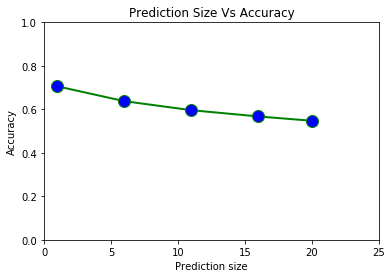

In [118]:

import matplotlib.pyplot as plt 

x=[]
y=[]
#taking points at interval of 5 
for i in range(0,len(avg_precision_vector)):
    if i%5==0:
        y.append(avg_precision_vector[i])
        x.append(i+1)
#appending last element in x,y
y.append(avg_precision_vector[len(avg_precision_vector)-1])
x.append(len(avg_precision_vector))
print(x)
print(y)
# x axis values 
#y  = [0.70572163,0.64660881,  0.60308582, 0.57274188, 0.54742044]
# corresponding y axis values 
#x = [1,5,10,15,20]
#print(y)
  
# plotting the points  
plt.plot(x, y, color='green', linewidth = 2, 
         marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0,1) 
plt.xlim(0,25) 
  
# naming the x axis 
plt.ylabel('Accuracy') 
# naming the y axis 
plt.xlabel('Prediction size') 
  
# giving a title to my graph 
plt.title('Prediction Size Vs Accuracy') 
  
# function to show the plot 
plt.show()